In [1]:
#the code is dedicated to the investigation of 27 driver sets for reconstruction of 
#small (POc) and large (GOC) particulate organic carbon concentration

In [41]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import random
import scipy.io
from scipy import stats
from scipy.signal import *
from mpl_toolkits.basemap import Basemap
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone 
from xgboost import XGBRegressor
from pylab import *
from matplotlib import *

In [3]:
#colorbar taken from https://github.com/pnnl/cmaputil
def CVD_Jet():
    pal = ((0.0000, 0.1262, 0.3015),
(0.0000, 0.1292, 0.3077),
(0.0000, 0.1321, 0.3142),
(0.0000, 0.1350, 0.3205),
(0.0000, 0.1379, 0.3269),
(0.0000, 0.1408, 0.3334),
(0.0000, 0.1437, 0.3400),
(0.0000, 0.1465, 0.3467),
(0.0000, 0.1492, 0.3537),
(0.0000, 0.1519, 0.3606),
(0.0000, 0.1546, 0.3676),
(0.0000, 0.1574, 0.3746),
(0.0000, 0.1601, 0.3817),
(0.0000, 0.1629, 0.3888),
(0.0000, 0.1657, 0.3960),
(0.0000, 0.1685, 0.4031),
(0.0000, 0.1714, 0.4102),
(0.0000, 0.1743, 0.4172),
(0.0000, 0.1773, 0.4241),
(0.0000, 0.1798, 0.4307),
(0.0000, 0.1817, 0.4347),
(0.0000, 0.1834, 0.4363),
(0.0000, 0.1852, 0.4368),
(0.0000, 0.1872, 0.4368),
(0.0000, 0.1901, 0.4365),
(0.0000, 0.1930, 0.4361),
(0.0000, 0.1958, 0.4356),
(0.0000, 0.1987, 0.4349),
(0.0000, 0.2015, 0.4343),
(0.0000, 0.2044, 0.4336),
(0.0000, 0.2073, 0.4329),
(0.0055, 0.2101, 0.4322),
(0.0236, 0.2130, 0.4314),
(0.0416, 0.2158, 0.4308),
(0.0576, 0.2187, 0.4301),
(0.0710, 0.2215, 0.4293),
(0.0827, 0.2244, 0.4287),
(0.0932, 0.2272, 0.4280),
(0.1030, 0.2300, 0.4274),
(0.1120, 0.2329, 0.4268),
(0.1204, 0.2357, 0.4262),
(0.1283, 0.2385, 0.4256),
(0.1359, 0.2414, 0.4251),
(0.1431, 0.2442, 0.4245),
(0.1500, 0.2470, 0.4241),
(0.1566, 0.2498, 0.4236),
(0.1630, 0.2526, 0.4232),
(0.1692, 0.2555, 0.4228),
(0.1752, 0.2583, 0.4224),
(0.1811, 0.2611, 0.4220),
(0.1868, 0.2639, 0.4217),
(0.1923, 0.2667, 0.4214),
(0.1977, 0.2695, 0.4212),
(0.2030, 0.2723, 0.4209),
(0.2082, 0.2751, 0.4207),
(0.2133, 0.2780, 0.4205),
(0.2183, 0.2808, 0.4204),
(0.2232, 0.2836, 0.4203),
(0.2281, 0.2864, 0.4202),
(0.2328, 0.2892, 0.4201),
(0.2375, 0.2920, 0.4200),
(0.2421, 0.2948, 0.4200),
(0.2466, 0.2976, 0.4200),
(0.2511, 0.3004, 0.4201),
(0.2556, 0.3032, 0.4201),
(0.2599, 0.3060, 0.4202),
(0.2643, 0.3088, 0.4203),
(0.2686, 0.3116, 0.4205),
(0.2728, 0.3144, 0.4206),
(0.2770, 0.3172, 0.4208),
(0.2811, 0.3200, 0.4210),
(0.2853, 0.3228, 0.4212),
(0.2894, 0.3256, 0.4215),
(0.2934, 0.3284, 0.4218),
(0.2974, 0.3312, 0.4221),
(0.3014, 0.3340, 0.4224),
(0.3054, 0.3368, 0.4227),
(0.3093, 0.3396, 0.4231),
(0.3132, 0.3424, 0.4236),
(0.3170, 0.3453, 0.4240),
(0.3209, 0.3481, 0.4244),
(0.3247, 0.3509, 0.4249),
(0.3285, 0.3537, 0.4254),
(0.3323, 0.3565, 0.4259),
(0.3361, 0.3593, 0.4264),
(0.3398, 0.3622, 0.4270),
(0.3435, 0.3650, 0.4276),
(0.3472, 0.3678, 0.4282),
(0.3509, 0.3706, 0.4288),
(0.3546, 0.3734, 0.4294),
(0.3582, 0.3763, 0.4302),
(0.3619, 0.3791, 0.4308),
(0.3655, 0.3819, 0.4316),
(0.3691, 0.3848, 0.4322),
(0.3727, 0.3876, 0.4331),
(0.3763, 0.3904, 0.4338),
(0.3798, 0.3933, 0.4346),
(0.3834, 0.3961, 0.4355),
(0.3869, 0.3990, 0.4364),
(0.3905, 0.4018, 0.4372),
(0.3940, 0.4047, 0.4381),
(0.3975, 0.4075, 0.4390),
(0.4010, 0.4104, 0.4400),
(0.4045, 0.4132, 0.4409),
(0.4080, 0.4161, 0.4419),
(0.4114, 0.4189, 0.4430),
(0.4149, 0.4218, 0.4440),
(0.4183, 0.4247, 0.4450),
(0.4218, 0.4275, 0.4462),
(0.4252, 0.4304, 0.4473),
(0.4286, 0.4333, 0.4485),
(0.4320, 0.4362, 0.4496),
(0.4354, 0.4390, 0.4508),
(0.4388, 0.4419, 0.4521),
(0.4422, 0.4448, 0.4534),
(0.4456, 0.4477, 0.4547),
(0.4489, 0.4506, 0.4561),
(0.4523, 0.4535, 0.4575),
(0.4556, 0.4564, 0.4589),
(0.4589, 0.4593, 0.4604),
(0.4622, 0.4622, 0.4620),
(0.4656, 0.4651, 0.4635),
(0.4689, 0.4680, 0.4650),
(0.4722, 0.4709, 0.4665),
(0.4756, 0.4738, 0.4679),
(0.4790, 0.4767, 0.4691),
(0.4825, 0.4797, 0.4701),
(0.4861, 0.4826, 0.4707),
(0.4897, 0.4856, 0.4714),
(0.4934, 0.4886, 0.4719),
(0.4971, 0.4915, 0.4723),
(0.5008, 0.4945, 0.4727),
(0.5045, 0.4975, 0.4730),
(0.5083, 0.5005, 0.4732),
(0.5121, 0.5035, 0.4734),
(0.5158, 0.5065, 0.4736),
(0.5196, 0.5095, 0.4737),
(0.5234, 0.5125, 0.4738),
(0.5272, 0.5155, 0.4739),
(0.5310, 0.5186, 0.4739),
(0.5349, 0.5216, 0.4738),
(0.5387, 0.5246, 0.4739),
(0.5425, 0.5277, 0.4738),
(0.5464, 0.5307, 0.4736),
(0.5502, 0.5338, 0.4735),
(0.5541, 0.5368, 0.4733),
(0.5579, 0.5399, 0.4732),
(0.5618, 0.5430, 0.4729),
(0.5657, 0.5461, 0.4727),
(0.5696, 0.5491, 0.4723),
(0.5735, 0.5522, 0.4720),
(0.5774, 0.5553, 0.4717),
(0.5813, 0.5584, 0.4714),
(0.5852, 0.5615, 0.4709),
(0.5892, 0.5646, 0.4705),
(0.5931, 0.5678, 0.4701),
(0.5970, 0.5709, 0.4696),
(0.6010, 0.5740, 0.4691),
(0.6050, 0.5772, 0.4685),
(0.6089, 0.5803, 0.4680),
(0.6129, 0.5835, 0.4673),
(0.6168, 0.5866, 0.4668),
(0.6208, 0.5898, 0.4662),
(0.6248, 0.5929, 0.4655),
(0.6288, 0.5961, 0.4649),
(0.6328, 0.5993, 0.4641),
(0.6368, 0.6025, 0.4632),
(0.6408, 0.6057, 0.4625),
(0.6449, 0.6089, 0.4617),
(0.6489, 0.6121, 0.4609),
(0.6529, 0.6153, 0.4600),
(0.6570, 0.6185, 0.4591),
(0.6610, 0.6217, 0.4583),
(0.6651, 0.6250, 0.4573),
(0.6691, 0.6282, 0.4562),
(0.6732, 0.6315, 0.4553),
(0.6773, 0.6347, 0.4543),
(0.6813, 0.6380, 0.4532),
(0.6854, 0.6412, 0.4521),
(0.6895, 0.6445, 0.4511),
(0.6936, 0.6478, 0.4499),
(0.6977, 0.6511, 0.4487),
(0.7018, 0.6544, 0.4475),
(0.7060, 0.6577, 0.4463),
(0.7101, 0.6610, 0.4450),
(0.7142, 0.6643, 0.4437),
(0.7184, 0.6676, 0.4424),
(0.7225, 0.6710, 0.4409),
(0.7267, 0.6743, 0.4396),
(0.7308, 0.6776, 0.4382),
(0.7350, 0.6810, 0.4368),
(0.7392, 0.6844, 0.4352),
(0.7434, 0.6877, 0.4338),
(0.7476, 0.6911, 0.4322),
(0.7518, 0.6945, 0.4307),
(0.7560, 0.6979, 0.4290),
(0.7602, 0.7013, 0.4273),
(0.7644, 0.7047, 0.4258),
(0.7686, 0.7081, 0.4241),
(0.7729, 0.7115, 0.4223),
(0.7771, 0.7150, 0.4205),
(0.7814, 0.7184, 0.4188),
(0.7856, 0.7218, 0.4168),
(0.7899, 0.7253, 0.4150),
(0.7942, 0.7288, 0.4129),
(0.7985, 0.7322, 0.4111),
(0.8027, 0.7357, 0.4090),
(0.8070, 0.7392, 0.4070),
(0.8114, 0.7427, 0.4049),
(0.8157, 0.7462, 0.4028),
(0.8200, 0.7497, 0.4007),
(0.8243, 0.7532, 0.3984),
(0.8287, 0.7568, 0.3961),
(0.8330, 0.7603, 0.3938),
(0.8374, 0.7639, 0.3915),
(0.8417, 0.7674, 0.3892),
(0.8461, 0.7710, 0.3869),
(0.8505, 0.7745, 0.3843),
(0.8548, 0.7781, 0.3818),
(0.8592, 0.7817, 0.3793),
(0.8636, 0.7853, 0.3766),
(0.8681, 0.7889, 0.3739),
(0.8725, 0.7926, 0.3712),
(0.8769, 0.7962, 0.3684),
(0.8813, 0.7998, 0.3657),
(0.8858, 0.8035, 0.3627),
(0.8902, 0.8071, 0.3599),
(0.8947, 0.8108, 0.3569),
(0.8992, 0.8145, 0.3538),
(0.9037, 0.8182, 0.3507),
(0.9082, 0.8219, 0.3474),
(0.9127, 0.8256, 0.3442),
(0.9172, 0.8293, 0.3409),
(0.9217, 0.8330, 0.3374),
(0.9262, 0.8367, 0.3340),
(0.9308, 0.8405, 0.3306),
(0.9353, 0.8442, 0.3268),
(0.9399, 0.8480, 0.3232),
(0.9444, 0.8518, 0.3195),
(0.9490, 0.8556, 0.3155),
(0.9536, 0.8593, 0.3116),
(0.9582, 0.8632, 0.3076),
(0.9628, 0.8670, 0.3034),
(0.9674, 0.8708, 0.2990),
(0.9721, 0.8746, 0.2947),
(0.9767, 0.8785, 0.2901),
(0.9814, 0.8823, 0.2856),
(0.9860, 0.8862, 0.2807),
(0.9907, 0.8901, 0.2759),
(0.9954, 0.8940, 0.2708),
(1.0000, 0.8979, 0.2655),
(1.0000, 0.9018, 0.2600),
(1.0000, 0.9057, 0.2593),
(1.0000, 0.9094, 0.2634),
(1.0000, 0.9131, 0.2680),
(1.0000, 0.9169, 0.2731))
    pal_Testu = plt.matplotlib.colors.LinearSegmentedColormap.from_list('pal_Testu',pal)
    return pal_Testu

In [4]:
def imp_df(column_names, importances):
    data = {
        'Feature': column_names,
        'Importance': importances,
    }
    df = pd.DataFrame(data) \
        .set_index('Feature') \
        .sort_values('Importance', ascending=False)

    return df

In [5]:
#function to estimate feature importance
def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [6]:
#function to plot data distribution over the globe 
def plot_glob_distr(x,lat_name,lon_name,file_name):
    plt.figure(figsize=[20. , 15.],facecolor='w')
    m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180)
    m.fillcontinents(color='grey',lake_color='white',zorder = 0)
    parallels = np.arange(-80.,81,20.)
    m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
    m.scatter(x[lon_name].values,x[lat_name].values, latlon = True, \
              c=np.ones(len(x[lon_name].values)),s=70,\
              cmap='jet',alpha = None, edgecolors = 'k')
    cbar = plt.colorbar(orientation='horizontal')
    cbar.set_label(label=r'Data',size=20, weight='bold')
    cbar.ax.tick_params(labelsize=20)
    plt.savefig('/Figures_Article/'+file_name)

In [7]:
#function to plot the distribution of two data sets
def plot_glob_distr_two_df(x,y,lat_name,lon_name,file_name):
    plt.figure(figsize=[20. , 15.],facecolor='w')
    m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180)
    m.fillcontinents(color='grey',lake_color='white',zorder = 0)
    parallels = np.arange(-80.,81,20.)
    m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
    m.scatter(x[lon_name].values,x[lat_name].values, latlon = True, \
              c=np.ones(len(x[lon_name].values)),s=70,\
              cmap='jet',alpha = None, edgecolors = 'k')
    m.scatter(y[lon_name].values,y[lat_name].values, latlon = True, \
              c=np.ones(len(y[lon_name].values)),s=70,\
              cmap='jet',alpha = None, edgecolors = 'k')
    cbar = plt.colorbar(orientation='horizontal')
    cbar.set_label(label=r'Data',size=20, weight='bold')
    cbar.ax.tick_params(labelsize=20)
    plt.savefig('/Figures_Article/'+file_name)


In [8]:
#function to estimate PDF of small (POC) and large (GOC) particulate organic carbon concentration 
def PDF_estim(depth_group, depth_number):
    d = 0
    for key, item in depth_group:
        histogram_POC, bins_POC = np.histogram(item['POC'].values, normed=True)
        bin_centers_POC = 0.5*(bins_POC[1:] + bins_POC[:-1])
        histogram_GOC, bins_GOC = np.histogram(item['GOC'].values, normed=True)
        bin_centers_GOC = 0.5*(bins_GOC[1:] + bins_GOC[:-1])
        if d == 0:
            histogram_POC_2D = np.zeros((depth_number,len(histogram_POC)))
            bin_centers_POC_2D = np.zeros((depth_number,len(histogram_POC)))
            histogram_GOC_2D = np.zeros((depth_number,len(histogram_GOC)))
            bin_centers_GOC_2D = np.zeros((depth_number,len(histogram_GOC)))
            depth_PDF = np.zeros((depth_number,len(histogram_POC)))
        depth_PDF[d,:] = key
        histogram_POC_2D[d,:] = histogram_POC
        bin_centers_POC_2D[d,:] = bin_centers_POC
        histogram_GOC_2D[d,:] = histogram_GOC
        bin_centers_GOC_2D[d,:] = bin_centers_GOC
        d = d + 1

    return histogram_POC_2D, bin_centers_POC_2D, histogram_GOC_2D, bin_centers_GOC_2D, depth_PDF

In [9]:
#function to plot PDF
def PDF_plot(histogram,bin_centers,depth,depth_group,var_name,lim_left,lim_right,step,xmax,filename):
    plt.figure(figsize=[20. , 15.],facecolor='w')
    limits=[lim_left,lim_right]
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = CVD_Jet()
    contours = np.arange(lim_left,lim_right+step,step)
    C = plt.contourf(bin_centers, -depth, histogram,contours,cmap=pal,norm=norm,extend='both')
    cbar = plt.colorbar(C,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.ax.tick_params(labelsize=30)
    locs, labels = plt.xticks(size = 30)
    plt.plot(depth_group[var_name].mean(),-depth,'black',linewidth=6,label='POC train')
    newlocs   = np.array([np.min(bin_centers),xmax],'f')
    newlabels = np.array([np.min(bin_centers),xmax],'i')
    xmin=newlocs[0]
    xmax=newlocs[-1]
    plt.xlim(xmin,xmax)
    plt.xlabel(var_name,fontsize=30)
    locsY,labelsy = plt.yticks(size = 30)
    newlocsy   = np.array([np.min(-depth),np.max(-depth)],'f')
    newlabelsy = np.array([np.min(-depth),np.max(-depth)],'i')
    ymin=newlocsy[0]
    ymax=newlocsy[-1]
    plt.ylim(ymin,ymax)
    plt.ylabel('Depth, m',fontsize=30)
    plt.savefig("/Figures_Article/"+filename)

In [10]:
#read the data
r_filenameTSV1 = 'Data_from_PlankTOM/Data_Obs_Pos_14122021.csv'
All_Data_tot_Pl = pd.read_csv(r_filenameTSV1)

r_filenameTSV1 = 'Data_from_PlankTOM/Data_IV_14122021.csv'
All_Data_tot_IV_Pl = pd.read_csv(r_filenameTSV1)

In [11]:
#convert latitude and longitude in sin(lat), sin(lon) and cos(lon)
All_Data_tot_Pl['sin_lat'] = np.sin(All_Data_tot_Pl['lat_Pl']*np.pi/180.)
All_Data_tot_Pl['sin_lon'] = np.sin(All_Data_tot_Pl['lon_Pl']*np.pi/180.)
All_Data_tot_Pl['cos_lon'] = np.cos(All_Data_tot_Pl['lon_Pl']*np.pi/180.)

All_Data_tot_IV_Pl['sin_lat'] = np.sin(All_Data_tot_IV_Pl['lat_Pl']*np.pi/180.)
All_Data_tot_IV_Pl['sin_lon'] = np.sin(All_Data_tot_IV_Pl['lon_Pl']*np.pi/180.)
All_Data_tot_IV_Pl['cos_lon'] = np.cos(All_Data_tot_IV_Pl['lon_Pl']*np.pi/180.)

In [12]:
All_Data_tot_Pl = All_Data_tot_Pl.drop(columns=['Unnamed: 0'])
All_Data_tot_Pl = All_Data_tot_Pl.drop_duplicates()

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


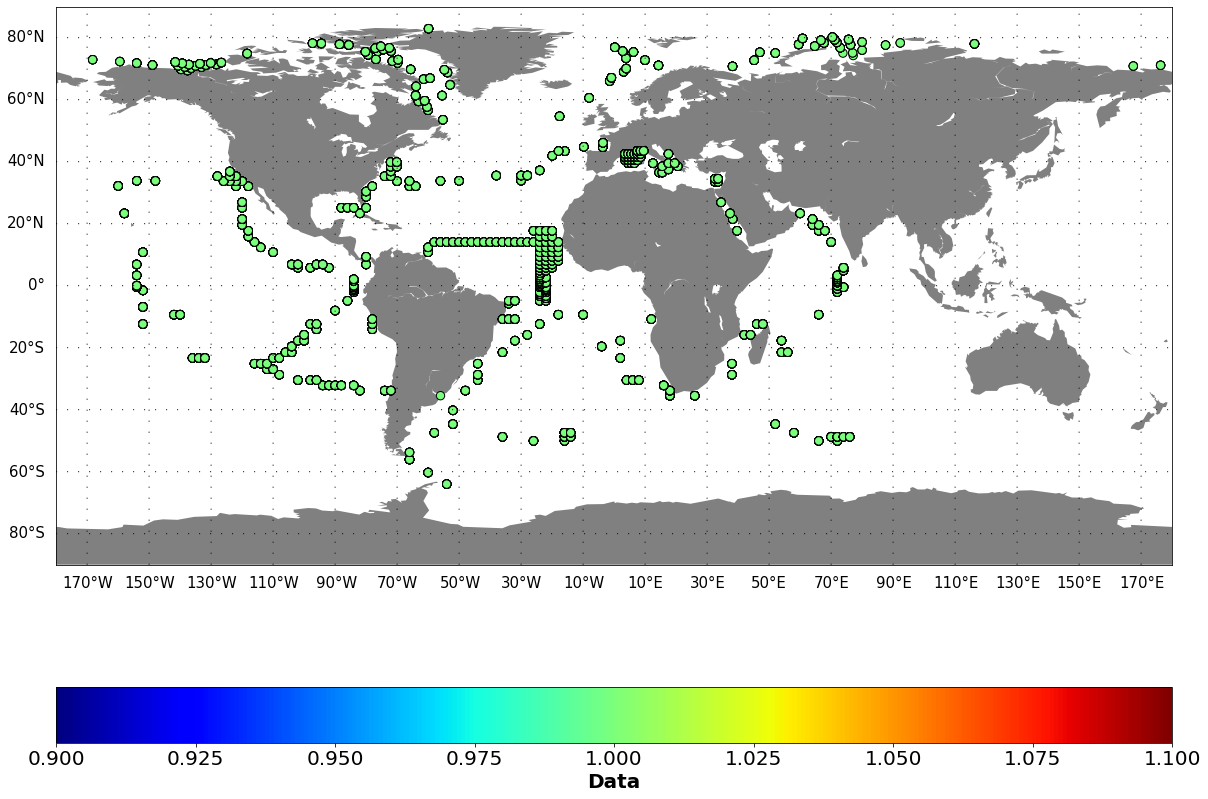

In [13]:
plot_glob_distr(All_Data_tot_Pl,'lat_Pl','lon_Pl','All_Data_in_RF_PredictInv.png')

In [14]:
#remove part of data for validation from the region covered by training data
All_Data_tot_IV_Pl = All_Data_tot_IV_Pl.loc[(All_Data_tot_IV_Pl['lon_Pl'] < -70.) | (All_Data_tot_IV_Pl['lon_Pl'] > 80.)]

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


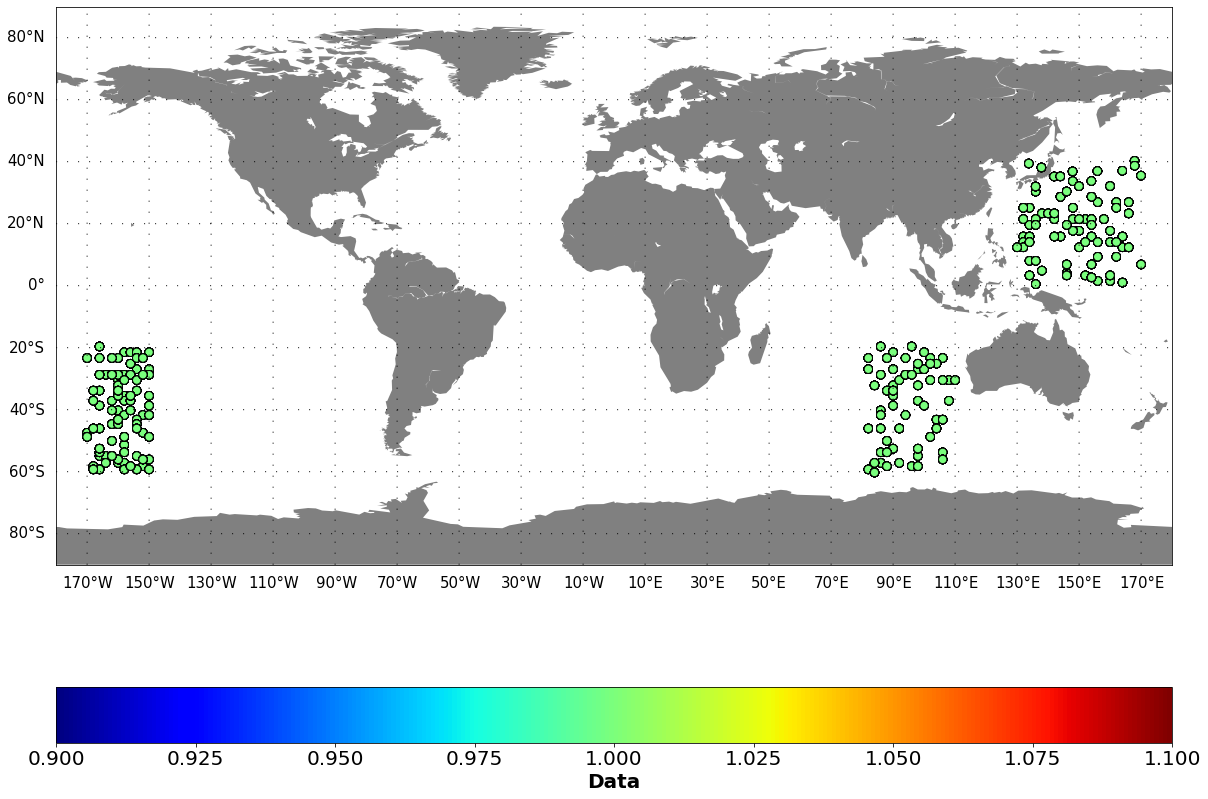

In [15]:
#plot Figure 4b from article
plot_glob_distr(All_Data_tot_IV_Pl,'lat_Pl','lon_Pl','All_Data_IV_in_RF_PredictInv.png')

In [16]:
#creation of variables for total zooplankton concentration
All_Data_tot_Pl['Big_zoopl']  = All_Data_tot_Pl['GEL'] + All_Data_tot_Pl['MES'] + All_Data_tot_Pl['MAC']
All_Data_tot_Pl['Big_zoopl2'] = All_Data_tot_Pl['GEL'] + All_Data_tot_Pl['MES'] + All_Data_tot_Pl['MAC'] + All_Data_tot_Pl['PTE']

All_Data_tot_IV_Pl['Big_zoopl']  = All_Data_tot_IV_Pl['GEL'] + All_Data_tot_IV_Pl['MES'] + All_Data_tot_IV_Pl['MAC']
All_Data_tot_IV_Pl['Big_zoopl2'] = All_Data_tot_IV_Pl['GEL'] + All_Data_tot_IV_Pl['MES'] + All_Data_tot_IV_Pl['MAC'] + All_Data_tot_IV_Pl['PTE']

In [17]:
#data for correlation map
All_Data_Pl_new_corr = All_Data_tot_Pl[['POC', 'GOC','depth', 'Temp','Temp_back', 'MLD', 'O2', 'O2_back', 'NO3',\
                                        'NO3_back', 'PO4','PO4_back', 'Si', 'Si_back', 'CHL', 'CHL_back', 'BAC',\
                                        'MES', 'PTE', 'DIA', 'COC', 'PIC', 'PHA', 'GEL','PRO', 'MAC', 'MIX', 'FIX',\
                                        'BAC_back','MES_back', 'PTE_back', 'DIA_back', 'COC_back', 'PIC_back',\
                                        'PHA_back', 'GEL_back','PRO_back', 'MAC_back', 'MIX_back', 'FIX_back',\
                                        'O2_mean','NO3_mean', 'PO4_mean', 'Si_mean', 'CHL_mean', 'BAC_mean',\
                                        'MES_mean','PTE_mean', 'DIA_mean', 'COC_mean', 'PIC_mean', 'PHA_mean',\
                                        'GEL_mean','PRO_mean', 'MAC_mean', 'MIX_mean', 'FIX_mean', 'Big_zoopl',\
                                        'Big_zoopl2','O2_back_mean','NO3_back_mean', 'PO4_back_mean', 'Si_back_mean',\
                                        'CHL_back_mean', 'BAC_back_mean','MES_back_mean','PTE_back_mean',\
                                        'DIA_back_mean', 'COC_back_mean', 'PIC_back_mean', 'PHA_back_mean',\
                                        'GEL_back_mean','PRO_back_mean', 'MAC_back_mean', 'MIX_back_mean',\
                                        'FIX_back_mean']]

In [18]:
corr = All_Data_Pl_new_corr.corr(method='pearson')
corr.style.background_gradient(cmap='seismic')

In [19]:
#remove large particulate organic concentration higher than 0.2 umol/L
All_Data_tot_Pl_outfit = All_Data_tot_Pl.loc[All_Data_tot_Pl['GOC'] < 0.2]

In [20]:
All_Data_Pl_new_outfit_corr = All_Data_tot_Pl_outfit[['POC', 'GOC','depth', 'Temp','Temp_back', 'MLD', 'O2',\
                                                      'O2_back','NO3','NO3_back', 'PO4','PO4_back', 'Si', 'Si_back',\
                                                      'CHL', 'CHL_back', 'BAC','MES', 'PTE', 'DIA', 'COC', 'PIC',\
                                                      'PHA', 'GEL','PRO', 'MAC', 'MIX', 'FIX','BAC_back','MES_back',\
                                                      'PTE_back', 'DIA_back', 'COC_back', 'PIC_back','PHA_back',\
                                                      'GEL_back','PRO_back', 'MAC_back', 'MIX_back', 'FIX_back',\
                                                      'O2_mean','NO3_mean', 'PO4_mean', 'Si_mean', 'CHL_mean',\
                                                      'BAC_mean','MES_mean','PTE_mean', 'DIA_mean', 'COC_mean',\
                                                      'PIC_mean', 'PHA_mean','GEL_mean','PRO_mean', 'MAC_mean',\
                                                      'MIX_mean', 'FIX_mean', 'Big_zoopl','Big_zoopl2','O2_back_mean',\
                                                      'NO3_back_mean', 'PO4_back_mean', 'Si_back_mean',\
                                                      'CHL_back_mean', 'BAC_back_mean','MES_back_mean',\
                                                      'PTE_back_mean','DIA_back_mean', 'COC_back_mean',\
                                                      'PIC_back_mean', 'PHA_back_mean','GEL_back_mean',\
                                                      'PRO_back_mean', 'MAC_back_mean', 'MIX_back_mean',\
                                                      'FIX_back_mean',]]

In [21]:
corr_outfit = All_Data_Pl_new_outfit_corr.corr(method='pearson')
corr_outfit.style.background_gradient(cmap='seismic')

In [22]:
All_Data_IV_Pl_new_corr = All_Data_tot_IV_Pl[['POC', 'GOC','depth', 'Temp','Temp_back', 'MLD', 'O2', 'O2_back', 'NO3',\
                                        'NO3_back', 'PO4','PO4_back', 'Si', 'Si_back', 'CHL', 'CHL_back', 'BAC',\
                                        'MES', 'PTE', 'DIA', 'COC', 'PIC', 'PHA', 'GEL','PRO', 'MAC', 'MIX', 'FIX',\
                                        'BAC_back','MES_back', 'PTE_back', 'DIA_back', 'COC_back', 'PIC_back',\
                                        'PHA_back', 'GEL_back','PRO_back', 'MAC_back', 'MIX_back', 'FIX_back',\
                                        'O2_mean','NO3_mean', 'PO4_mean', 'Si_mean', 'CHL_mean', 'BAC_mean',\
                                        'MES_mean','PTE_mean', 'DIA_mean', 'COC_mean', 'PIC_mean', 'PHA_mean',\
                                        'GEL_mean','PRO_mean', 'MAC_mean', 'MIX_mean', 'FIX_mean', 'Big_zoopl',\
                                        'Big_zoopl2','O2_back_mean','NO3_back_mean', 'PO4_back_mean', 'Si_back_mean',\
                                        'CHL_back_mean', 'BAC_back_mean','MES_back_mean','PTE_back_mean',\
                                        'DIA_back_mean', 'COC_back_mean', 'PIC_back_mean', 'PHA_back_mean',\
                                        'GEL_back_mean','PRO_back_mean', 'MAC_back_mean', 'MIX_back_mean',\
                                        'FIX_back_mean',]]

In [23]:
corr_IV = All_Data_IV_Pl_new_corr.corr(method='pearson')
corr_IV.style.background_gradient(cmap='seismic')

In [24]:
#separation of data into training and validation
All_Data_coord = All_Data_tot_Pl.groupby('coordinates').mean().reset_index()
All_Data_coord_sorted = All_Data_coord.sort_values(by=['lat_Pl','lon_Pl'])
a_valid = np.arange(0,len(All_Data_coord_sorted),4)
All_Data_coord_valid = All_Data_coord_sorted.loc[a_valid]

All_Data_valid = All_Data_tot_Pl.loc[All_Data_tot_Pl['coordinates'].isin(All_Data_coord_valid['coordinates'].values)]

All_Data_rest = All_Data_tot_Pl.drop(All_Data_valid.index.to_numpy())

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


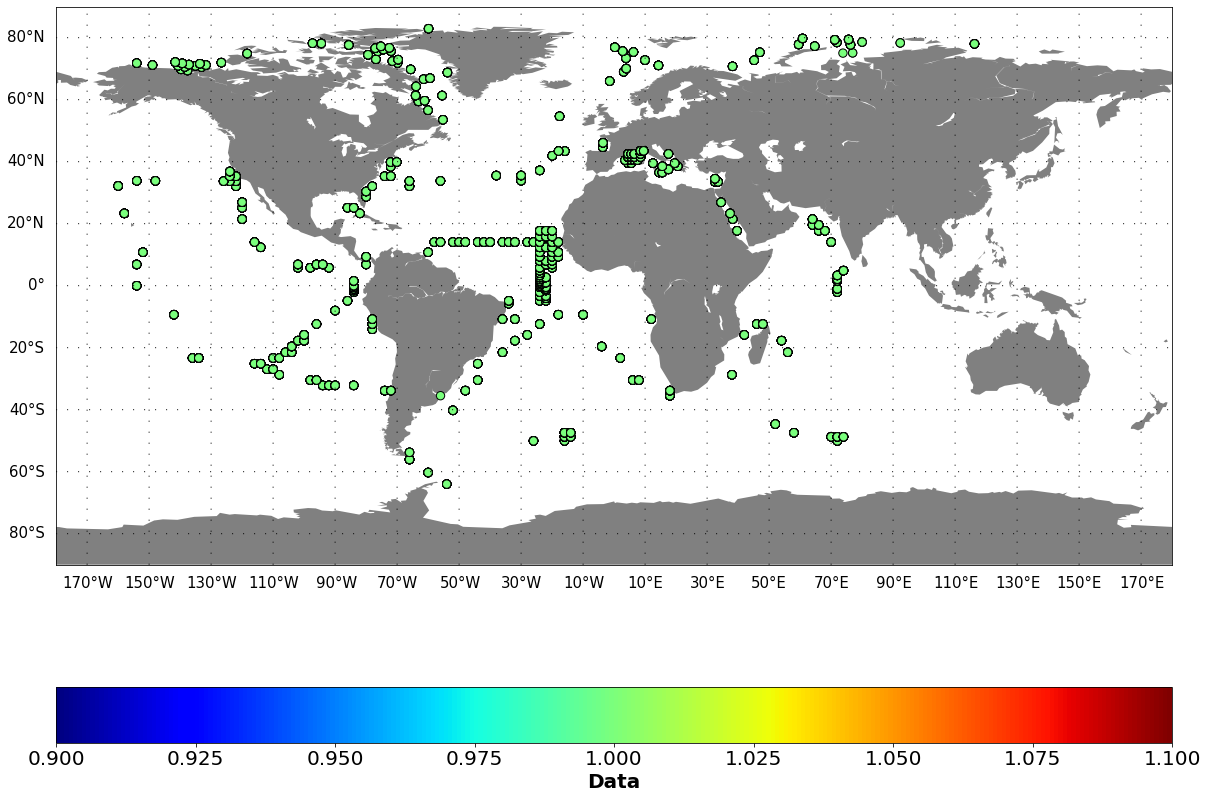

In [25]:
plot_glob_distr(All_Data_rest,'lat_Pl','lon_Pl','All_Data_train_in_RF_PredictInv.png')

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


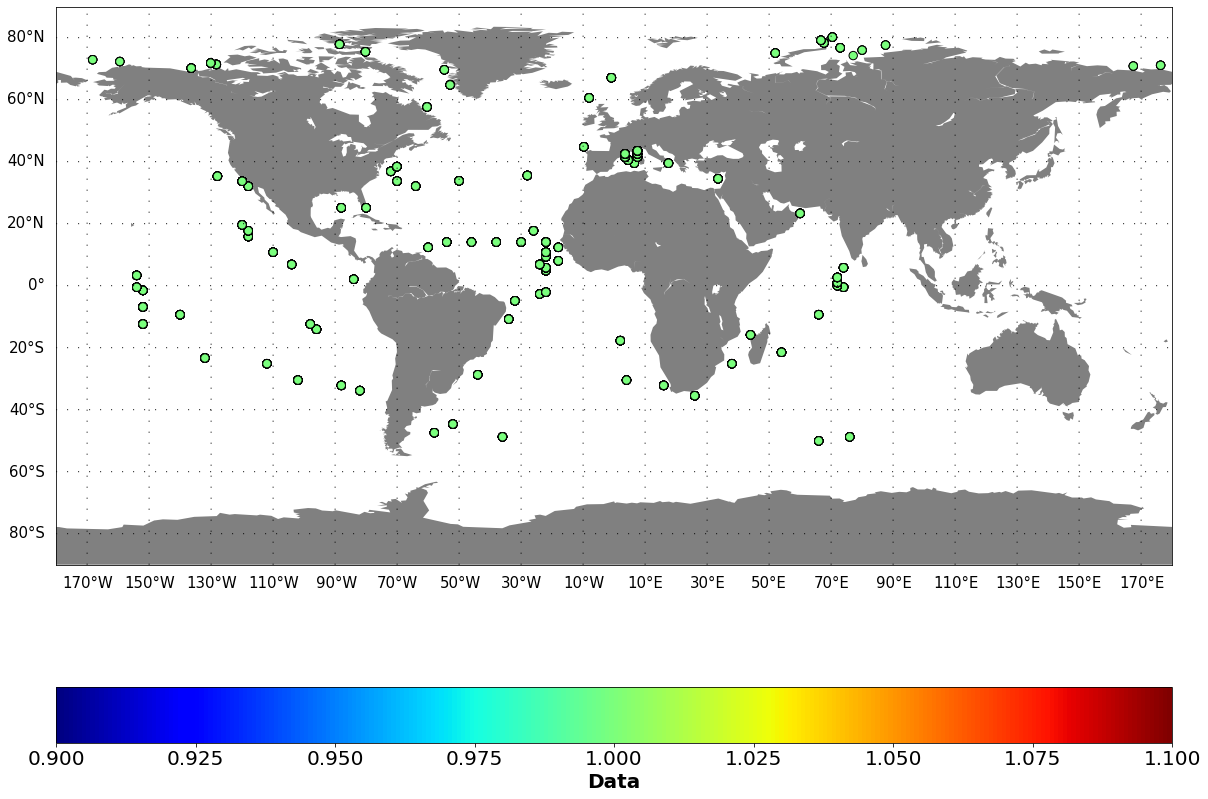

In [26]:
plot_glob_distr(All_Data_valid,'lat_Pl','lon_Pl','All_Data_valid_in_RF_PredictInv.png')

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


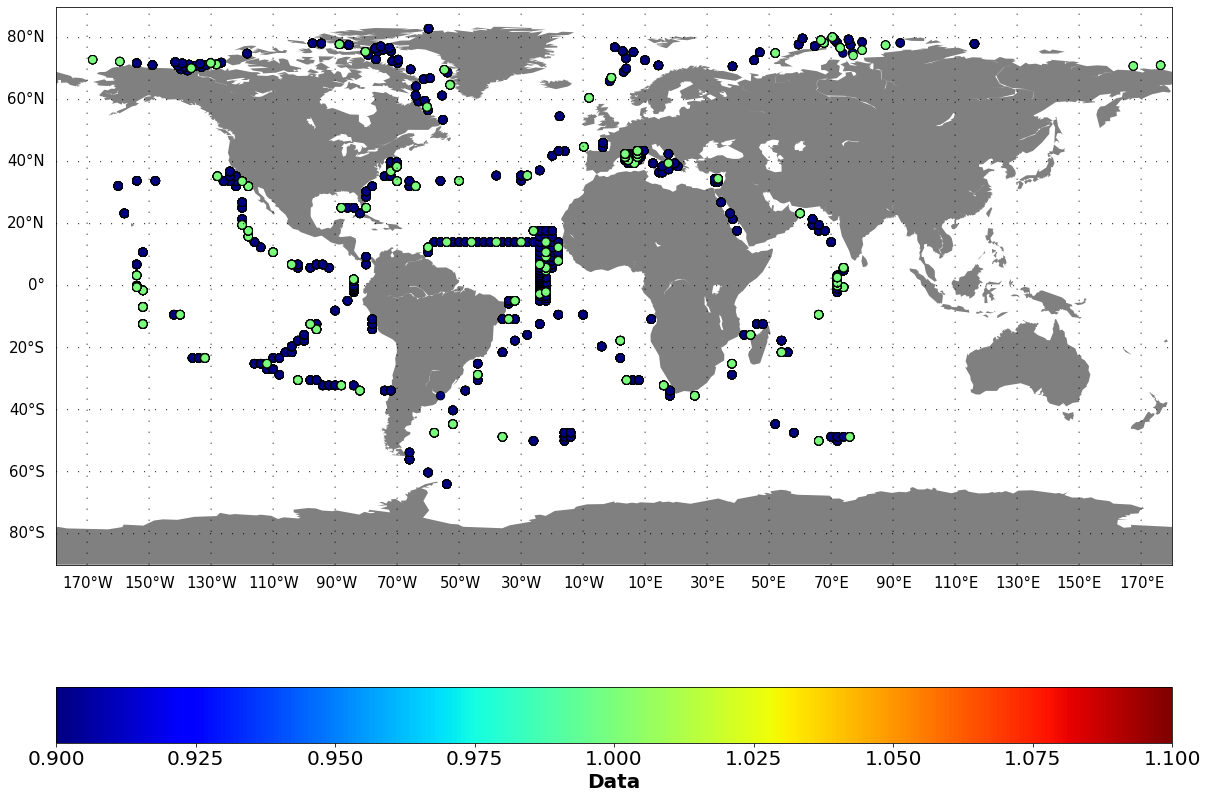

In [27]:
#plot Figure 4a from article
plot_glob_distr_two_df(All_Data_rest,All_Data_valid,'lat_Pl','lon_Pl','All_Data_trainvalid_in_RF_PredictInv.png')

In [28]:
depth_group_train = All_Data_rest.groupby('depth')
depth_group_valid = All_Data_valid.groupby('depth')
depth_group_IV = All_Data_tot_IV_Pl.groupby('depth')
depth_number = All_Data_rest.groupby('depth').mean().shape[0]

In [29]:
histogram_POC_train, bin_centers_POC_train, histogram_GOC_train, bin_centers_GOC_train, depth_PDF_train = PDF_estim(depth_group_train, depth_number)
histogram_POC_valid, bin_centers_POC_valid, histogram_GOC_valid, bin_centers_GOC_valid, depth_PDF_valid = PDF_estim(depth_group_valid, depth_number)
histogram_POC_IV, bin_centers_POC_IV, histogram_GOC_IV, bin_centers_GOC_IV, depth_PDF_IV = PDF_estim(depth_group_IV, depth_number)



/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


In [30]:
set_names = ['train','valid','IV']

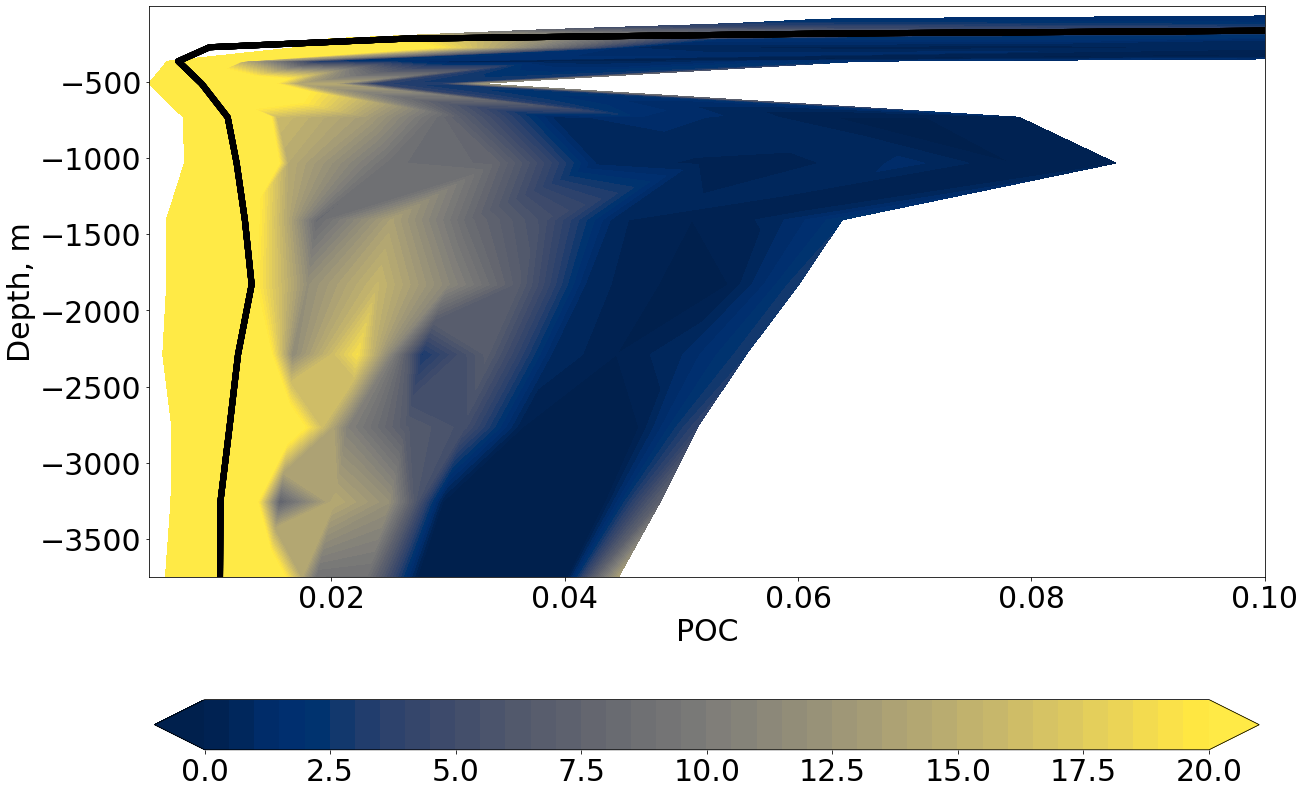

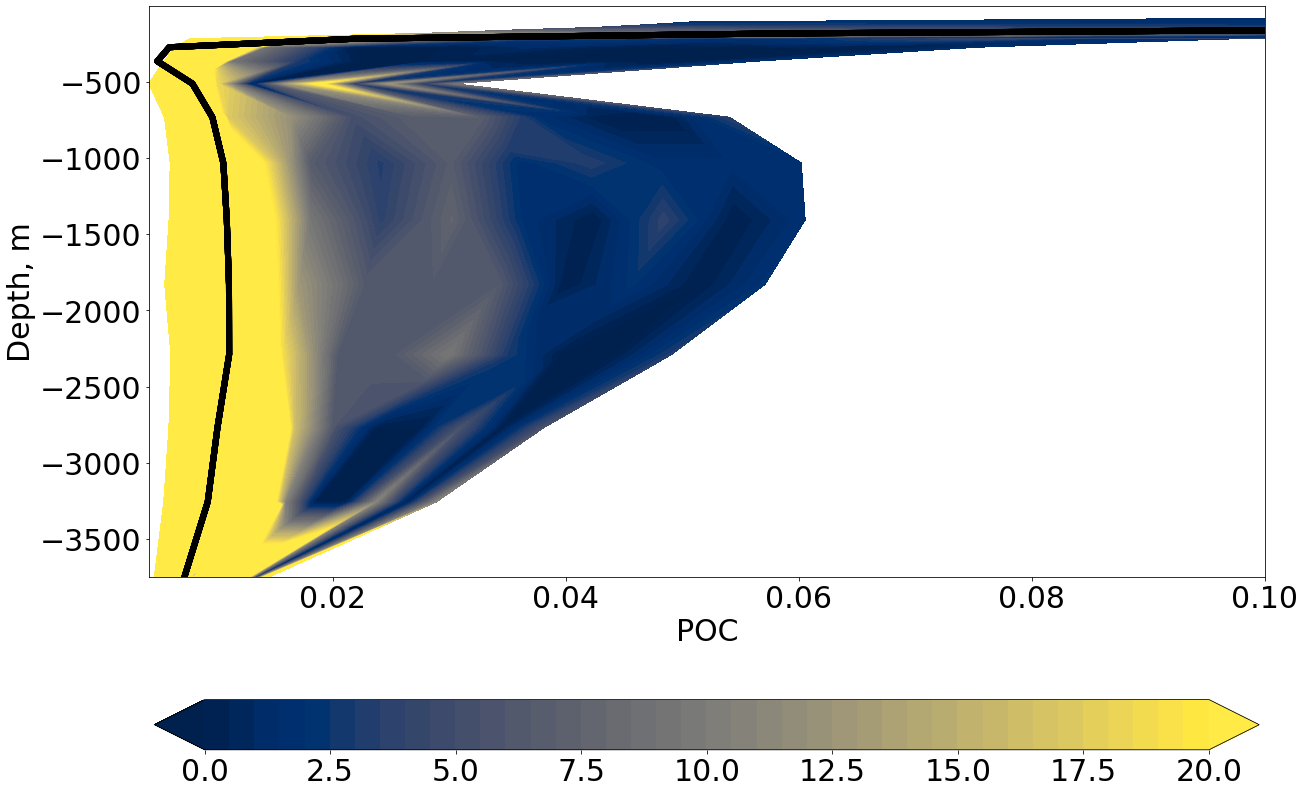

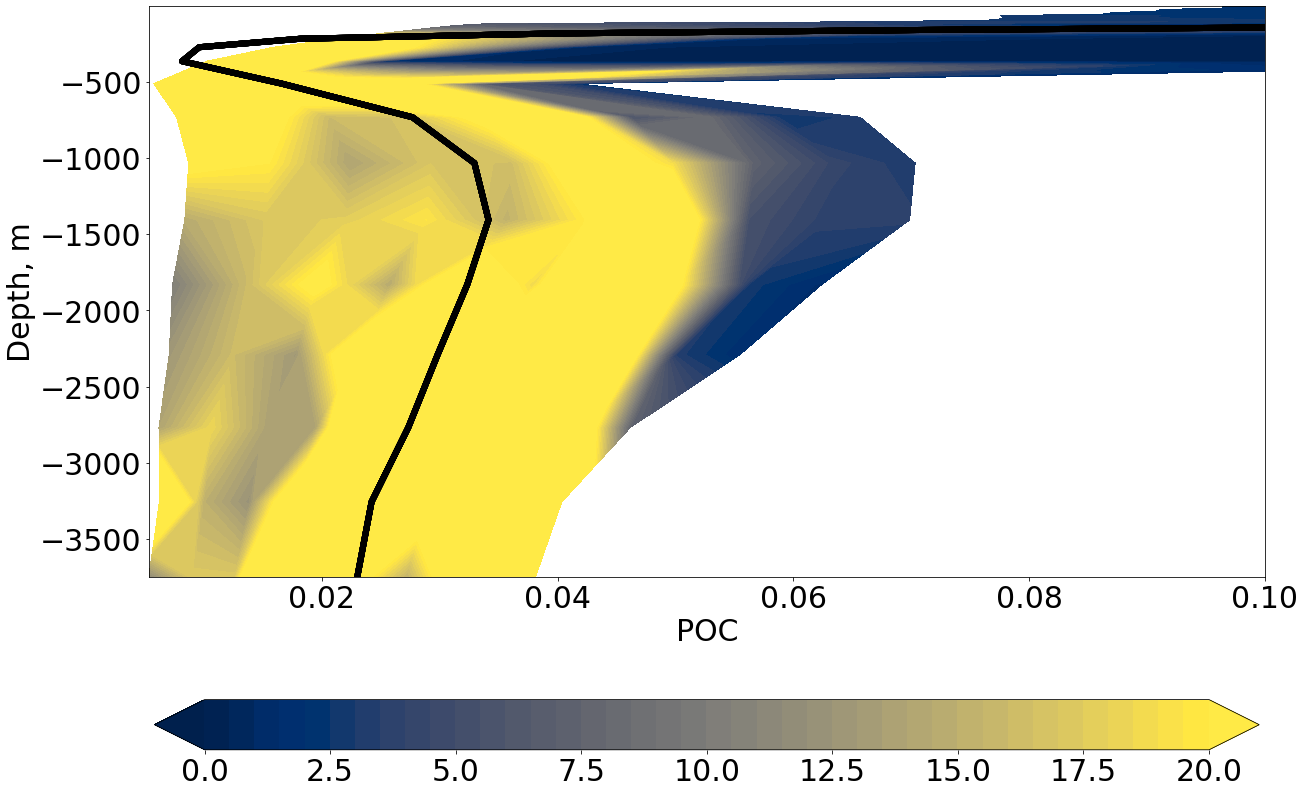

In [31]:
for set_n in set_names:
    PDF_plot(globals()["histogram_POC_"+set_n],globals()["bin_centers_POC_"+set_n],globals()["depth_PDF_"+set_n],\
             globals()["depth_group_"+set_n],'POC',0.,20.,0.5,0.1,'PDF_POC_'+set_n+'_2.png')

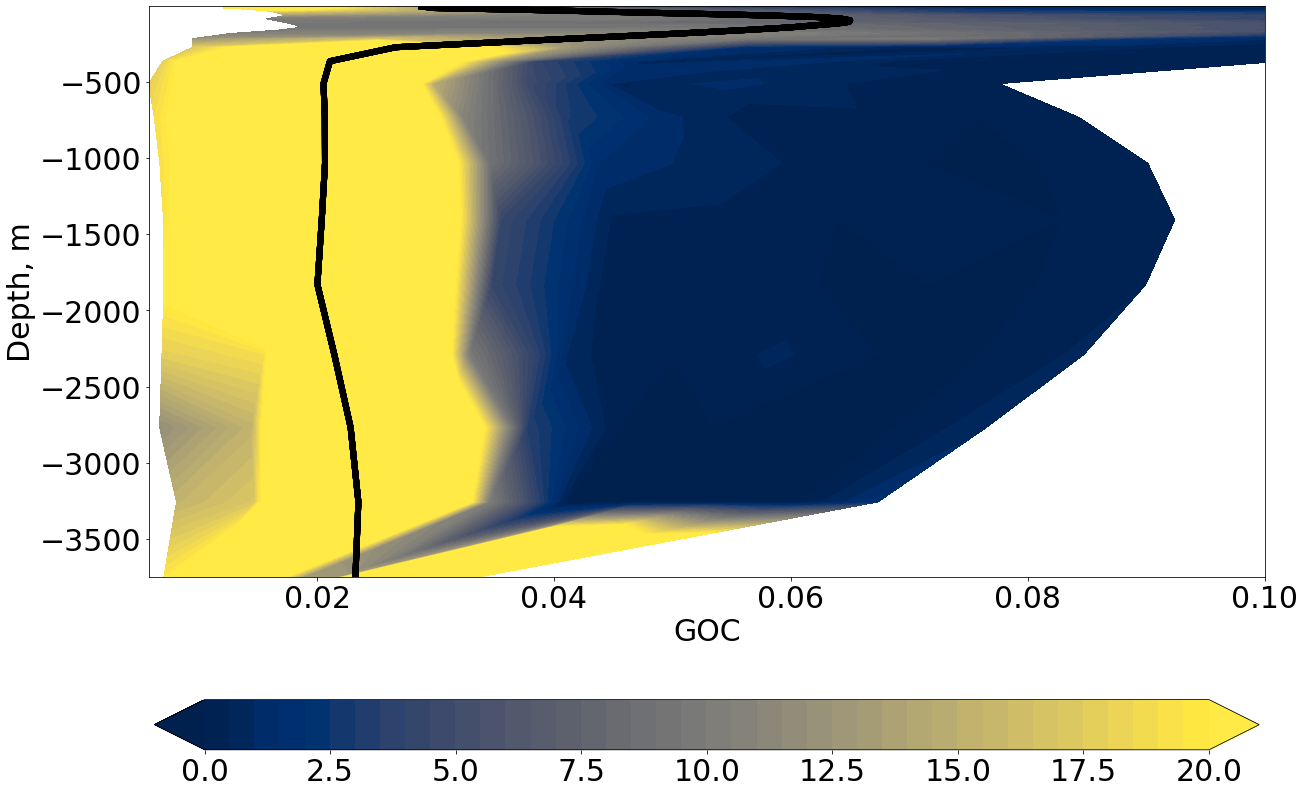

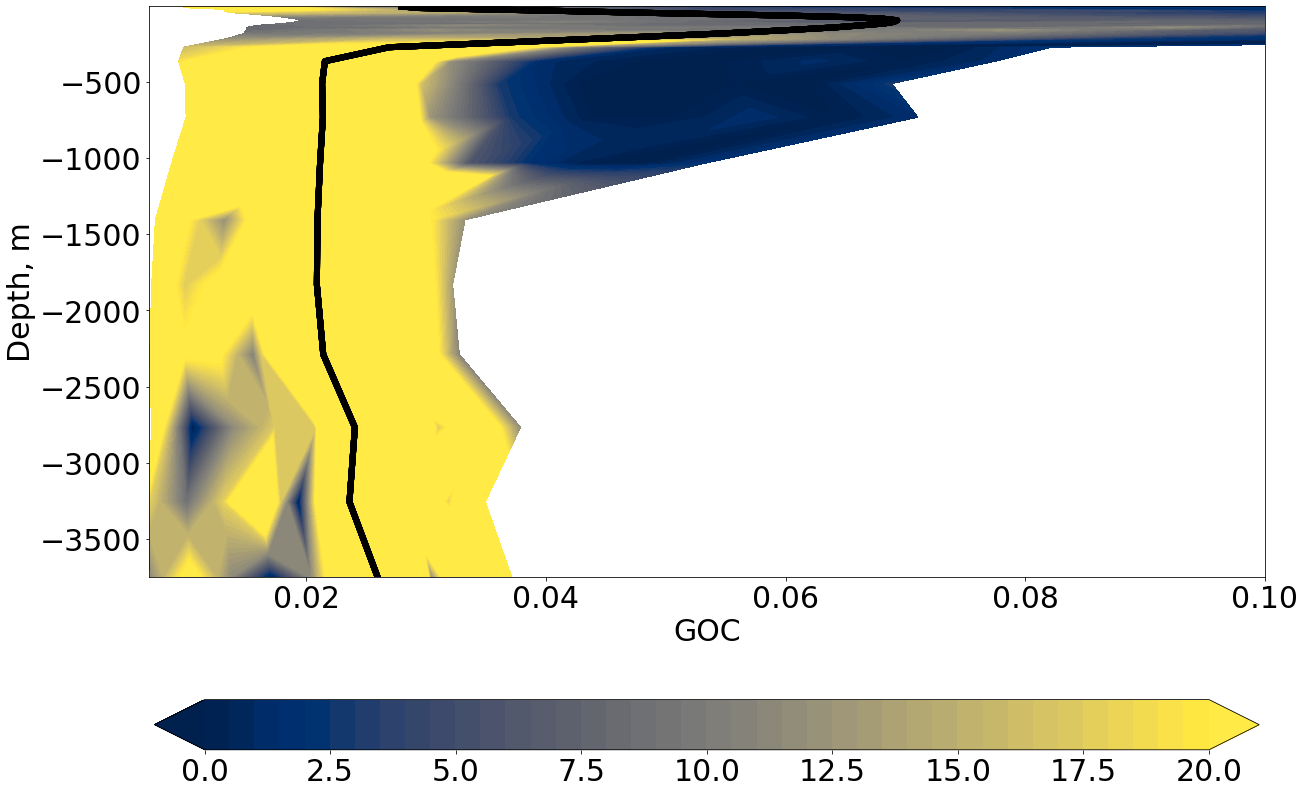

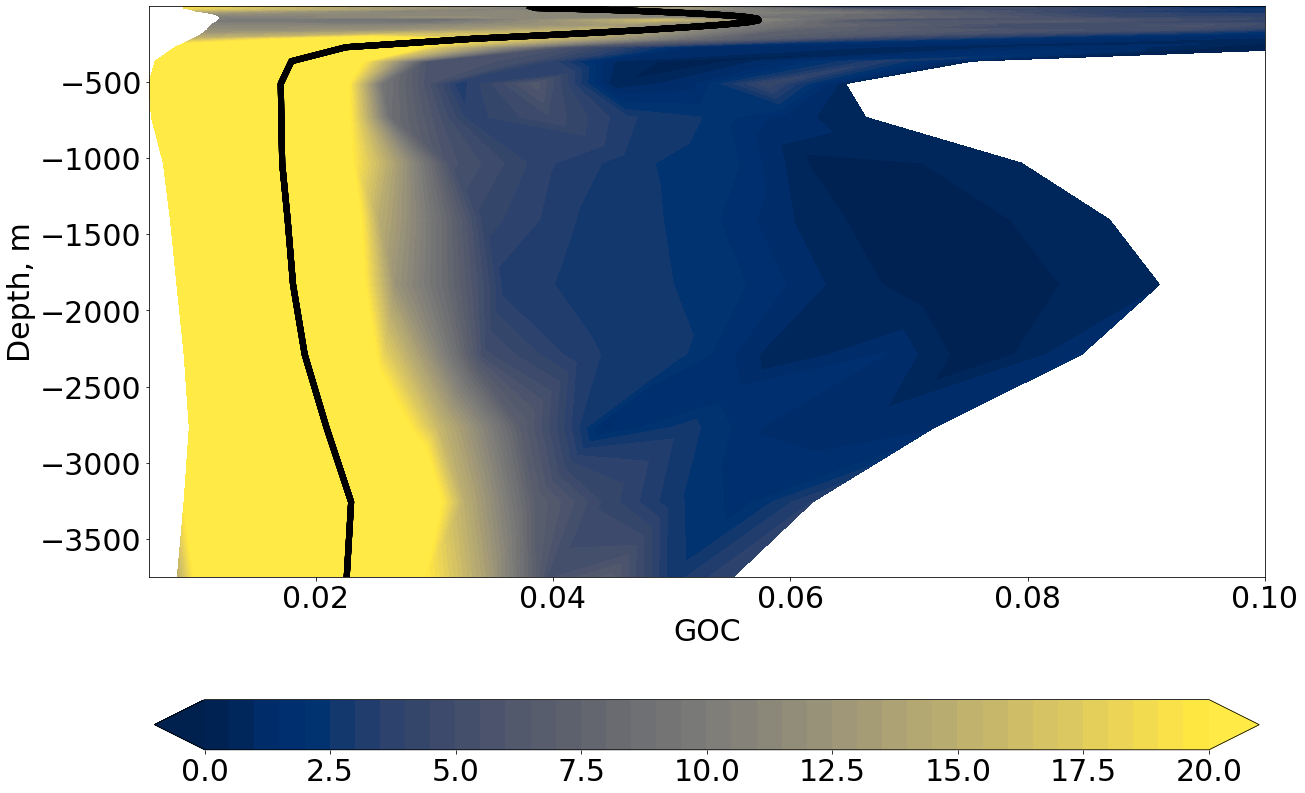

In [32]:
for set_n in set_names:
    PDF_plot(globals()["histogram_GOC_"+set_n],globals()["bin_centers_GOC_"+set_n],globals()["depth_PDF_"+set_n],\
             globals()["depth_group_"+set_n],'GOC',0.,20.,0.5,0.1,'PDF_GOC_'+set_n+'_2.png')

In [33]:
#estimation of incident light
convert_dict = {'year': int, 'month': int}
All_Data_valid = All_Data_valid.astype(convert_dict)
All_Data_rest = All_Data_rest.astype(convert_dict)
All_Data_tot_IV_Pl = All_Data_tot_IV_Pl.astype(convert_dict)

All_Data_valid['day_numb'] = 15
All_Data_rest['day_numb'] = 15
All_Data_tot_IV_Pl['day_numb'] = 15

for i in All_Data_valid.index.to_numpy():
    delta = date(All_Data_valid['year'][i],All_Data_valid['month'][i],15) - date(All_Data_valid['year'][i],1,1)
    All_Data_valid['day_numb'][i] = delta.days + 1

for i in All_Data_rest.index.to_numpy():
    delta = date(All_Data_rest['year'][i],All_Data_rest['month'][i],15) - date(All_Data_rest['year'][i],1,1)
    All_Data_rest['day_numb'][i] = delta.days + 1    

for i in All_Data_tot_IV_Pl.index.to_numpy():
    delta = date(All_Data_tot_IV_Pl['year'][i],All_Data_tot_IV_Pl['month'][i],15) - date(All_Data_tot_IV_Pl['year'][i],1,1)
    All_Data_tot_IV_Pl['day_numb'][i] = delta.days + 1    
    
convert_dict = {'day_numb': float}
All_Data_valid = All_Data_valid.astype(convert_dict)
All_Data_rest = All_Data_rest.astype(convert_dict)
All_Data_tot_IV_Pl = All_Data_tot_IV_Pl.astype(convert_dict)

All_Data_valid["psi"] = np.nan
All_Data_rest["psi"] = np.nan
All_Data_tot_IV_Pl["psi"] = np.nan

for i in All_Data_valid.index.to_numpy():
    if All_Data_valid['year'][i] != 2012:
        All_Data_valid.loc[All_Data_valid.index == i,'psi'] = np.pi*(All_Data_valid['day_numb'][i] * 360./365.)/180.
    else:
        All_Data_valid.loc[All_Data_valid.index == i,'psi'] = np.pi*(All_Data_valid['day_numb'][i] * 360./366.)/180.

for i in All_Data_rest.index.to_numpy():
    if All_Data_rest['year'][i] != 2012:
        All_Data_rest.loc[All_Data_rest.index == i,'psi'] = np.pi*(All_Data_rest['day_numb'][i] * 360./365.)/180.
    else:
        All_Data_rest.loc[All_Data_rest.index == i,'psi'] = np.pi*(All_Data_rest['day_numb'][i] * 360./366.)/180.

for i in All_Data_tot_IV_Pl.index.to_numpy():
    if All_Data_tot_IV_Pl['year'][i] != 2012:
        All_Data_tot_IV_Pl.loc[All_Data_tot_IV_Pl.index == i,'psi'] = np.pi*(All_Data_tot_IV_Pl['day_numb'][i] * 360./365.)/180.
    else:
        All_Data_tot_IV_Pl.loc[All_Data_tot_IV_Pl.index == i,'psi'] = np.pi*(All_Data_tot_IV_Pl['day_numb'][i] * 360./366.)/180.

All_Data_valid['diclination'] = 0.39637 - 22.9133*np.cos(All_Data_valid['psi'])+4.02543*np.sin(All_Data_valid['psi'])-0.3872*np.cos(2.*All_Data_valid['psi'])+0.052*np.sin(2.*All_Data_valid['psi'])
All_Data_rest['diclination'] = 0.39637 - 22.9133*np.cos(All_Data_rest['psi'])+4.02543*np.sin(All_Data_rest['psi'])-0.3872*np.cos(2.*All_Data_rest['psi'])+0.052*np.sin(2.*All_Data_rest['psi'])
All_Data_tot_IV_Pl['diclination'] = 0.39637 - 22.9133*np.cos(All_Data_tot_IV_Pl['psi'])+4.02543*np.sin(All_Data_tot_IV_Pl['psi'])-0.3872*np.cos(2.*All_Data_tot_IV_Pl['psi'])+0.052*np.sin(2.*All_Data_tot_IV_Pl['psi'])

All_Data_valid['inc_light'] = np.sin(All_Data_valid['diclination'])*np.sin(All_Data_valid['lat_Pl']*np.pi/180.)-np.cos(All_Data_valid['lat_Pl']*np.pi/180.)*np.cos(All_Data_valid['diclination'])*np.cos(12.*360./24. * np.pi/180.)
All_Data_rest['inc_light'] = np.sin(All_Data_rest['diclination'])*np.sin(All_Data_rest['lat_Pl']*np.pi/180.)-np.cos(All_Data_rest['lat_Pl']*np.pi/180.)*np.cos(All_Data_rest['diclination'])*np.cos(12.*360./24. * np.pi/180.)
All_Data_tot_IV_Pl['inc_light'] = np.sin(All_Data_tot_IV_Pl['diclination'])*np.sin(All_Data_tot_IV_Pl['lat_Pl']*np.pi/180.)-np.cos(All_Data_tot_IV_Pl['lat_Pl']*np.pi/180.)*np.cos(All_Data_tot_IV_Pl['diclination'])*np.cos(12.*360./24. * np.pi/180.)


/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
#target and driver sets for training and validation 
Target_data_train_POC = All_Data_rest['POC']
Target_data_valid_POC = All_Data_valid['POC']

Target_data_train_GOC = All_Data_rest['GOC']
Target_data_valid_GOC = All_Data_valid['GOC']

Driver_data_train_NoPFT = All_Data_rest[['depth','Temp','CHL','MLD','NO3','PO4']]
Driver_data_valid_NoPFT = All_Data_valid[['depth','Temp','CHL','MLD','NO3','PO4']]

Driver_data_train_NoPFT_MLD = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean']]
Driver_data_valid_NoPFT_MLD = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean']]

Driver_data_train_PFT = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE','DIA',\
                                   'COC','PIC','PHA','GEL','PRO','MAC','MIX','FIX']]
Driver_data_valid_PFT = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE','DIA',\
                                    'COC','PIC','PHA','GEL','PRO','MAC','MIX','FIX']]

Driver_data_train_PhMLD = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                         'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean',\
                                         'FIX_mean']]
Driver_data_valid_PhMLD = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                          'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean',\
                                          'FIX_mean']]

Driver_data_train_PhZMLD = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                         'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean',\
                                         'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                          'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean',\
                                          'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_zootest = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','PTE',\
                                           'DIA_mean','COC_mean','PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean',\
                                           'Big_zoopl']]
Driver_data_valid_zootest = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','PTE',\
                                            'DIA_mean','COC_mean','PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean',\
                                            'Big_zoopl']]

Driver_data_train_zootest2 = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','DIA_mean',\
                                            'COC_mean','PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean','Big_zoopl2']]
Driver_data_valid_zootest2 = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','DIA_mean',\
                                             'COC_mean','PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean','Big_zoopl2']]


Driver_data_train_PhZBACMLD = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MES',\
                                             'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                             'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                             'PRO_mean','MAC_mean']]
Driver_data_valid_PhZBACMLD = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MES',\
                                              'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                              'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                              'PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_BAC = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','DIA_mean',\
                                              'COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean','BAC_mean',\
                                              'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_BAC = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean',\
                                               'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_PRO = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','PRO',\
                                              'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean',\
                                              'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_PRO = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','PRO',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean',\
                                               'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_PTE = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','PTE','DIA_mean',\
                                              'COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean','BAC_mean',\
                                              'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_PTE = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','PTE','DIA_mean',\
                                               'COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean','BAC_mean',\
                                               'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_MES = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MES','DIA_mean',\
                                              'COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean','BAC_mean',\
                                              'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_MES = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MES',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean',\
                                               'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_GEL = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','GEL','DIA_mean',\
                                              'COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean','BAC_mean',\
                                              'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_GEL = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','GEL',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean',\
                                               'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_MAC = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MAC','DIA_mean',\
                                              'COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean','BAC_mean',\
                                              'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_MAC = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MAC',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean',\
                                               'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_latlon = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                 'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO',\
                                                 'MAC','MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean',\
                                                 'GEL_mean','PRO_mean','MAC_mean','sin_lat','sin_lon','cos_lon']]
Driver_data_valid_PhZMLD_latlon = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                  'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO',\
                                                  'MAC','MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean',\
                                                  'GEL_mean','PRO_mean','MAC_mean','sin_lat','sin_lon','cos_lon']]

Driver_data_train_PhZMLD_day = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                              'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                              'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                              'PRO_mean','MAC_mean','inc_light']]
Driver_data_valid_PhZMLD_day = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                               'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                               'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                               'PRO_mean','MAC_mean','inc_light']]

Driver_data_train_PhZMLD_only = All_Data_rest[['depth','BAC','MES','PTE','DIA_mean','COC_mean','PIC_mean',\
                                               'PHA_mean','GEL','PRO','MAC','MIX_mean','FIX_mean','BAC_mean',\
                                               'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_only = All_Data_valid[['depth','BAC','MES','PTE','DIA_mean','COC_mean','PIC_mean',\
                                                'PHA_mean','GEL','PRO','MAC','MIX_mean','FIX_mean','BAC_mean',\
                                                'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_only_CHL = All_Data_rest[['depth','BAC','MES','PTE','CHL_mean','DIA_mean','COC_mean',\
                                                   'PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean','FIX_mean',\
                                                   'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_only_CHL = All_Data_valid[['depth','BAC','MES','PTE','CHL_mean','DIA_mean','COC_mean',\
                                                    'PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean','FIX_mean',\
                                                    'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_train_zootest_only_CHL = All_Data_rest[['depth','CHL_mean','BAC','PTE','DIA_mean','COC_mean','PIC_mean',\
                                                    'PHA_mean','PRO','MIX_mean','FIX_mean','Big_zoopl']]
Driver_data_valid_zootest_only_CHL = All_Data_valid[['depth','CHL_mean','BAC','PTE','DIA_mean','COC_mean','PIC_mean',\
                                                     'PHA_mean','PRO','MIX_mean','FIX_mean','Big_zoopl']]

Driver_data_train_zootestMLD_only_CHL = All_Data_rest[['depth','CHL_mean','BAC','PTE','DIA_mean','COC_mean',\
                                                       'PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean','Big_zoopl',\
                                                       'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                                       'MAC_mean']]
Driver_data_valid_zootestMLD_only_CHL = All_Data_valid[['depth','CHL_mean','BAC','PTE','DIA_mean','COC_mean',\
                                                        'PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean',\
                                                        'Big_zoopl','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                        'PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_CHL = All_Data_rest[['depth','Temp','CHL','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                              'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                              'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                              'PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_CHL = All_Data_valid[['depth','Temp','CHL','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                               'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                               'PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_NO3 = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3','PO4_mean','BAC','MES','PTE',\
                                              'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                              'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                              'PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_NO3 = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3','PO4_mean','BAC','MES','PTE',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                               'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                               'PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_PO4 = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4','BAC','MES','PTE',\
                                              'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                              'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                              'PRO_mean','MAC_mean']]
Driver_data_valid_PhZMLD_PO4 = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4','BAC','MES','PTE',\
                                               'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                               'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                               'PRO_mean','MAC_mean']]

Driver_data_train_PhZMLD_chim = All_Data_rest[['depth','Temp','CHL','MLD','NO3','PO4','BAC','MES','PTE','DIA_mean',\
                                               'COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean',\
                                               'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                               'MAC_mean']]
Driver_data_valid_PhZMLD_chim = All_Data_valid[['depth','Temp','CHL','MLD','NO3','PO4','BAC','MES','PTE',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean']]


Driver_data_train_PhZMLD_back1 = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean','GEL_back','CHL_back_mean','PRO_back','MAC_back',\
                                                'COC_back_mean']]
Driver_data_valid_PhZMLD_back1 = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                 'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                 'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                 'PRO_mean','MAC_mean','GEL_back','CHL_back_mean','PRO_back',\
                                                 'MAC_back','COC_back_mean']]

Driver_data_train_PhZMLD_back2 = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean','GEL_back','PRO_back']]
Driver_data_valid_PhZMLD_back2 = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                 'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                 'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                 'PRO_mean','MAC_mean','GEL_back','PRO_back']]

Driver_data_train_PhZMLD_back3 = All_Data_rest[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean','CHL_back']]
Driver_data_valid_PhZMLD_back3 = All_Data_valid[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                 'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                 'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                 'PRO_mean','MAC_mean','CHL_back']]

In [35]:
#target and driver sets for test
Target_data_IV_POC = All_Data_tot_IV_Pl['POC']
Target_data_IV_GOC = All_Data_tot_IV_Pl['GOC']

Driver_data_IV_NoPFT = All_Data_tot_IV_Pl[['depth','Temp','CHL','MLD','NO3','PO4']]

Driver_data_IV_NoPFT_MLD = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean']]

Driver_data_IV_PFT = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE','DIA',\
                                     'COC','PIC','PHA','GEL','PRO','MAC','MIX','FIX']]

Driver_data_IV_PhMLD = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                           'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean',\
                                           'FIX_mean']]

Driver_data_IV_PhZMLD = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                            'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean',\
                                            'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                            'MAC_mean']]

Driver_data_IV_zootest = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','PTE',\
                                             'DIA_mean','COC_mean','PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean',\
                                             'Big_zoopl']]

Driver_data_IV_zootest2 = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','DIA_mean',\
                                              'COC_mean','PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean',\
                                              'Big_zoopl2']]

Driver_data_IV_PhZBACMLD = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MES',\
                                               'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                               'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                               'PRO_mean','MAC_mean']]

Driver_data_IV_PhZMLD_BAC = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean','FIX_mean',\
                                                'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]
Driver_data_IV_PhZMLD_PRO = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','PRO',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean',\
                                                'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                                'MAC_mean']]
Driver_data_IV_PhZMLD_PTE = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','PTE',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean',\
                                                'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                                'MAC_mean']]
Driver_data_IV_PhZMLD_MES = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MES',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean',\
                                                'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                                'MAC_mean']]
Driver_data_IV_PhZMLD_GEL = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','GEL',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean',\
                                                'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                                'MAC_mean']]
Driver_data_IV_PhZMLD_MAC = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','MAC',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','MIX_mean',\
                                                'FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                                'MAC_mean']]

Driver_data_IV_PhZMLD_latlon = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                   'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO',\
                                                   'MAC','MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean',\
                                                   'GEL_mean','PRO_mean','MAC_mean','sin_lat','sin_lon','cos_lon']]

Driver_data_IV_PhZMLD_day = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean','inc_light']]

Driver_data_IV_PhZMLD_only = All_Data_tot_IV_Pl[['depth','BAC','MES','PTE','DIA_mean','COC_mean','PIC_mean',\
                                                 'PHA_mean','GEL','PRO','MAC','MIX_mean','FIX_mean','BAC_mean',\
                                                 'MES_mean','PTE_mean','GEL_mean','PRO_mean','MAC_mean']]

Driver_data_IV_PhZMLD_only_CHL = All_Data_tot_IV_Pl[['depth','BAC','MES','PTE','CHL_mean','DIA_mean','COC_mean',\
                                                     'PIC_mean','PHA_mean','GEL','PRO','MAC','MIX_mean','FIX_mean',\
                                                     'BAC_mean','MES_mean','PTE_mean','GEL_mean','PRO_mean',\
                                                     'MAC_mean']]

Driver_data_IV_zootest_only_CHL = All_Data_tot_IV_Pl[['depth','CHL_mean','BAC','PTE','DIA_mean','COC_mean',\
                                                      'PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean','Big_zoopl']]

Driver_data_IV_zootestMLD_only_CHL = All_Data_tot_IV_Pl[['depth','CHL_mean','BAC','PTE','DIA_mean','COC_mean',\
                                                         'PIC_mean','PHA_mean','PRO','MIX_mean','FIX_mean',\
                                                         'Big_zoopl','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                         'PRO_mean','MAC_mean']]

Driver_data_IV_PhZMLD_CHL = All_Data_tot_IV_Pl[['depth','Temp','CHL','MLD','NO3_mean','PO4_mean','BAC','MES','PTE',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean']]

Driver_data_IV_PhZMLD_NO3 = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3','PO4_mean','BAC','MES','PTE',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean']]

Driver_data_IV_PhZMLD_PO4 = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4','BAC','MES','PTE',\
                                                'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                'PRO_mean','MAC_mean']]

Driver_data_IV_PhZMLD_chim = All_Data_tot_IV_Pl[['depth','Temp','CHL','MLD','NO3','PO4','BAC','MES','PTE',\
                                                 'DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                 'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                 'PRO_mean','MAC_mean']]

Driver_data_IV_PhZMLD_back1 = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                  'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                  'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                  'PRO_mean','MAC_mean','GEL_back','CHL_back_mean','PRO_back',\
                                                  'MAC_back','COC_back_mean']]

Driver_data_IV_PhZMLD_back2 = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                  'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                  'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                  'PRO_mean','MAC_mean','GEL_back','PRO_back']]

Driver_data_IV_PhZMLD_back3 = All_Data_tot_IV_Pl[['depth','Temp','CHL_mean','MLD','NO3_mean','PO4_mean','BAC','MES',\
                                                  'PTE','DIA_mean','COC_mean','PIC_mean','PHA_mean','GEL','PRO','MAC',\
                                                  'MIX_mean','FIX_mean','BAC_mean','MES_mean','PTE_mean','GEL_mean',\
                                                  'PRO_mean','MAC_mean','CHL_back']]

In [36]:
All_Data_rest.groupby('coordinates').mean().reset_index()

coordinates       POC       GOC  \
0    (-0.5006916522979736, -21.999950408935547)  0.252092  0.036378   
1     (-0.5006916522979736, -23.99997711181641)  0.252541  0.036404   
2     (-0.5006916522979736, -84.00016021728516)  0.892712  0.089087   
3     (-1.007057785987854, -21.999950408935547)  0.240975  0.036752   
4      (-1.007057785987854, -84.00016021728516)  0.967032  0.093881   
..                                          ...       ...       ...   
294     (82.91102600097656, -59.85343551635742)  0.095036  0.017464   
295     (9.341136932373047, -17.99989128112793)  0.189170  0.057090   
296     (9.341136932373047, -19.99992179870605)  0.205008  0.053016   
297     (9.341136932373047, -23.99997711181641)  0.202801  0.046593   
298     (9.341136932373047, -80.00019073486328)  0.157043  0.023358   

          depth       Temp  Temp_back        MLD        O2   O2_back  \
0    490.793779  17.352204  17.247372  20.489840  0.000187  0.000190   
1    490.793779  17.457311  17.291561  24.090696  0.000189  0.000191   
2    255.293174  17.879118  17.396150  19.377127  0.000122  0.000101   
3    593.263593  16.856533  16.754394  23.223824  0.000187  0.000190   
4    203.002067  18.432746  17.922948  19.269590  0.000121  0.000099   
..          ...        ...        ...        ...       ...       ...   
294   65.580481  -1.112230  -1.191396  16.516678  0.000354  0.000359   
295  399.695833  16.965211  16.701906  20.000834  0.000173  0.000172   
296  593.263593  15.623280  15.508824  20.000834  0.000172  0.000171   
297  706.091398  14.809220  14.729252  20.000834  0.000173  0.000173   
298  135.031367  22.011901  22.084981  40.568417  0.000210  0.000211   

          NO3  ...  MAC_back_mean_norm  MIX_back_mean_norm  \
0    0.000014  ...            0.029065           -0.193525   
1    0.000014  ...           -0.020114           -0.193521   
2    0.000021  ...           -0.785007            0.210589   
3    0.000014  ...            0.115108           -0.193517   
4    0.000021  ...           -0.821909            0.191992   
..        ...  ...                 ...                 ...   
294  0.000010  ...           -0.657097            7.193241   
295  0.000017  ...            0.307197           -0.193416   
296  0.000018  ...            0.050695           -0.193461   
297  0.000019  ...           -0.392020           -0.193592   
298  0.000005  ...           -0.365065           -0.193637   

     FIX_back_mean_norm   sin_lat   sin_lon   cos_lon  day_numb       psi  \
0             -0.150262 -0.008739 -0.374606  0.927184     320.0  5.493495   
1             -0.149835 -0.008739 -0.406736  0.913546     320.0  5.493495   
2             -0.148773 -0.008739 -0.994522  0.104526     135.0  2.323918   
3             -0.150283 -0.017576 -0.374606  0.927184     320.0  5.493495   
4             -0.148688 -0.017576 -0.994522  0.104526     135.0  2.323918   
..                  ...       ...       ...       ...       ...       ...   
294           -0.147489  0.992356 -0.864744  0.502214     227.0  3.907625   
295           -0.150445  0.162312 -0.309015  0.951057     166.0  2.857558   
296           -0.150511  0.162312 -0.342019  0.939693     166.0  2.857558   
297           -0.150682  0.162312 -0.406736  0.913546     243.0  4.175527   
298           -0.150775  0.162312 -0.984808  0.173645     349.0  6.007758   

     diclination  inc_light  
0     -18.643368   0.976992  
1     -18.643368   0.976992  
2      18.977090   0.990729  
3     -18.643368   0.975069  
4      18.977090   0.989490  
..           ...        ...  
294    14.155445   0.989934  
295    23.165281  -0.530930  
296    23.165281  -0.530930  
297     2.260957   0.234070  
298   -23.105197  -0.289509  

[299 rows x 193 columns]

In [37]:
All_Data_valid.groupby('coordinates').mean().reset_index()

coordinates       POC       GOC  \
0   (-0.5006916522979736, -153.99978637695312)  0.590828  0.070734   
1     (-0.5006916522979736, 74.00010681152344)  0.182607  0.041490   
2   (-1.5285464525222778, -151.99977111816406)  0.593065  0.069380   
3     (-10.7911958694458, -34.000106811523445)  0.128488  0.007566   
4   (-12.370965957641602, -151.99977111816406)  0.691496  0.065478   
..                                         ...       ...       ...   
95      (78.31869506835938, 67.70198059082031)  0.398724  0.009038   
96      (79.16388702392578, 66.71112060546875)  0.398757  0.009844   
97     (8.026655197143555, -17.99989128112793)  0.180894  0.047060   
98        (80.18045043945312, 70.412841796875)  0.306036  0.010263   
99    (9.341136932373047, -21.999950408935547)  0.214649  0.046707   

         depth       Temp  Temp_back        MLD        O2   O2_back       NO3  \
0   706.091398  16.139596  16.315456  26.135628  0.000143  0.000144  0.000022   
1   320.942833  20.233801  19.732727  37.874920  0.000162  0.000158  0.000012   
2   706.091398  16.137089  16.291906  33.938683  0.000144  0.000145  0.000022   
3   706.091398  16.798055  16.956298  34.500278  0.000206  0.000205  0.000012   
4   706.091398  17.709820  17.701829  64.312805  0.000164  0.000164  0.000016   
..         ...        ...        ...        ...       ...       ...       ...   
95   91.312519   1.071290   0.617027  11.892644  0.000336  0.000333  0.000011   
96   91.312519   1.243215   0.690659  12.516351  0.000332  0.000332  0.000012   
97  706.091398  15.265270  15.164873  20.000834  0.000173  0.000172  0.000019   
98  101.377196   1.635212   1.284173  15.204742  0.000326  0.000330  0.000012   
99  593.263593  15.394052  15.306601  20.703510  0.000173  0.000172  0.000018   

    ...  MAC_back_mean_norm  MIX_back_mean_norm  FIX_back_mean_norm   sin_lat  \
0   ...           -0.936123           -0.025001           -0.149191 -0.008739   
1   ...           -0.356746           -0.192768            0.137513 -0.008739   
2   ...           -0.936167           -0.025348           -0.148802 -0.026675   
3   ...           -0.608639           -0.193590           -0.150823 -0.187230   
4   ...           -0.905946           -0.193323           -0.147713 -0.214240   
..  ...                 ...                 ...                 ...       ...   
95  ...           -0.355290            2.754564           -0.148522  0.979289   
96  ...           -0.392366            3.986178           -0.148022  0.982169   
97  ...           -0.033545           -0.193514           -0.150544  0.139634   
98  ...            0.036562           -0.193648           -0.151018  0.985350   
99  ...           -0.413478           -0.193566           -0.150688  0.162312   

     sin_lon   cos_lon    day_numb       psi  diclination  inc_light  
0  -0.438374 -0.898792  258.000000  4.441265     3.012988  -0.992825  
1   0.961262  0.275636  105.000000  1.807492    10.003447  -0.832380  
2  -0.469475 -0.882946  258.000000  4.441265     3.012988  -0.994810  
3  -0.559194  0.829037  196.000000  3.373984    21.443826  -0.936255  
4  -0.469475 -0.882946  227.000000  3.907625    14.155445  -0.232058  
..       ...       ...         ...       ...          ...        ...  
95  0.925223  0.379424  196.000000  3.373984    21.443826   0.336734  
96  0.918523  0.395367  196.000000  3.373984    21.443826   0.350586  
97 -0.309015  0.951057  166.000000  2.857558    23.165281  -0.511350  
98  0.942133  0.335240  227.000000  3.907625    14.155445   0.982068  
99 -0.374606  0.927184  278.666667  4.786521    -6.195096   0.060184  

[100 rows x 193 columns]

In [38]:
#names of drever sets
Test_names = ['_NoPFT','_NoPFT_MLD','_PFT','_PhMLD','_PhZMLD','_zootest','_zootest2','_PhZBACMLD','_PhZMLD_BAC',\
             '_PhZMLD_PRO','_PhZMLD_PTE','_PhZMLD_MES','_PhZMLD_GEL','_PhZMLD_MAC','_PhZMLD_latlon','_PhZMLD_day',\
             '_PhZMLD_only','_PhZMLD_only_CHL','_zootest_only_CHL','_zootestMLD_only_CHL','_PhZMLD_CHL',\
             '_PhZMLD_NO3','_PhZMLD_PO4','_PhZMLD_chim','_PhZMLD_back1','_PhZMLD_back2','_PhZMLD_back3']

In [39]:
RMSE_train_GOC = []
RMSE_train_POC = []
Bias_mean_train_GOC = []
Bias_mean_train_POC = []
Bias_abs_train_GOC = []
Bias_abs_train_POC = []
Corr_train_GOC = []
Corr_train_POC = []

RMSE_valid_GOC = []
RMSE_valid_POC = []
Bias_mean_valid_GOC = []
Bias_mean_valid_POC = []
Bias_abs_valid_GOC = []
Bias_abs_valid_POC = []
Corr_valid_GOC = []
Corr_valid_POC = []

RMSE_IV_GOC = []
RMSE_IV_POC = []
Bias_mean_IV_GOC = []
Bias_mean_IV_POC = []
Bias_abs_IV_GOC = []
Bias_abs_IV_POC = []
Corr_IV_GOC = []
Corr_IV_POC = []

In [42]:
#Random Forest fot reconstruction of large particulate organic carbon concentration (GOC)
for name in Test_names:
    print(name)
    model = RandomForestRegressor(min_samples_leaf=20)
    model.fit(eval('Driver_data_train'+name), Target_data_train_GOC)

    GOC_prediction_RF_train = model.predict(eval('Driver_data_train'+name))
    print('Check train:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_train_GOC - GOC_prediction_RF_train)**2)))  
    print('Bias, mean:', np.mean(Target_data_train_GOC) - np.mean(GOC_prediction_RF_train))
    print('Bias, abs:', np.mean(np.abs(Target_data_train_GOC - GOC_prediction_RF_train)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_train_GOC,GOC_prediction_RF_train))
    RMSE_train_GOC.append(np.sqrt(np.mean((Target_data_train_GOC - GOC_prediction_RF_train)**2))) 
    Bias_mean_train_GOC.append(np.mean(Target_data_train_GOC) - np.mean(GOC_prediction_RF_train))
    Bias_abs_train_GOC.append(np.mean(np.abs(Target_data_train_GOC - GOC_prediction_RF_train)))
    Corr_train_GOC.append(scipy.stats.pearsonr(Target_data_train_GOC,GOC_prediction_RF_train)[0])

    GOC_prediction_RF = model.predict(eval('Driver_data_valid'+name))
    print('Check validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_valid_GOC - GOC_prediction_RF)**2)))
    print('Bias, mean:', np.mean(Target_data_valid_GOC) - np.mean(GOC_prediction_RF))
    print('Bias, abs:', np.mean(np.abs(Target_data_valid_GOC - GOC_prediction_RF)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_valid_GOC,GOC_prediction_RF))
    RMSE_valid_GOC.append(np.sqrt(np.mean((Target_data_valid_GOC - GOC_prediction_RF)**2))) 
    Bias_mean_valid_GOC.append(np.mean(Target_data_valid_GOC) - np.mean(GOC_prediction_RF))
    Bias_abs_valid_GOC.append(np.mean(np.abs(Target_data_valid_GOC - GOC_prediction_RF)))
    Corr_valid_GOC.append(scipy.stats.pearsonr(Target_data_valid_GOC,GOC_prediction_RF)[0])

    GOC_prediction_IV_RF = model.predict(eval('Driver_data_IV'+name))
    print('Check IV validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_IV_GOC - GOC_prediction_IV_RF)**2)))
    print('Bias, mean:', np.mean(Target_data_IV_GOC) - np.mean(GOC_prediction_IV_RF))
    print('Bias, abs:', np.mean(np.abs(Target_data_IV_GOC - GOC_prediction_IV_RF)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_IV_GOC,GOC_prediction_IV_RF))
    RMSE_IV_GOC.append(np.sqrt(np.mean((Target_data_IV_GOC - GOC_prediction_IV_RF)**2)))
    Bias_mean_IV_GOC.append(np.mean(Target_data_IV_GOC) - np.mean(GOC_prediction_IV_RF))
    Bias_abs_IV_GOC.append(np.mean(np.abs(Target_data_IV_GOC - GOC_prediction_IV_RF)))
    Corr_IV_GOC.append(scipy.stats.pearsonr(Target_data_IV_GOC,GOC_prediction_IV_RF)[0])

_NoPFT
Check train:
RMSE:  0.01665689600582164
Bias, mean: -2.9513545434407817e-05
Bias, abs: 0.009678650110202072
Correlation: (0.9120188807316716, 0.0)
Check validation:
RMSE:  0.020805758820154212
Bias, mean: 0.0013138836039678636
Bias, abs: 0.01209446605016192
Correlation: (0.829752925526944, 0.0)
Check IV validation:
RMSE:  0.027313996398372148
Bias, mean: 0.0014863673608418518
Bias, abs: 0.018155557760113978
Correlation: (0.5676950607828259, 0.0)
_NoPFT_MLD
Check train:
RMSE:  0.013099244017457885
Bias, mean: -1.4485957065796251e-05
Bias, abs: 0.007217941251346408
Correlation: (0.9469755349473736, 0.0)
Check validation:
RMSE:  0.02088346624504065
Bias, mean: 0.0016666522738376863
Bias, abs: 0.012013537605225433
Correlation: (0.8285393828209069, 0.0)
Check IV validation:
RMSE:  0.028543888204952732
Bias, mean: -0.005800483775833941
Bias, abs: 0.019067999167502462
Correlation: (0.6171392697438758, 0.0)
_PFT
Check train:
RMSE:  0.011727801865829795
Bias, mean: 1.157282567432194e-05


Check train:
RMSE:  0.010094538476683486
Bias, mean: 1.2205818706458038e-05
Bias, abs: 0.005535951998084651
Correlation: (0.9690524065291815, 0.0)
Check validation:
RMSE:  0.02064876605883587
Bias, mean: 0.002455109500180498
Bias, abs: 0.011201020912444362
Correlation: (0.8344250684581112, 0.0)
Check IV validation:
RMSE:  0.027975595268077844
Bias, mean: -0.008483447631260799
Bias, abs: 0.01831242380757697
Correlation: (0.7064172720463731, 0.0)
_zootestMLD_only_CHL
Check train:
RMSE:  0.009465109325844252
Bias, mean: -1.1771593260337387e-05
Bias, abs: 0.005138986027425876
Correlation: (0.9728630777341803, 0.0)
Check validation:
RMSE:  0.01796955635760115
Bias, mean: 0.0018153253528517474
Bias, abs: 0.009696641190104415
Correlation: (0.8768647396880974, 0.0)
Check IV validation:
RMSE:  0.024931181051848574
Bias, mean: -0.005884656366369742
Bias, abs: 0.01681017380108526
Correlation: (0.720161979472749, 0.0)
_PhZMLD_CHL
Check train:
RMSE:  0.010526720878127798
Bias, mean: -5.384246302059

In [38]:
#Random Forest fot reconstruction of small particulate organic carbon concentration (POC)
for name in Test_names:
    print(name)
    model = RandomForestRegressor(min_samples_leaf=20)
    model.fit(eval('Driver_data_train'+name), Target_data_train_POC)

    POC_prediction_RF_train = model.predict(eval('Driver_data_train'+name))
    print('Check train:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_train_POC - POC_prediction_RF_train)**2)))  
    print('Bias, mean:', np.mean(Target_data_train_POC) - np.mean(POC_prediction_RF_train))
    print('Bias, abs:', np.mean(np.abs(Target_data_train_POC - POC_prediction_RF_train)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_train_POC,POC_prediction_RF_train))
    RMSE_train_POC.append(np.sqrt(np.mean((Target_data_train_POC - POC_prediction_RF_train)**2))) 
    Bias_mean_train_POC.append(np.mean(Target_data_train_POC) - np.mean(POC_prediction_RF_train))
    Bias_abs_train_POC.append(np.mean(np.abs(Target_data_train_POC - POC_prediction_RF_train)))
    Corr_train_POC.append(scipy.stats.pearsonr(Target_data_train_POC,POC_prediction_RF_train)[0])

    POC_prediction_RF = model.predict(eval('Driver_data_valid'+name))
    print('Check validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_valid_POC - POC_prediction_RF)**2)))
    print('Bias, mean:', np.mean(Target_data_valid_POC) - np.mean(POC_prediction_RF))
    print('Bias, abs:', np.mean(np.abs(Target_data_valid_POC - POC_prediction_RF)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_valid_POC,POC_prediction_RF))
    RMSE_valid_POC.append(np.sqrt(np.mean((Target_data_valid_POC - POC_prediction_RF)**2))) 
    Bias_mean_valid_POC.append(np.mean(Target_data_valid_POC) - np.mean(POC_prediction_RF))
    Bias_abs_valid_POC.append(np.mean(np.abs(Target_data_valid_POC - POC_prediction_RF)))
    Corr_valid_POC.append(scipy.stats.pearsonr(Target_data_valid_POC,POC_prediction_RF)[0])

    POC_prediction_IV_RF = model.predict(eval('Driver_data_IV'+name))
    print('Check IV validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_IV_POC - POC_prediction_IV_RF)**2)))
    print('Bias, mean:', np.mean(Target_data_IV_POC) - np.mean(POC_prediction_IV_RF))
    print('Bias, abs:', np.mean(np.abs(Target_data_IV_POC - POC_prediction_IV_RF)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_IV_POC,POC_prediction_IV_RF))
    RMSE_IV_POC.append(np.sqrt(np.mean((Target_data_IV_POC - POC_prediction_IV_RF)**2)))
    Bias_mean_IV_POC.append(np.mean(Target_data_IV_POC) - np.mean(POC_prediction_IV_RF))
    Bias_abs_IV_POC.append(np.mean(np.abs(Target_data_IV_POC - POC_prediction_IV_RF)))
    Corr_IV_POC.append(scipy.stats.pearsonr(Target_data_IV_POC,POC_prediction_IV_RF)[0])

_NoPFT
Check train:
RMSE:  0.1299210591847416
Bias, mean: -0.00012844185509880424
Bias, abs: 0.06351101095041284
Correlation: (0.9506124339252682, 0.0)
Check validation:
RMSE:  0.22406448796128428
Bias, mean: 0.009596025151629717
Bias, abs: 0.09680562481541631
Correlation: (0.8421876424520773, 0.0)
Check IV validation:
RMSE:  0.40928382078731734
Bias, mean: -0.1140934104335457
Bias, abs: 0.1589652489340276
Correlation: (0.45600790287430626, 0.0)
_NoPFT_MLD
Check train:
RMSE:  0.10414077695893488
Bias, mean: -0.00010698514285650829
Bias, abs: 0.053525340578340914
Correlation: (0.9688311711149539, 0.0)
Check validation:
RMSE:  0.2350477178776207
Bias, mean: 0.00029983287152429705
Bias, abs: 0.09531937964072813
Correlation: (0.8292738475561581, 0.0)
Check IV validation:
RMSE:  0.5087690697573691
Bias, mean: -0.14116734388343327
Bias, abs: 0.18924403714303423
Correlation: (0.3922817118176588, 7.278961027007925e-243)
_PFT
Check train:
RMSE:  0.07133718973601799
Bias, mean: -4.26494518123155

Check train:
RMSE:  0.0781532697348327
Bias, mean: 4.930812034376064e-05
Bias, abs: 0.030477649528849182
Correlation: (0.982504847590829, 0.0)
Check validation:
RMSE:  0.1042886901862757
Bias, mean: 0.004617703337281565
Bias, abs: 0.042579486239249856
Correlation: (0.9686740505240415, 0.0)
Check IV validation:
RMSE:  0.07688541011802612
Bias, mean: -0.0016367845837159944
Bias, abs: 0.03424181789939727
Correlation: (0.9603131281540109, 0.0)
_zootestMLD_only_CHL
Check train:
RMSE:  0.06491981779934498
Bias, mean: -4.105003170284949e-05
Bias, abs: 0.027169515084791113
Correlation: (0.987877214293511, 0.0)
Check validation:
RMSE:  0.1111824419442137
Bias, mean: 0.0031865641840226333
Bias, abs: 0.042311723161235375
Correlation: (0.9636887016582878, 0.0)
Check IV validation:
RMSE:  0.0847903981992372
Bias, mean: -0.0026025665728765524
Bias, abs: 0.0351834441499391
Correlation: (0.9530920624705586, 0.0)
_PhZMLD_CHL
Check train:
RMSE:  0.0643702664114022
Bias, mean: 9.396025653762852e-05
Bias,

In [39]:
Diagnostic_GOC_RF = pd.DataFrame({'Name': Test_names, 'RMSE train': RMSE_train_GOC, 'Bias_mean train': Bias_mean_train_GOC,\
                                  'Bias_abs train': Bias_abs_train_GOC, 'Corr train': Corr_train_GOC,\
                                  'RMSE valid': RMSE_valid_GOC, 'Bias_mean valid': Bias_mean_valid_GOC,\
                                  'Bias_abs valid': Bias_abs_valid_GOC, 'Corr valid': Corr_valid_GOC,\
                                  'RMSE IV': RMSE_IV_GOC, 'Bias_mean IV': Bias_mean_IV_GOC,\
                                  'Bias_abs IV': Bias_abs_IV_GOC, 'Corr IV': Corr_IV_GOC},\
                                 columns=['Name','RMSE train','Bias_mean train','Bias_abs train','Corr train',\
                                          'RMSE valid','Bias_mean valid','Bias_abs valid','Corr valid','RMSE IV',\
                                          'Bias_mean IV','Bias_abs IV','Corr IV'])

Diagnostic_POC_RF = pd.DataFrame({'Name': Test_names,'RMSE train': RMSE_train_POC, 'Bias_mean train': Bias_mean_train_POC,\
                                  'Bias_abs train': Bias_abs_train_POC, 'Corr train': Corr_train_POC,\
                                  'RMSE valid': RMSE_valid_POC, 'Bias_mean valid': Bias_mean_valid_POC,\
                                  'Bias_abs valid': Bias_abs_valid_POC, 'Corr valid': Corr_valid_POC,\
                                  'RMSE IV': RMSE_IV_POC, 'Bias_mean IV': Bias_mean_IV_POC,\
                                  'Bias_abs IV': Bias_abs_IV_POC, 'Corr IV': Corr_IV_POC},\
                                 columns=['Name','RMSE train','Bias_mean train','Bias_abs train','Corr train',\
                                          'RMSE valid','Bias_mean valid','Bias_abs valid','Corr valid','RMSE IV',\
                                          'Bias_mean IV','Bias_abs IV','Corr IV'])


In [66]:
RMSE_train_xgb_GOC = []
RMSE_train_xgb_POC = []
Bias_mean_train_xgb_GOC = []
Bias_mean_train_xgb_POC = []
Bias_abs_train_xgb_GOC = []
Bias_abs_train_xgb_POC = []
Corr_train_xgb_GOC = []
Corr_train_xgb_POC = []

RMSE_valid_xgb_GOC = []
RMSE_valid_xgb_POC = []
Bias_mean_valid_xgb_GOC = []
Bias_mean_valid_xgb_POC = []
Bias_abs_valid_xgb_GOC = []
Bias_abs_valid_xgb_POC = []
Corr_valid_xgb_GOC = []
Corr_valid_xgb_POC = []

RMSE_IV_xgb_GOC = []
RMSE_IV_xgb_POC = []
Bias_mean_IV_xgb_GOC = []
Bias_mean_IV_xgb_POC = []
Bias_abs_IV_xgb_GOC = []
Bias_abs_IV_xgb_POC = []
Corr_IV_xgb_GOC = []
Corr_IV_xgb_POC = []

In [67]:
#XGBoost fot reconstruction of large particulate organic carbon concentration (GOC)
for name in Test_names:
    print(name)
    model = XGBRegressor(n_estimators=2000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8,gamma=0.01)
    model.fit(eval('Driver_data_train'+name).values, Target_data_train_GOC.values,early_stopping_rounds=10,\
              eval_set=[(eval('Driver_data_valid'+name).values, Target_data_valid_GOC.values)])

    GOC_prediction_RF_train_xgb = model.predict(eval('Driver_data_train'+name).values)
    print('Check train:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_train_GOC - GOC_prediction_RF_train_xgb)**2)))  
    print('Bias, mean:', np.mean(Target_data_train_GOC) - np.mean(GOC_prediction_RF_train_xgb))
    print('Bias, abs:', np.mean(np.abs(Target_data_train_GOC - GOC_prediction_RF_train_xgb)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_train_GOC,GOC_prediction_RF_train_xgb))
    RMSE_train_xgb_GOC.append(np.sqrt(np.mean((Target_data_train_GOC - GOC_prediction_RF_train_xgb)**2))) 
    Bias_mean_train_xgb_GOC.append(np.mean(Target_data_train_GOC) - np.mean(GOC_prediction_RF_train_xgb))
    Bias_abs_train_xgb_GOC.append(np.mean(np.abs(Target_data_train_GOC - GOC_prediction_RF_train_xgb)))
    Corr_train_xgb_GOC.append(scipy.stats.pearsonr(Target_data_train_GOC,GOC_prediction_RF_train_xgb)[0])

    GOC_prediction_RF_xgb = model.predict(eval('Driver_data_valid'+name).values)
    print('Check validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_valid_GOC - GOC_prediction_RF_xgb)**2)))
    print('Bias, mean:', np.mean(Target_data_valid_GOC) - np.mean(GOC_prediction_RF_xgb))
    print('Bias, abs:', np.mean(np.abs(Target_data_valid_GOC - GOC_prediction_RF_xgb)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_valid_GOC,GOC_prediction_RF_xgb))
    RMSE_valid_xgb_GOC.append(np.sqrt(np.mean((Target_data_valid_GOC - GOC_prediction_RF_xgb)**2))) 
    Bias_mean_valid_xgb_GOC.append(np.mean(Target_data_valid_GOC) - np.mean(GOC_prediction_RF_xgb))
    Bias_abs_valid_xgb_GOC.append(np.mean(np.abs(Target_data_valid_GOC - GOC_prediction_RF_xgb)))
    Corr_valid_xgb_GOC.append(scipy.stats.pearsonr(Target_data_valid_GOC,GOC_prediction_RF_xgb)[0])

    GOC_prediction_IV_RF_xgb = model.predict(eval('Driver_data_IV'+name).values)
    print('Check IV validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_IV_GOC - GOC_prediction_IV_RF_xgb)**2)))
    print('Bias, mean:', np.mean(Target_data_IV_GOC) - np.mean(GOC_prediction_IV_RF_xgb))
    print('Bias, abs:', np.mean(np.abs(Target_data_IV_GOC - GOC_prediction_IV_RF_xgb)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_IV_GOC,GOC_prediction_IV_RF_xgb))
    RMSE_IV_xgb_GOC.append(np.sqrt(np.mean((Target_data_IV_GOC - GOC_prediction_IV_RF_xgb)**2)))
    Bias_mean_IV_xgb_GOC.append(np.mean(Target_data_IV_GOC) - np.mean(GOC_prediction_IV_RF_xgb))
    Bias_abs_IV_xgb_GOC.append(np.mean(np.abs(Target_data_IV_GOC - GOC_prediction_IV_RF_xgb)))
    Corr_IV_xgb_GOC.append(scipy.stats.pearsonr(Target_data_IV_GOC,GOC_prediction_IV_RF_xgb)[0])

_NoPFT
[0]	validation_0-rmse:0.45179
[1]	validation_0-rmse:0.44727
[2]	validation_0-rmse:0.44280
[3]	validation_0-rmse:0.43838
[4]	validation_0-rmse:0.43399
[5]	validation_0-rmse:0.42964
[6]	validation_0-rmse:0.42535
[7]	validation_0-rmse:0.42109
[8]	validation_0-rmse:0.41689
[9]	validation_0-rmse:0.41272
[10]	validation_0-rmse:0.40860
[11]	validation_0-rmse:0.40452
[12]	validation_0-rmse:0.40047
[13]	validation_0-rmse:0.39647
[14]	validation_0-rmse:0.39252
[15]	validation_0-rmse:0.38859
[16]	validation_0-rmse:0.38471
[17]	validation_0-rmse:0.38086
[18]	validation_0-rmse:0.37706
[19]	validation_0-rmse:0.37330
[20]	validation_0-rmse:0.36957
[21]	validation_0-rmse:0.36588
[22]	validation_0-rmse:0.36222
[23]	validation_0-rmse:0.35860
[24]	validation_0-rmse:0.35503
[25]	validation_0-rmse:0.35148
[26]	validation_0-rmse:0.34797
[27]	validation_0-rmse:0.34449
[28]	validation_0-rmse:0.34105
[29]	validation_0-rmse:0.33764
[30]	validation_0-rmse:0.33427
[31]	validation_0-rmse:0.33093
[32]	valida

[260]	validation_0-rmse:0.03861
[261]	validation_0-rmse:0.03833
[262]	validation_0-rmse:0.03806
[263]	validation_0-rmse:0.03779
[264]	validation_0-rmse:0.03753
[265]	validation_0-rmse:0.03726
[266]	validation_0-rmse:0.03700
[267]	validation_0-rmse:0.03675
[268]	validation_0-rmse:0.03650
[269]	validation_0-rmse:0.03626
[270]	validation_0-rmse:0.03603
[271]	validation_0-rmse:0.03578
[272]	validation_0-rmse:0.03554
[273]	validation_0-rmse:0.03531
[274]	validation_0-rmse:0.03508
[275]	validation_0-rmse:0.03485
[276]	validation_0-rmse:0.03463
[277]	validation_0-rmse:0.03441
[278]	validation_0-rmse:0.03419
[279]	validation_0-rmse:0.03397
[280]	validation_0-rmse:0.03377
[281]	validation_0-rmse:0.03356
[282]	validation_0-rmse:0.03336
[283]	validation_0-rmse:0.03315
[284]	validation_0-rmse:0.03296
[285]	validation_0-rmse:0.03276
[286]	validation_0-rmse:0.03256
[287]	validation_0-rmse:0.03237
[288]	validation_0-rmse:0.03218
[289]	validation_0-rmse:0.03200
[290]	validation_0-rmse:0.03181
[291]	va

[517]	validation_0-rmse:0.02159
[518]	validation_0-rmse:0.02159
[519]	validation_0-rmse:0.02159
[520]	validation_0-rmse:0.02158
[521]	validation_0-rmse:0.02158
[522]	validation_0-rmse:0.02158
[523]	validation_0-rmse:0.02158
[524]	validation_0-rmse:0.02158
[525]	validation_0-rmse:0.02158
[526]	validation_0-rmse:0.02157
[527]	validation_0-rmse:0.02157
[528]	validation_0-rmse:0.02157
[529]	validation_0-rmse:0.02157
[530]	validation_0-rmse:0.02157
[531]	validation_0-rmse:0.02157
[532]	validation_0-rmse:0.02157
[533]	validation_0-rmse:0.02157
[534]	validation_0-rmse:0.02157
[535]	validation_0-rmse:0.02157
[536]	validation_0-rmse:0.02157
[537]	validation_0-rmse:0.02156
[538]	validation_0-rmse:0.02156
[539]	validation_0-rmse:0.02156
[540]	validation_0-rmse:0.02156
[541]	validation_0-rmse:0.02156
[542]	validation_0-rmse:0.02156
[543]	validation_0-rmse:0.02156
[544]	validation_0-rmse:0.02156
[545]	validation_0-rmse:0.02156
[546]	validation_0-rmse:0.02155
[547]	validation_0-rmse:0.02155
[548]	va

[190]	validation_0-rmse:0.06906
[191]	validation_0-rmse:0.06841
[192]	validation_0-rmse:0.06777
[193]	validation_0-rmse:0.06714
[194]	validation_0-rmse:0.06652
[195]	validation_0-rmse:0.06590
[196]	validation_0-rmse:0.06529
[197]	validation_0-rmse:0.06469
[198]	validation_0-rmse:0.06409
[199]	validation_0-rmse:0.06349
[200]	validation_0-rmse:0.06291
[201]	validation_0-rmse:0.06233
[202]	validation_0-rmse:0.06176
[203]	validation_0-rmse:0.06120
[204]	validation_0-rmse:0.06064
[205]	validation_0-rmse:0.06008
[206]	validation_0-rmse:0.05953
[207]	validation_0-rmse:0.05899
[208]	validation_0-rmse:0.05846
[209]	validation_0-rmse:0.05793
[210]	validation_0-rmse:0.05741
[211]	validation_0-rmse:0.05690
[212]	validation_0-rmse:0.05638
[213]	validation_0-rmse:0.05587
[214]	validation_0-rmse:0.05537
[215]	validation_0-rmse:0.05487
[216]	validation_0-rmse:0.05437
[217]	validation_0-rmse:0.05389
[218]	validation_0-rmse:0.05341
[219]	validation_0-rmse:0.05294
[220]	validation_0-rmse:0.05247
[221]	va

[447]	validation_0-rmse:0.01997
[448]	validation_0-rmse:0.01996
[449]	validation_0-rmse:0.01995
[450]	validation_0-rmse:0.01994
[451]	validation_0-rmse:0.01993
[452]	validation_0-rmse:0.01992
[453]	validation_0-rmse:0.01990
[454]	validation_0-rmse:0.01989
[455]	validation_0-rmse:0.01988
[456]	validation_0-rmse:0.01987
[457]	validation_0-rmse:0.01986
[458]	validation_0-rmse:0.01985
[459]	validation_0-rmse:0.01984
[460]	validation_0-rmse:0.01983
[461]	validation_0-rmse:0.01983
[462]	validation_0-rmse:0.01982
[463]	validation_0-rmse:0.01981
[464]	validation_0-rmse:0.01981
[465]	validation_0-rmse:0.01980
[466]	validation_0-rmse:0.01980
[467]	validation_0-rmse:0.01979
[468]	validation_0-rmse:0.01979
[469]	validation_0-rmse:0.01978
[470]	validation_0-rmse:0.01977
[471]	validation_0-rmse:0.01976
[472]	validation_0-rmse:0.01976
[473]	validation_0-rmse:0.01975
[474]	validation_0-rmse:0.01974
[475]	validation_0-rmse:0.01973
[476]	validation_0-rmse:0.01973
[477]	validation_0-rmse:0.01972
[478]	va

[136]	validation_0-rmse:0.11593
[137]	validation_0-rmse:0.11479
[138]	validation_0-rmse:0.11367
[139]	validation_0-rmse:0.11255
[140]	validation_0-rmse:0.11145
[141]	validation_0-rmse:0.11035
[142]	validation_0-rmse:0.10927
[143]	validation_0-rmse:0.10819
[144]	validation_0-rmse:0.10714
[145]	validation_0-rmse:0.10609
[146]	validation_0-rmse:0.10505
[147]	validation_0-rmse:0.10402
[148]	validation_0-rmse:0.10300
[149]	validation_0-rmse:0.10200
[150]	validation_0-rmse:0.10100
[151]	validation_0-rmse:0.10001
[152]	validation_0-rmse:0.09904
[153]	validation_0-rmse:0.09807
[154]	validation_0-rmse:0.09711
[155]	validation_0-rmse:0.09616
[156]	validation_0-rmse:0.09522
[157]	validation_0-rmse:0.09429
[158]	validation_0-rmse:0.09337
[159]	validation_0-rmse:0.09246
[160]	validation_0-rmse:0.09156
[161]	validation_0-rmse:0.09068
[162]	validation_0-rmse:0.08980
[163]	validation_0-rmse:0.08893
[164]	validation_0-rmse:0.08807
[165]	validation_0-rmse:0.08721
[166]	validation_0-rmse:0.08636
[167]	va

[393]	validation_0-rmse:0.01879
[394]	validation_0-rmse:0.01876
[395]	validation_0-rmse:0.01872
[396]	validation_0-rmse:0.01868
[397]	validation_0-rmse:0.01865
[398]	validation_0-rmse:0.01862
[399]	validation_0-rmse:0.01859
[400]	validation_0-rmse:0.01855
[401]	validation_0-rmse:0.01852
[402]	validation_0-rmse:0.01848
[403]	validation_0-rmse:0.01845
[404]	validation_0-rmse:0.01842
[405]	validation_0-rmse:0.01839
[406]	validation_0-rmse:0.01836
[407]	validation_0-rmse:0.01833
[408]	validation_0-rmse:0.01830
[409]	validation_0-rmse:0.01827
[410]	validation_0-rmse:0.01825
[411]	validation_0-rmse:0.01822
[412]	validation_0-rmse:0.01819
[413]	validation_0-rmse:0.01816
[414]	validation_0-rmse:0.01814
[415]	validation_0-rmse:0.01811
[416]	validation_0-rmse:0.01809
[417]	validation_0-rmse:0.01807
[418]	validation_0-rmse:0.01805
[419]	validation_0-rmse:0.01803
[420]	validation_0-rmse:0.01800
[421]	validation_0-rmse:0.01798
[422]	validation_0-rmse:0.01796
[423]	validation_0-rmse:0.01794
[424]	va

[1]	validation_0-rmse:0.44728
[2]	validation_0-rmse:0.44282
[3]	validation_0-rmse:0.43841
[4]	validation_0-rmse:0.43403
[5]	validation_0-rmse:0.42970
[6]	validation_0-rmse:0.42541
[7]	validation_0-rmse:0.42117
[8]	validation_0-rmse:0.41697
[9]	validation_0-rmse:0.41280
[10]	validation_0-rmse:0.40867
[11]	validation_0-rmse:0.40458
[12]	validation_0-rmse:0.40053
[13]	validation_0-rmse:0.39653
[14]	validation_0-rmse:0.39256
[15]	validation_0-rmse:0.38864
[16]	validation_0-rmse:0.38475
[17]	validation_0-rmse:0.38092
[18]	validation_0-rmse:0.37711
[19]	validation_0-rmse:0.37335
[20]	validation_0-rmse:0.36961
[21]	validation_0-rmse:0.36592
[22]	validation_0-rmse:0.36226
[23]	validation_0-rmse:0.35864
[24]	validation_0-rmse:0.35506
[25]	validation_0-rmse:0.35150
[26]	validation_0-rmse:0.34799
[27]	validation_0-rmse:0.34452
[28]	validation_0-rmse:0.34108
[29]	validation_0-rmse:0.33767
[30]	validation_0-rmse:0.33430
[31]	validation_0-rmse:0.33097
[32]	validation_0-rmse:0.32767
[33]	validation_0

[261]	validation_0-rmse:0.03678
[262]	validation_0-rmse:0.03649
[263]	validation_0-rmse:0.03621
[264]	validation_0-rmse:0.03592
[265]	validation_0-rmse:0.03564
[266]	validation_0-rmse:0.03536
[267]	validation_0-rmse:0.03508
[268]	validation_0-rmse:0.03481
[269]	validation_0-rmse:0.03454
[270]	validation_0-rmse:0.03428
[271]	validation_0-rmse:0.03402
[272]	validation_0-rmse:0.03376
[273]	validation_0-rmse:0.03350
[274]	validation_0-rmse:0.03325
[275]	validation_0-rmse:0.03300
[276]	validation_0-rmse:0.03275
[277]	validation_0-rmse:0.03251
[278]	validation_0-rmse:0.03227
[279]	validation_0-rmse:0.03204
[280]	validation_0-rmse:0.03180
[281]	validation_0-rmse:0.03158
[282]	validation_0-rmse:0.03135
[283]	validation_0-rmse:0.03113
[284]	validation_0-rmse:0.03091
[285]	validation_0-rmse:0.03070
[286]	validation_0-rmse:0.03048
[287]	validation_0-rmse:0.03026
[288]	validation_0-rmse:0.03005
[289]	validation_0-rmse:0.02985
[290]	validation_0-rmse:0.02965
[291]	validation_0-rmse:0.02945
[292]	va

[518]	validation_0-rmse:0.01721
[519]	validation_0-rmse:0.01721
[520]	validation_0-rmse:0.01721
[521]	validation_0-rmse:0.01721
[522]	validation_0-rmse:0.01721
[523]	validation_0-rmse:0.01721
[524]	validation_0-rmse:0.01720
[525]	validation_0-rmse:0.01720
[526]	validation_0-rmse:0.01720
[527]	validation_0-rmse:0.01720
[528]	validation_0-rmse:0.01719
[529]	validation_0-rmse:0.01719
[530]	validation_0-rmse:0.01719
[531]	validation_0-rmse:0.01719
[532]	validation_0-rmse:0.01719
[533]	validation_0-rmse:0.01719
[534]	validation_0-rmse:0.01719
[535]	validation_0-rmse:0.01719
[536]	validation_0-rmse:0.01718
[537]	validation_0-rmse:0.01718
[538]	validation_0-rmse:0.01718
[539]	validation_0-rmse:0.01718
[540]	validation_0-rmse:0.01718
[541]	validation_0-rmse:0.01718
[542]	validation_0-rmse:0.01718
[543]	validation_0-rmse:0.01718
[544]	validation_0-rmse:0.01717
[545]	validation_0-rmse:0.01717
[546]	validation_0-rmse:0.01717
[547]	validation_0-rmse:0.01717
[548]	validation_0-rmse:0.01717
[549]	va

[168]	validation_0-rmse:0.08495
[169]	validation_0-rmse:0.08413
[170]	validation_0-rmse:0.08331
[171]	validation_0-rmse:0.08251
[172]	validation_0-rmse:0.08171
[173]	validation_0-rmse:0.08093
[174]	validation_0-rmse:0.08015
[175]	validation_0-rmse:0.07938
[176]	validation_0-rmse:0.07862
[177]	validation_0-rmse:0.07787
[178]	validation_0-rmse:0.07712
[179]	validation_0-rmse:0.07638
[180]	validation_0-rmse:0.07565
[181]	validation_0-rmse:0.07493
[182]	validation_0-rmse:0.07422
[183]	validation_0-rmse:0.07351
[184]	validation_0-rmse:0.07281
[185]	validation_0-rmse:0.07212
[186]	validation_0-rmse:0.07143
[187]	validation_0-rmse:0.07075
[188]	validation_0-rmse:0.07007
[189]	validation_0-rmse:0.06940
[190]	validation_0-rmse:0.06874
[191]	validation_0-rmse:0.06809
[192]	validation_0-rmse:0.06744
[193]	validation_0-rmse:0.06681
[194]	validation_0-rmse:0.06617
[195]	validation_0-rmse:0.06555
[196]	validation_0-rmse:0.06493
[197]	validation_0-rmse:0.06431
[198]	validation_0-rmse:0.06370
[199]	va

[425]	validation_0-rmse:0.01689
[426]	validation_0-rmse:0.01687
[427]	validation_0-rmse:0.01684
[428]	validation_0-rmse:0.01682
[429]	validation_0-rmse:0.01679
[430]	validation_0-rmse:0.01678
[431]	validation_0-rmse:0.01676
[432]	validation_0-rmse:0.01673
[433]	validation_0-rmse:0.01671
[434]	validation_0-rmse:0.01669
[435]	validation_0-rmse:0.01667
[436]	validation_0-rmse:0.01665
[437]	validation_0-rmse:0.01664
[438]	validation_0-rmse:0.01662
[439]	validation_0-rmse:0.01661
[440]	validation_0-rmse:0.01659
[441]	validation_0-rmse:0.01658
[442]	validation_0-rmse:0.01656
[443]	validation_0-rmse:0.01655
[444]	validation_0-rmse:0.01654
[445]	validation_0-rmse:0.01652
[446]	validation_0-rmse:0.01650
[447]	validation_0-rmse:0.01649
[448]	validation_0-rmse:0.01647
[449]	validation_0-rmse:0.01645
[450]	validation_0-rmse:0.01644
[451]	validation_0-rmse:0.01642
[452]	validation_0-rmse:0.01641
[453]	validation_0-rmse:0.01640
[454]	validation_0-rmse:0.01639
[455]	validation_0-rmse:0.01638
[456]	va

[60]	validation_0-rmse:0.24751
[61]	validation_0-rmse:0.24505
[62]	validation_0-rmse:0.24260
[63]	validation_0-rmse:0.24018
[64]	validation_0-rmse:0.23779
[65]	validation_0-rmse:0.23542
[66]	validation_0-rmse:0.23308
[67]	validation_0-rmse:0.23075
[68]	validation_0-rmse:0.22846
[69]	validation_0-rmse:0.22620
[70]	validation_0-rmse:0.22394
[71]	validation_0-rmse:0.22171
[72]	validation_0-rmse:0.21950
[73]	validation_0-rmse:0.21731
[74]	validation_0-rmse:0.21515
[75]	validation_0-rmse:0.21301
[76]	validation_0-rmse:0.21090
[77]	validation_0-rmse:0.20880
[78]	validation_0-rmse:0.20672
[79]	validation_0-rmse:0.20465
[80]	validation_0-rmse:0.20262
[81]	validation_0-rmse:0.20060
[82]	validation_0-rmse:0.19861
[83]	validation_0-rmse:0.19663
[84]	validation_0-rmse:0.19468
[85]	validation_0-rmse:0.19274
[86]	validation_0-rmse:0.19081
[87]	validation_0-rmse:0.18892
[88]	validation_0-rmse:0.18703
[89]	validation_0-rmse:0.18519
[90]	validation_0-rmse:0.18335
[91]	validation_0-rmse:0.18154
[92]	val

[318]	validation_0-rmse:0.02502
[319]	validation_0-rmse:0.02489
[320]	validation_0-rmse:0.02476
[321]	validation_0-rmse:0.02463
[322]	validation_0-rmse:0.02451
[323]	validation_0-rmse:0.02438
[324]	validation_0-rmse:0.02425
[325]	validation_0-rmse:0.02413
[326]	validation_0-rmse:0.02402
[327]	validation_0-rmse:0.02390
[328]	validation_0-rmse:0.02378
[329]	validation_0-rmse:0.02367
[330]	validation_0-rmse:0.02356
[331]	validation_0-rmse:0.02345
[332]	validation_0-rmse:0.02333
[333]	validation_0-rmse:0.02323
[334]	validation_0-rmse:0.02312
[335]	validation_0-rmse:0.02301
[336]	validation_0-rmse:0.02291
[337]	validation_0-rmse:0.02281
[338]	validation_0-rmse:0.02271
[339]	validation_0-rmse:0.02261
[340]	validation_0-rmse:0.02252
[341]	validation_0-rmse:0.02243
[342]	validation_0-rmse:0.02233
[343]	validation_0-rmse:0.02225
[344]	validation_0-rmse:0.02216
[345]	validation_0-rmse:0.02207
[346]	validation_0-rmse:0.02199
[347]	validation_0-rmse:0.02190
[348]	validation_0-rmse:0.02182
[349]	va

[575]	validation_0-rmse:0.01753
[576]	validation_0-rmse:0.01753
[577]	validation_0-rmse:0.01753
[578]	validation_0-rmse:0.01752
[579]	validation_0-rmse:0.01752
[580]	validation_0-rmse:0.01752
[581]	validation_0-rmse:0.01752
[582]	validation_0-rmse:0.01752
[583]	validation_0-rmse:0.01752
[584]	validation_0-rmse:0.01752
[585]	validation_0-rmse:0.01752
[586]	validation_0-rmse:0.01752
[587]	validation_0-rmse:0.01752
[588]	validation_0-rmse:0.01752
[589]	validation_0-rmse:0.01752
[590]	validation_0-rmse:0.01752
[591]	validation_0-rmse:0.01752
[592]	validation_0-rmse:0.01752
[593]	validation_0-rmse:0.01752
[594]	validation_0-rmse:0.01752
[595]	validation_0-rmse:0.01752
[596]	validation_0-rmse:0.01752
Check train:
RMSE:  0.009761319793974984
Bias, mean: -0.0012417036688475089
Bias, abs: 0.007160592735094384
Correlation: (0.9732733451347595, 0.0)
Check validation:
RMSE:  0.017518427628102715
Bias, mean: 0.00026051375151007333
Bias, abs: 0.010449262711725412
Correlation: (0.884858142582572, 0.0

[224]	validation_0-rmse:0.05034
[225]	validation_0-rmse:0.04989
[226]	validation_0-rmse:0.04945
[227]	validation_0-rmse:0.04901
[228]	validation_0-rmse:0.04858
[229]	validation_0-rmse:0.04815
[230]	validation_0-rmse:0.04773
[231]	validation_0-rmse:0.04731
[232]	validation_0-rmse:0.04690
[233]	validation_0-rmse:0.04648
[234]	validation_0-rmse:0.04608
[235]	validation_0-rmse:0.04568
[236]	validation_0-rmse:0.04528
[237]	validation_0-rmse:0.04488
[238]	validation_0-rmse:0.04450
[239]	validation_0-rmse:0.04411
[240]	validation_0-rmse:0.04373
[241]	validation_0-rmse:0.04336
[242]	validation_0-rmse:0.04299
[243]	validation_0-rmse:0.04263
[244]	validation_0-rmse:0.04227
[245]	validation_0-rmse:0.04191
[246]	validation_0-rmse:0.04156
[247]	validation_0-rmse:0.04121
[248]	validation_0-rmse:0.04086
[249]	validation_0-rmse:0.04052
[250]	validation_0-rmse:0.04018
[251]	validation_0-rmse:0.03985
[252]	validation_0-rmse:0.03952
[253]	validation_0-rmse:0.03920
[254]	validation_0-rmse:0.03889
[255]	va

[481]	validation_0-rmse:0.01765
[482]	validation_0-rmse:0.01765
[483]	validation_0-rmse:0.01764
[484]	validation_0-rmse:0.01764
[485]	validation_0-rmse:0.01763
[486]	validation_0-rmse:0.01763
[487]	validation_0-rmse:0.01762
[488]	validation_0-rmse:0.01762
[489]	validation_0-rmse:0.01761
[490]	validation_0-rmse:0.01761
[491]	validation_0-rmse:0.01761
[492]	validation_0-rmse:0.01760
[493]	validation_0-rmse:0.01760
[494]	validation_0-rmse:0.01759
[495]	validation_0-rmse:0.01759
[496]	validation_0-rmse:0.01758
[497]	validation_0-rmse:0.01758
[498]	validation_0-rmse:0.01758
[499]	validation_0-rmse:0.01757
[500]	validation_0-rmse:0.01757
[501]	validation_0-rmse:0.01757
[502]	validation_0-rmse:0.01756
[503]	validation_0-rmse:0.01756
[504]	validation_0-rmse:0.01755
[505]	validation_0-rmse:0.01755
[506]	validation_0-rmse:0.01755
[507]	validation_0-rmse:0.01754
[508]	validation_0-rmse:0.01754
[509]	validation_0-rmse:0.01754
[510]	validation_0-rmse:0.01753
[511]	validation_0-rmse:0.01753
[512]	va

[118]	validation_0-rmse:0.13883
[119]	validation_0-rmse:0.13746
[120]	validation_0-rmse:0.13611
[121]	validation_0-rmse:0.13476
[122]	validation_0-rmse:0.13343
[123]	validation_0-rmse:0.13212
[124]	validation_0-rmse:0.13082
[125]	validation_0-rmse:0.12952
[126]	validation_0-rmse:0.12823
[127]	validation_0-rmse:0.12697
[128]	validation_0-rmse:0.12572
[129]	validation_0-rmse:0.12449
[130]	validation_0-rmse:0.12326
[131]	validation_0-rmse:0.12205
[132]	validation_0-rmse:0.12085
[133]	validation_0-rmse:0.11966
[134]	validation_0-rmse:0.11848
[135]	validation_0-rmse:0.11732
[136]	validation_0-rmse:0.11616
[137]	validation_0-rmse:0.11503
[138]	validation_0-rmse:0.11390
[139]	validation_0-rmse:0.11278
[140]	validation_0-rmse:0.11167
[141]	validation_0-rmse:0.11058
[142]	validation_0-rmse:0.10951
[143]	validation_0-rmse:0.10844
[144]	validation_0-rmse:0.10738
[145]	validation_0-rmse:0.10633
[146]	validation_0-rmse:0.10529
[147]	validation_0-rmse:0.10426
[148]	validation_0-rmse:0.10324
[149]	va

[375]	validation_0-rmse:0.01873
[376]	validation_0-rmse:0.01868
[377]	validation_0-rmse:0.01862
[378]	validation_0-rmse:0.01857
[379]	validation_0-rmse:0.01852
[380]	validation_0-rmse:0.01846
[381]	validation_0-rmse:0.01841
[382]	validation_0-rmse:0.01836
[383]	validation_0-rmse:0.01831
[384]	validation_0-rmse:0.01827
[385]	validation_0-rmse:0.01821
[386]	validation_0-rmse:0.01817
[387]	validation_0-rmse:0.01812
[388]	validation_0-rmse:0.01808
[389]	validation_0-rmse:0.01803
[390]	validation_0-rmse:0.01799
[391]	validation_0-rmse:0.01795
[392]	validation_0-rmse:0.01791
[393]	validation_0-rmse:0.01787
[394]	validation_0-rmse:0.01783
[395]	validation_0-rmse:0.01779
[396]	validation_0-rmse:0.01775
[397]	validation_0-rmse:0.01771
[398]	validation_0-rmse:0.01767
[399]	validation_0-rmse:0.01763
[400]	validation_0-rmse:0.01760
[401]	validation_0-rmse:0.01757
[402]	validation_0-rmse:0.01753
[403]	validation_0-rmse:0.01750
[404]	validation_0-rmse:0.01747
[405]	validation_0-rmse:0.01744
[406]	va

[2]	validation_0-rmse:0.44286
[3]	validation_0-rmse:0.43844
[4]	validation_0-rmse:0.43408
[5]	validation_0-rmse:0.42974
[6]	validation_0-rmse:0.42545
[7]	validation_0-rmse:0.42120
[8]	validation_0-rmse:0.41699
[9]	validation_0-rmse:0.41283
[10]	validation_0-rmse:0.40872
[11]	validation_0-rmse:0.40465
[12]	validation_0-rmse:0.40061
[13]	validation_0-rmse:0.39660
[14]	validation_0-rmse:0.39265
[15]	validation_0-rmse:0.38872
[16]	validation_0-rmse:0.38482
[17]	validation_0-rmse:0.38097
[18]	validation_0-rmse:0.37718
[19]	validation_0-rmse:0.37341
[20]	validation_0-rmse:0.36968
[21]	validation_0-rmse:0.36602
[22]	validation_0-rmse:0.36237
[23]	validation_0-rmse:0.35876
[24]	validation_0-rmse:0.35519
[25]	validation_0-rmse:0.35165
[26]	validation_0-rmse:0.34813
[27]	validation_0-rmse:0.34464
[28]	validation_0-rmse:0.34120
[29]	validation_0-rmse:0.33780
[30]	validation_0-rmse:0.33442
[31]	validation_0-rmse:0.33108
[32]	validation_0-rmse:0.32778
[33]	validation_0-rmse:0.32451
[34]	validation_

[262]	validation_0-rmse:0.03635
[263]	validation_0-rmse:0.03606
[264]	validation_0-rmse:0.03578
[265]	validation_0-rmse:0.03550
[266]	validation_0-rmse:0.03522
[267]	validation_0-rmse:0.03495
[268]	validation_0-rmse:0.03468
[269]	validation_0-rmse:0.03441
[270]	validation_0-rmse:0.03415
[271]	validation_0-rmse:0.03389
[272]	validation_0-rmse:0.03364
[273]	validation_0-rmse:0.03338
[274]	validation_0-rmse:0.03313
[275]	validation_0-rmse:0.03288
[276]	validation_0-rmse:0.03263
[277]	validation_0-rmse:0.03240
[278]	validation_0-rmse:0.03216
[279]	validation_0-rmse:0.03193
[280]	validation_0-rmse:0.03170
[281]	validation_0-rmse:0.03146
[282]	validation_0-rmse:0.03124
[283]	validation_0-rmse:0.03101
[284]	validation_0-rmse:0.03079
[285]	validation_0-rmse:0.03057
[286]	validation_0-rmse:0.03036
[287]	validation_0-rmse:0.03014
[288]	validation_0-rmse:0.02993
[289]	validation_0-rmse:0.02973
[290]	validation_0-rmse:0.02952
[291]	validation_0-rmse:0.02933
[292]	validation_0-rmse:0.02913
[293]	va

[519]	validation_0-rmse:0.01710
[520]	validation_0-rmse:0.01710
[521]	validation_0-rmse:0.01709
[522]	validation_0-rmse:0.01709
[523]	validation_0-rmse:0.01709
[524]	validation_0-rmse:0.01708
[525]	validation_0-rmse:0.01708
[526]	validation_0-rmse:0.01708
[527]	validation_0-rmse:0.01708
[528]	validation_0-rmse:0.01708
[529]	validation_0-rmse:0.01707
[530]	validation_0-rmse:0.01707
[531]	validation_0-rmse:0.01707
[532]	validation_0-rmse:0.01707
[533]	validation_0-rmse:0.01706
[534]	validation_0-rmse:0.01706
[535]	validation_0-rmse:0.01706
[536]	validation_0-rmse:0.01706
[537]	validation_0-rmse:0.01706
[538]	validation_0-rmse:0.01706
[539]	validation_0-rmse:0.01706
[540]	validation_0-rmse:0.01706
[541]	validation_0-rmse:0.01706
[542]	validation_0-rmse:0.01706
[543]	validation_0-rmse:0.01706
[544]	validation_0-rmse:0.01705
[545]	validation_0-rmse:0.01705
[546]	validation_0-rmse:0.01705
[547]	validation_0-rmse:0.01705
[548]	validation_0-rmse:0.01704
[549]	validation_0-rmse:0.01704
[550]	va

[112]	validation_0-rmse:0.14727
[113]	validation_0-rmse:0.14581
[114]	validation_0-rmse:0.14436
[115]	validation_0-rmse:0.14293
[116]	validation_0-rmse:0.14152
[117]	validation_0-rmse:0.14011
[118]	validation_0-rmse:0.13873
[119]	validation_0-rmse:0.13737
[120]	validation_0-rmse:0.13601
[121]	validation_0-rmse:0.13467
[122]	validation_0-rmse:0.13334
[123]	validation_0-rmse:0.13203
[124]	validation_0-rmse:0.13073
[125]	validation_0-rmse:0.12943
[126]	validation_0-rmse:0.12815
[127]	validation_0-rmse:0.12688
[128]	validation_0-rmse:0.12563
[129]	validation_0-rmse:0.12439
[130]	validation_0-rmse:0.12317
[131]	validation_0-rmse:0.12196
[132]	validation_0-rmse:0.12076
[133]	validation_0-rmse:0.11957
[134]	validation_0-rmse:0.11840
[135]	validation_0-rmse:0.11723
[136]	validation_0-rmse:0.11609
[137]	validation_0-rmse:0.11495
[138]	validation_0-rmse:0.11382
[139]	validation_0-rmse:0.11271
[140]	validation_0-rmse:0.11160
[141]	validation_0-rmse:0.11051
[142]	validation_0-rmse:0.10942
[143]	va

[369]	validation_0-rmse:0.01956
[370]	validation_0-rmse:0.01950
[371]	validation_0-rmse:0.01944
[372]	validation_0-rmse:0.01938
[373]	validation_0-rmse:0.01932
[374]	validation_0-rmse:0.01927
[375]	validation_0-rmse:0.01921
[376]	validation_0-rmse:0.01916
[377]	validation_0-rmse:0.01911
[378]	validation_0-rmse:0.01905
[379]	validation_0-rmse:0.01900
[380]	validation_0-rmse:0.01895
[381]	validation_0-rmse:0.01890
[382]	validation_0-rmse:0.01885
[383]	validation_0-rmse:0.01880
[384]	validation_0-rmse:0.01876
[385]	validation_0-rmse:0.01871
[386]	validation_0-rmse:0.01867
[387]	validation_0-rmse:0.01863
[388]	validation_0-rmse:0.01859
[389]	validation_0-rmse:0.01854
[390]	validation_0-rmse:0.01850
[391]	validation_0-rmse:0.01846
[392]	validation_0-rmse:0.01842
[393]	validation_0-rmse:0.01838
[394]	validation_0-rmse:0.01834
[395]	validation_0-rmse:0.01830
[396]	validation_0-rmse:0.01826
[397]	validation_0-rmse:0.01823
[398]	validation_0-rmse:0.01819
[399]	validation_0-rmse:0.01816
[400]	va

[626]	validation_0-rmse:0.01640
[627]	validation_0-rmse:0.01640
[628]	validation_0-rmse:0.01640
[629]	validation_0-rmse:0.01640
[630]	validation_0-rmse:0.01640
[631]	validation_0-rmse:0.01640
[632]	validation_0-rmse:0.01639
[633]	validation_0-rmse:0.01639
[634]	validation_0-rmse:0.01639
[635]	validation_0-rmse:0.01639
[636]	validation_0-rmse:0.01639
[637]	validation_0-rmse:0.01639
[638]	validation_0-rmse:0.01639
[639]	validation_0-rmse:0.01639
[640]	validation_0-rmse:0.01639
[641]	validation_0-rmse:0.01639
[642]	validation_0-rmse:0.01639
[643]	validation_0-rmse:0.01639
[644]	validation_0-rmse:0.01639
[645]	validation_0-rmse:0.01639
[646]	validation_0-rmse:0.01639
[647]	validation_0-rmse:0.01639
Check train:
RMSE:  0.009267140863661587
Bias, mean: -0.0007417436337618308
Bias, abs: 0.0067256178936068965
Correlation: (0.9755112742160984, 0.0)
Check validation:
RMSE:  0.01639012354272151
Bias, mean: 0.00047878223538725534
Bias, abs: 0.009802047027726293
Correlation: (0.8997553469357227, 0.

[223]	validation_0-rmse:0.05075
[224]	validation_0-rmse:0.05030
[225]	validation_0-rmse:0.04986
[226]	validation_0-rmse:0.04941
[227]	validation_0-rmse:0.04897
[228]	validation_0-rmse:0.04854
[229]	validation_0-rmse:0.04810
[230]	validation_0-rmse:0.04768
[231]	validation_0-rmse:0.04726
[232]	validation_0-rmse:0.04685
[233]	validation_0-rmse:0.04644
[234]	validation_0-rmse:0.04603
[235]	validation_0-rmse:0.04563
[236]	validation_0-rmse:0.04523
[237]	validation_0-rmse:0.04483
[238]	validation_0-rmse:0.04445
[239]	validation_0-rmse:0.04406
[240]	validation_0-rmse:0.04369
[241]	validation_0-rmse:0.04331
[242]	validation_0-rmse:0.04294
[243]	validation_0-rmse:0.04258
[244]	validation_0-rmse:0.04223
[245]	validation_0-rmse:0.04187
[246]	validation_0-rmse:0.04152
[247]	validation_0-rmse:0.04117
[248]	validation_0-rmse:0.04083
[249]	validation_0-rmse:0.04049
[250]	validation_0-rmse:0.04016
[251]	validation_0-rmse:0.03982
[252]	validation_0-rmse:0.03949
[253]	validation_0-rmse:0.03917
[254]	va

[480]	validation_0-rmse:0.01740
[481]	validation_0-rmse:0.01740
[482]	validation_0-rmse:0.01739
[483]	validation_0-rmse:0.01738
[484]	validation_0-rmse:0.01738
[485]	validation_0-rmse:0.01737
[486]	validation_0-rmse:0.01736
[487]	validation_0-rmse:0.01736
[488]	validation_0-rmse:0.01735
[489]	validation_0-rmse:0.01734
[490]	validation_0-rmse:0.01734
[491]	validation_0-rmse:0.01733
[492]	validation_0-rmse:0.01733
[493]	validation_0-rmse:0.01732
[494]	validation_0-rmse:0.01732
[495]	validation_0-rmse:0.01731
[496]	validation_0-rmse:0.01731
[497]	validation_0-rmse:0.01730
[498]	validation_0-rmse:0.01730
[499]	validation_0-rmse:0.01730
[500]	validation_0-rmse:0.01729
[501]	validation_0-rmse:0.01729
[502]	validation_0-rmse:0.01729
[503]	validation_0-rmse:0.01728
[504]	validation_0-rmse:0.01728
[505]	validation_0-rmse:0.01728
[506]	validation_0-rmse:0.01727
[507]	validation_0-rmse:0.01727
[508]	validation_0-rmse:0.01726
[509]	validation_0-rmse:0.01726
[510]	validation_0-rmse:0.01725
[511]	va

[123]	validation_0-rmse:0.13196
[124]	validation_0-rmse:0.13067
[125]	validation_0-rmse:0.12938
[126]	validation_0-rmse:0.12810
[127]	validation_0-rmse:0.12684
[128]	validation_0-rmse:0.12558
[129]	validation_0-rmse:0.12434
[130]	validation_0-rmse:0.12312
[131]	validation_0-rmse:0.12191
[132]	validation_0-rmse:0.12071
[133]	validation_0-rmse:0.11952
[134]	validation_0-rmse:0.11836
[135]	validation_0-rmse:0.11719
[136]	validation_0-rmse:0.11605
[137]	validation_0-rmse:0.11491
[138]	validation_0-rmse:0.11378
[139]	validation_0-rmse:0.11268
[140]	validation_0-rmse:0.11157
[141]	validation_0-rmse:0.11049
[142]	validation_0-rmse:0.10941
[143]	validation_0-rmse:0.10833
[144]	validation_0-rmse:0.10727
[145]	validation_0-rmse:0.10623
[146]	validation_0-rmse:0.10519
[147]	validation_0-rmse:0.10416
[148]	validation_0-rmse:0.10314
[149]	validation_0-rmse:0.10214
[150]	validation_0-rmse:0.10114
[151]	validation_0-rmse:0.10015
[152]	validation_0-rmse:0.09918
[153]	validation_0-rmse:0.09821
[154]	va

[380]	validation_0-rmse:0.01957
[381]	validation_0-rmse:0.01952
[382]	validation_0-rmse:0.01947
[383]	validation_0-rmse:0.01943
[384]	validation_0-rmse:0.01939
[385]	validation_0-rmse:0.01934
[386]	validation_0-rmse:0.01930
[387]	validation_0-rmse:0.01925
[388]	validation_0-rmse:0.01921
[389]	validation_0-rmse:0.01916
[390]	validation_0-rmse:0.01912
[391]	validation_0-rmse:0.01908
[392]	validation_0-rmse:0.01904
[393]	validation_0-rmse:0.01900
[394]	validation_0-rmse:0.01895
[395]	validation_0-rmse:0.01892
[396]	validation_0-rmse:0.01888
[397]	validation_0-rmse:0.01885
[398]	validation_0-rmse:0.01881
[399]	validation_0-rmse:0.01878
[400]	validation_0-rmse:0.01874
[401]	validation_0-rmse:0.01871
[402]	validation_0-rmse:0.01868
[403]	validation_0-rmse:0.01864
[404]	validation_0-rmse:0.01861
[405]	validation_0-rmse:0.01858
[406]	validation_0-rmse:0.01855
[407]	validation_0-rmse:0.01852
[408]	validation_0-rmse:0.01850
[409]	validation_0-rmse:0.01847
[410]	validation_0-rmse:0.01844
[411]	va

[1]	validation_0-rmse:0.44728
[2]	validation_0-rmse:0.44281
[3]	validation_0-rmse:0.43839
[4]	validation_0-rmse:0.43400
[5]	validation_0-rmse:0.42966
[6]	validation_0-rmse:0.42535
[7]	validation_0-rmse:0.42108
[8]	validation_0-rmse:0.41687
[9]	validation_0-rmse:0.41271
[10]	validation_0-rmse:0.40859
[11]	validation_0-rmse:0.40451
[12]	validation_0-rmse:0.40048
[13]	validation_0-rmse:0.39646
[14]	validation_0-rmse:0.39251
[15]	validation_0-rmse:0.38858
[16]	validation_0-rmse:0.38469
[17]	validation_0-rmse:0.38084
[18]	validation_0-rmse:0.37705
[19]	validation_0-rmse:0.37328
[20]	validation_0-rmse:0.36955
[21]	validation_0-rmse:0.36586
[22]	validation_0-rmse:0.36219
[23]	validation_0-rmse:0.35857
[24]	validation_0-rmse:0.35500
[25]	validation_0-rmse:0.35145
[26]	validation_0-rmse:0.34793
[27]	validation_0-rmse:0.34445
[28]	validation_0-rmse:0.34102
[29]	validation_0-rmse:0.33761
[30]	validation_0-rmse:0.33426
[31]	validation_0-rmse:0.33092
[32]	validation_0-rmse:0.32763
[33]	validation_0

[261]	validation_0-rmse:0.03660
[262]	validation_0-rmse:0.03630
[263]	validation_0-rmse:0.03601
[264]	validation_0-rmse:0.03573
[265]	validation_0-rmse:0.03545
[266]	validation_0-rmse:0.03517
[267]	validation_0-rmse:0.03489
[268]	validation_0-rmse:0.03462
[269]	validation_0-rmse:0.03436
[270]	validation_0-rmse:0.03409
[271]	validation_0-rmse:0.03383
[272]	validation_0-rmse:0.03357
[273]	validation_0-rmse:0.03331
[274]	validation_0-rmse:0.03306
[275]	validation_0-rmse:0.03281
[276]	validation_0-rmse:0.03256
[277]	validation_0-rmse:0.03232
[278]	validation_0-rmse:0.03208
[279]	validation_0-rmse:0.03185
[280]	validation_0-rmse:0.03162
[281]	validation_0-rmse:0.03139
[282]	validation_0-rmse:0.03116
[283]	validation_0-rmse:0.03094
[284]	validation_0-rmse:0.03072
[285]	validation_0-rmse:0.03050
[286]	validation_0-rmse:0.03028
[287]	validation_0-rmse:0.03007
[288]	validation_0-rmse:0.02986
[289]	validation_0-rmse:0.02965
[290]	validation_0-rmse:0.02944
[291]	validation_0-rmse:0.02924
[292]	va

[518]	validation_0-rmse:0.01670
[519]	validation_0-rmse:0.01670
[520]	validation_0-rmse:0.01670
[521]	validation_0-rmse:0.01669
[522]	validation_0-rmse:0.01669
[523]	validation_0-rmse:0.01669
[524]	validation_0-rmse:0.01668
[525]	validation_0-rmse:0.01668
[526]	validation_0-rmse:0.01668
[527]	validation_0-rmse:0.01668
[528]	validation_0-rmse:0.01667
[529]	validation_0-rmse:0.01667
[530]	validation_0-rmse:0.01667
[531]	validation_0-rmse:0.01667
[532]	validation_0-rmse:0.01667
[533]	validation_0-rmse:0.01667
[534]	validation_0-rmse:0.01667
[535]	validation_0-rmse:0.01666
[536]	validation_0-rmse:0.01666
[537]	validation_0-rmse:0.01666
[538]	validation_0-rmse:0.01666
[539]	validation_0-rmse:0.01666
[540]	validation_0-rmse:0.01665
[541]	validation_0-rmse:0.01665
[542]	validation_0-rmse:0.01665
[543]	validation_0-rmse:0.01665
[544]	validation_0-rmse:0.01665
[545]	validation_0-rmse:0.01665
[546]	validation_0-rmse:0.01665
[547]	validation_0-rmse:0.01664
[548]	validation_0-rmse:0.01664
[549]	va

[149]	validation_0-rmse:0.10237
[150]	validation_0-rmse:0.10139
[151]	validation_0-rmse:0.10040
[152]	validation_0-rmse:0.09942
[153]	validation_0-rmse:0.09846
[154]	validation_0-rmse:0.09750
[155]	validation_0-rmse:0.09655
[156]	validation_0-rmse:0.09562
[157]	validation_0-rmse:0.09470
[158]	validation_0-rmse:0.09378
[159]	validation_0-rmse:0.09287
[160]	validation_0-rmse:0.09197
[161]	validation_0-rmse:0.09108
[162]	validation_0-rmse:0.09019
[163]	validation_0-rmse:0.08932
[164]	validation_0-rmse:0.08846
[165]	validation_0-rmse:0.08761
[166]	validation_0-rmse:0.08676
[167]	validation_0-rmse:0.08594
[168]	validation_0-rmse:0.08511
[169]	validation_0-rmse:0.08429
[170]	validation_0-rmse:0.08349
[171]	validation_0-rmse:0.08269
[172]	validation_0-rmse:0.08190
[173]	validation_0-rmse:0.08111
[174]	validation_0-rmse:0.08033
[175]	validation_0-rmse:0.07957
[176]	validation_0-rmse:0.07881
[177]	validation_0-rmse:0.07806
[178]	validation_0-rmse:0.07732
[179]	validation_0-rmse:0.07658
[180]	va

[406]	validation_0-rmse:0.01860
[407]	validation_0-rmse:0.01857
[408]	validation_0-rmse:0.01854
[409]	validation_0-rmse:0.01851
[410]	validation_0-rmse:0.01849
[411]	validation_0-rmse:0.01846
[412]	validation_0-rmse:0.01843
[413]	validation_0-rmse:0.01841
[414]	validation_0-rmse:0.01838
[415]	validation_0-rmse:0.01835
[416]	validation_0-rmse:0.01833
[417]	validation_0-rmse:0.01830
[418]	validation_0-rmse:0.01827
[419]	validation_0-rmse:0.01825
[420]	validation_0-rmse:0.01823
[421]	validation_0-rmse:0.01821
[422]	validation_0-rmse:0.01819
[423]	validation_0-rmse:0.01817
[424]	validation_0-rmse:0.01815
[425]	validation_0-rmse:0.01812
[426]	validation_0-rmse:0.01810
[427]	validation_0-rmse:0.01808
[428]	validation_0-rmse:0.01806
[429]	validation_0-rmse:0.01804
[430]	validation_0-rmse:0.01802
[431]	validation_0-rmse:0.01801
[432]	validation_0-rmse:0.01799
[433]	validation_0-rmse:0.01797
[434]	validation_0-rmse:0.01796
[435]	validation_0-rmse:0.01794
[436]	validation_0-rmse:0.01792
[437]	va

[663]	validation_0-rmse:0.01708
[664]	validation_0-rmse:0.01708
Check train:
RMSE:  0.009744639844829395
Bias, mean: -0.0006245348251013236
Bias, abs: 0.0069552681506276776
Correlation: (0.9729944952726997, 0.0)
Check validation:
RMSE:  0.01707964795964859
Bias, mean: 0.0005221967685255305
Bias, abs: 0.010228456466172145
Correlation: (0.8910134357035162, 0.0)
Check IV validation:
RMSE:  0.023444688628427218
Bias, mean: -0.006906024604185129
Bias, abs: 0.01689789070396074
Correlation: (0.7282353453919979, 0.0)
_PhZMLD_latlon
[0]	validation_0-rmse:0.45179
[1]	validation_0-rmse:0.44728
[2]	validation_0-rmse:0.44282
[3]	validation_0-rmse:0.43840
[4]	validation_0-rmse:0.43402
[5]	validation_0-rmse:0.42969
[6]	validation_0-rmse:0.42540
[7]	validation_0-rmse:0.42116
[8]	validation_0-rmse:0.41695
[9]	validation_0-rmse:0.41280
[10]	validation_0-rmse:0.40866
[11]	validation_0-rmse:0.40457
[12]	validation_0-rmse:0.40053
[13]	validation_0-rmse:0.39653
[14]	validation_0-rmse:0.39255
[15]	validation

[243]	validation_0-rmse:0.04225
[244]	validation_0-rmse:0.04189
[245]	validation_0-rmse:0.04152
[246]	validation_0-rmse:0.04116
[247]	validation_0-rmse:0.04081
[248]	validation_0-rmse:0.04045
[249]	validation_0-rmse:0.04010
[250]	validation_0-rmse:0.03976
[251]	validation_0-rmse:0.03942
[252]	validation_0-rmse:0.03910
[253]	validation_0-rmse:0.03877
[254]	validation_0-rmse:0.03844
[255]	validation_0-rmse:0.03811
[256]	validation_0-rmse:0.03779
[257]	validation_0-rmse:0.03748
[258]	validation_0-rmse:0.03716
[259]	validation_0-rmse:0.03685
[260]	validation_0-rmse:0.03654
[261]	validation_0-rmse:0.03624
[262]	validation_0-rmse:0.03594
[263]	validation_0-rmse:0.03565
[264]	validation_0-rmse:0.03536
[265]	validation_0-rmse:0.03508
[266]	validation_0-rmse:0.03480
[267]	validation_0-rmse:0.03452
[268]	validation_0-rmse:0.03424
[269]	validation_0-rmse:0.03397
[270]	validation_0-rmse:0.03370
[271]	validation_0-rmse:0.03343
[272]	validation_0-rmse:0.03318
[273]	validation_0-rmse:0.03292
[274]	va

[500]	validation_0-rmse:0.01582
[501]	validation_0-rmse:0.01582
[502]	validation_0-rmse:0.01581
[503]	validation_0-rmse:0.01581
[504]	validation_0-rmse:0.01580
[505]	validation_0-rmse:0.01580
[506]	validation_0-rmse:0.01580
[507]	validation_0-rmse:0.01580
[508]	validation_0-rmse:0.01579
[509]	validation_0-rmse:0.01579
[510]	validation_0-rmse:0.01578
[511]	validation_0-rmse:0.01578
[512]	validation_0-rmse:0.01577
[513]	validation_0-rmse:0.01577
[514]	validation_0-rmse:0.01577
[515]	validation_0-rmse:0.01576
[516]	validation_0-rmse:0.01576
[517]	validation_0-rmse:0.01576
[518]	validation_0-rmse:0.01575
[519]	validation_0-rmse:0.01575
[520]	validation_0-rmse:0.01575
[521]	validation_0-rmse:0.01575
[522]	validation_0-rmse:0.01574
[523]	validation_0-rmse:0.01573
[524]	validation_0-rmse:0.01573
[525]	validation_0-rmse:0.01573
[526]	validation_0-rmse:0.01572
[527]	validation_0-rmse:0.01572
[528]	validation_0-rmse:0.01571
[529]	validation_0-rmse:0.01571
[530]	validation_0-rmse:0.01571
[531]	va

[127]	validation_0-rmse:0.12705
[128]	validation_0-rmse:0.12580
[129]	validation_0-rmse:0.12457
[130]	validation_0-rmse:0.12334
[131]	validation_0-rmse:0.12213
[132]	validation_0-rmse:0.12092
[133]	validation_0-rmse:0.11973
[134]	validation_0-rmse:0.11855
[135]	validation_0-rmse:0.11738
[136]	validation_0-rmse:0.11623
[137]	validation_0-rmse:0.11510
[138]	validation_0-rmse:0.11397
[139]	validation_0-rmse:0.11286
[140]	validation_0-rmse:0.11175
[141]	validation_0-rmse:0.11066
[142]	validation_0-rmse:0.10957
[143]	validation_0-rmse:0.10851
[144]	validation_0-rmse:0.10746
[145]	validation_0-rmse:0.10640
[146]	validation_0-rmse:0.10537
[147]	validation_0-rmse:0.10433
[148]	validation_0-rmse:0.10331
[149]	validation_0-rmse:0.10231
[150]	validation_0-rmse:0.10131
[151]	validation_0-rmse:0.10032
[152]	validation_0-rmse:0.09934
[153]	validation_0-rmse:0.09838
[154]	validation_0-rmse:0.09742
[155]	validation_0-rmse:0.09647
[156]	validation_0-rmse:0.09554
[157]	validation_0-rmse:0.09461
[158]	va

[384]	validation_0-rmse:0.01841
[385]	validation_0-rmse:0.01836
[386]	validation_0-rmse:0.01831
[387]	validation_0-rmse:0.01826
[388]	validation_0-rmse:0.01822
[389]	validation_0-rmse:0.01817
[390]	validation_0-rmse:0.01813
[391]	validation_0-rmse:0.01809
[392]	validation_0-rmse:0.01805
[393]	validation_0-rmse:0.01801
[394]	validation_0-rmse:0.01797
[395]	validation_0-rmse:0.01793
[396]	validation_0-rmse:0.01789
[397]	validation_0-rmse:0.01785
[398]	validation_0-rmse:0.01782
[399]	validation_0-rmse:0.01778
[400]	validation_0-rmse:0.01775
[401]	validation_0-rmse:0.01771
[402]	validation_0-rmse:0.01767
[403]	validation_0-rmse:0.01764
[404]	validation_0-rmse:0.01761
[405]	validation_0-rmse:0.01758
[406]	validation_0-rmse:0.01754
[407]	validation_0-rmse:0.01751
[408]	validation_0-rmse:0.01748
[409]	validation_0-rmse:0.01745
[410]	validation_0-rmse:0.01742
[411]	validation_0-rmse:0.01739
[412]	validation_0-rmse:0.01736
[413]	validation_0-rmse:0.01734
[414]	validation_0-rmse:0.01731
[415]	va

[641]	validation_0-rmse:0.01597
[642]	validation_0-rmse:0.01597
[643]	validation_0-rmse:0.01597
[644]	validation_0-rmse:0.01597
[645]	validation_0-rmse:0.01597
[646]	validation_0-rmse:0.01597
Check train:
RMSE:  0.009102003740231443
Bias, mean: -0.0007517832911161856
Bias, abs: 0.006567090330677254
Correlation: (0.9767146000292701, 0.0)
Check validation:
RMSE:  0.01596828280147315
Bias, mean: 0.0003022072005304591
Bias, abs: 0.009779503158983679
Correlation: (0.9058769619291802, 0.0)
Check IV validation:
RMSE:  0.022152802070736114
Bias, mean: -0.006475708871229197
Bias, abs: 0.015811258815511143
Correlation: (0.7691546047991713, 0.0)
_PhZMLD_only
[0]	validation_0-rmse:0.45180
[1]	validation_0-rmse:0.44728
[2]	validation_0-rmse:0.44282
[3]	validation_0-rmse:0.43837
[4]	validation_0-rmse:0.43398
[5]	validation_0-rmse:0.42964
[6]	validation_0-rmse:0.42534
[7]	validation_0-rmse:0.42108
[8]	validation_0-rmse:0.41687
[9]	validation_0-rmse:0.41271
[10]	validation_0-rmse:0.40858
[11]	validati

[239]	validation_0-rmse:0.04380
[240]	validation_0-rmse:0.04342
[241]	validation_0-rmse:0.04304
[242]	validation_0-rmse:0.04267
[243]	validation_0-rmse:0.04231
[244]	validation_0-rmse:0.04195
[245]	validation_0-rmse:0.04159
[246]	validation_0-rmse:0.04124
[247]	validation_0-rmse:0.04088
[248]	validation_0-rmse:0.04054
[249]	validation_0-rmse:0.04019
[250]	validation_0-rmse:0.03986
[251]	validation_0-rmse:0.03952
[252]	validation_0-rmse:0.03919
[253]	validation_0-rmse:0.03886
[254]	validation_0-rmse:0.03854
[255]	validation_0-rmse:0.03822
[256]	validation_0-rmse:0.03790
[257]	validation_0-rmse:0.03759
[258]	validation_0-rmse:0.03728
[259]	validation_0-rmse:0.03699
[260]	validation_0-rmse:0.03669
[261]	validation_0-rmse:0.03638
[262]	validation_0-rmse:0.03609
[263]	validation_0-rmse:0.03580
[264]	validation_0-rmse:0.03552
[265]	validation_0-rmse:0.03524
[266]	validation_0-rmse:0.03496
[267]	validation_0-rmse:0.03469
[268]	validation_0-rmse:0.03442
[269]	validation_0-rmse:0.03414
[270]	va

[496]	validation_0-rmse:0.01646
[497]	validation_0-rmse:0.01645
[498]	validation_0-rmse:0.01645
[499]	validation_0-rmse:0.01645
[500]	validation_0-rmse:0.01644
[501]	validation_0-rmse:0.01643
[502]	validation_0-rmse:0.01643
[503]	validation_0-rmse:0.01643
[504]	validation_0-rmse:0.01642
[505]	validation_0-rmse:0.01642
[506]	validation_0-rmse:0.01641
[507]	validation_0-rmse:0.01641
[508]	validation_0-rmse:0.01641
[509]	validation_0-rmse:0.01640
[510]	validation_0-rmse:0.01640
[511]	validation_0-rmse:0.01640
[512]	validation_0-rmse:0.01640
[513]	validation_0-rmse:0.01639
[514]	validation_0-rmse:0.01639
[515]	validation_0-rmse:0.01639
[516]	validation_0-rmse:0.01638
[517]	validation_0-rmse:0.01638
[518]	validation_0-rmse:0.01638
[519]	validation_0-rmse:0.01637
[520]	validation_0-rmse:0.01637
[521]	validation_0-rmse:0.01637
[522]	validation_0-rmse:0.01636
[523]	validation_0-rmse:0.01636
[524]	validation_0-rmse:0.01635
[525]	validation_0-rmse:0.01635
[526]	validation_0-rmse:0.01635
[527]	va

[127]	validation_0-rmse:0.12698
[128]	validation_0-rmse:0.12573
[129]	validation_0-rmse:0.12450
[130]	validation_0-rmse:0.12327
[131]	validation_0-rmse:0.12206
[132]	validation_0-rmse:0.12085
[133]	validation_0-rmse:0.11967
[134]	validation_0-rmse:0.11848
[135]	validation_0-rmse:0.11732
[136]	validation_0-rmse:0.11617
[137]	validation_0-rmse:0.11503
[138]	validation_0-rmse:0.11389
[139]	validation_0-rmse:0.11278
[140]	validation_0-rmse:0.11166
[141]	validation_0-rmse:0.11058
[142]	validation_0-rmse:0.10949
[143]	validation_0-rmse:0.10842
[144]	validation_0-rmse:0.10736
[145]	validation_0-rmse:0.10631
[146]	validation_0-rmse:0.10528
[147]	validation_0-rmse:0.10426
[148]	validation_0-rmse:0.10324
[149]	validation_0-rmse:0.10223
[150]	validation_0-rmse:0.10124
[151]	validation_0-rmse:0.10025
[152]	validation_0-rmse:0.09928
[153]	validation_0-rmse:0.09831
[154]	validation_0-rmse:0.09735
[155]	validation_0-rmse:0.09640
[156]	validation_0-rmse:0.09546
[157]	validation_0-rmse:0.09454
[158]	va

[384]	validation_0-rmse:0.01862
[385]	validation_0-rmse:0.01857
[386]	validation_0-rmse:0.01852
[387]	validation_0-rmse:0.01848
[388]	validation_0-rmse:0.01843
[389]	validation_0-rmse:0.01840
[390]	validation_0-rmse:0.01835
[391]	validation_0-rmse:0.01830
[392]	validation_0-rmse:0.01826
[393]	validation_0-rmse:0.01822
[394]	validation_0-rmse:0.01818
[395]	validation_0-rmse:0.01814
[396]	validation_0-rmse:0.01810
[397]	validation_0-rmse:0.01806
[398]	validation_0-rmse:0.01803
[399]	validation_0-rmse:0.01799
[400]	validation_0-rmse:0.01796
[401]	validation_0-rmse:0.01792
[402]	validation_0-rmse:0.01789
[403]	validation_0-rmse:0.01785
[404]	validation_0-rmse:0.01782
[405]	validation_0-rmse:0.01779
[406]	validation_0-rmse:0.01776
[407]	validation_0-rmse:0.01773
[408]	validation_0-rmse:0.01770
[409]	validation_0-rmse:0.01767
[410]	validation_0-rmse:0.01764
[411]	validation_0-rmse:0.01760
[412]	validation_0-rmse:0.01757
[413]	validation_0-rmse:0.01755
[414]	validation_0-rmse:0.01752
[415]	va

[21]	validation_0-rmse:0.36593
[22]	validation_0-rmse:0.36227
[23]	validation_0-rmse:0.35864
[24]	validation_0-rmse:0.35506
[25]	validation_0-rmse:0.35152
[26]	validation_0-rmse:0.34800
[27]	validation_0-rmse:0.34454
[28]	validation_0-rmse:0.34110
[29]	validation_0-rmse:0.33769
[30]	validation_0-rmse:0.33431
[31]	validation_0-rmse:0.33098
[32]	validation_0-rmse:0.32767
[33]	validation_0-rmse:0.32440
[34]	validation_0-rmse:0.32116
[35]	validation_0-rmse:0.31796
[36]	validation_0-rmse:0.31478
[37]	validation_0-rmse:0.31165
[38]	validation_0-rmse:0.30854
[39]	validation_0-rmse:0.30546
[40]	validation_0-rmse:0.30239
[41]	validation_0-rmse:0.29938
[42]	validation_0-rmse:0.29638
[43]	validation_0-rmse:0.29342
[44]	validation_0-rmse:0.29050
[45]	validation_0-rmse:0.28759
[46]	validation_0-rmse:0.28472
[47]	validation_0-rmse:0.28189
[48]	validation_0-rmse:0.27908
[49]	validation_0-rmse:0.27631
[50]	validation_0-rmse:0.27355
[51]	validation_0-rmse:0.27082
[52]	validation_0-rmse:0.26812
[53]	val

[280]	validation_0-rmse:0.03222
[281]	validation_0-rmse:0.03200
[282]	validation_0-rmse:0.03178
[283]	validation_0-rmse:0.03156
[284]	validation_0-rmse:0.03134
[285]	validation_0-rmse:0.03113
[286]	validation_0-rmse:0.03092
[287]	validation_0-rmse:0.03072
[288]	validation_0-rmse:0.03052
[289]	validation_0-rmse:0.03032
[290]	validation_0-rmse:0.03012
[291]	validation_0-rmse:0.02993
[292]	validation_0-rmse:0.02974
[293]	validation_0-rmse:0.02955
[294]	validation_0-rmse:0.02936
[295]	validation_0-rmse:0.02918
[296]	validation_0-rmse:0.02899
[297]	validation_0-rmse:0.02881
[298]	validation_0-rmse:0.02863
[299]	validation_0-rmse:0.02846
[300]	validation_0-rmse:0.02829
[301]	validation_0-rmse:0.02812
[302]	validation_0-rmse:0.02795
[303]	validation_0-rmse:0.02778
[304]	validation_0-rmse:0.02763
[305]	validation_0-rmse:0.02747
[306]	validation_0-rmse:0.02731
[307]	validation_0-rmse:0.02715
[308]	validation_0-rmse:0.02699
[309]	validation_0-rmse:0.02684
[310]	validation_0-rmse:0.02669
[311]	va

[537]	validation_0-rmse:0.01822
[538]	validation_0-rmse:0.01822
[539]	validation_0-rmse:0.01822
[540]	validation_0-rmse:0.01821
[541]	validation_0-rmse:0.01821
[542]	validation_0-rmse:0.01820
[543]	validation_0-rmse:0.01820
[544]	validation_0-rmse:0.01820
[545]	validation_0-rmse:0.01820
[546]	validation_0-rmse:0.01820
[547]	validation_0-rmse:0.01820
[548]	validation_0-rmse:0.01819
[549]	validation_0-rmse:0.01819
[550]	validation_0-rmse:0.01819
[551]	validation_0-rmse:0.01819
[552]	validation_0-rmse:0.01819
[553]	validation_0-rmse:0.01819
[554]	validation_0-rmse:0.01819
[555]	validation_0-rmse:0.01819
[556]	validation_0-rmse:0.01819
[557]	validation_0-rmse:0.01819
[558]	validation_0-rmse:0.01819
[559]	validation_0-rmse:0.01819
[560]	validation_0-rmse:0.01819
[561]	validation_0-rmse:0.01819
[562]	validation_0-rmse:0.01819
[563]	validation_0-rmse:0.01818
[564]	validation_0-rmse:0.01818
[565]	validation_0-rmse:0.01818
[566]	validation_0-rmse:0.01818
[567]	validation_0-rmse:0.01818
[568]	va

[208]	validation_0-rmse:0.05792
[209]	validation_0-rmse:0.05738
[210]	validation_0-rmse:0.05685
[211]	validation_0-rmse:0.05634
[212]	validation_0-rmse:0.05582
[213]	validation_0-rmse:0.05530
[214]	validation_0-rmse:0.05480
[215]	validation_0-rmse:0.05430
[216]	validation_0-rmse:0.05380
[217]	validation_0-rmse:0.05331
[218]	validation_0-rmse:0.05282
[219]	validation_0-rmse:0.05234
[220]	validation_0-rmse:0.05186
[221]	validation_0-rmse:0.05139
[222]	validation_0-rmse:0.05092
[223]	validation_0-rmse:0.05046
[224]	validation_0-rmse:0.05001
[225]	validation_0-rmse:0.04957
[226]	validation_0-rmse:0.04913
[227]	validation_0-rmse:0.04868
[228]	validation_0-rmse:0.04824
[229]	validation_0-rmse:0.04782
[230]	validation_0-rmse:0.04740
[231]	validation_0-rmse:0.04697
[232]	validation_0-rmse:0.04656
[233]	validation_0-rmse:0.04614
[234]	validation_0-rmse:0.04574
[235]	validation_0-rmse:0.04534
[236]	validation_0-rmse:0.04494
[237]	validation_0-rmse:0.04455
[238]	validation_0-rmse:0.04417
[239]	va

[465]	validation_0-rmse:0.01710
[466]	validation_0-rmse:0.01709
[467]	validation_0-rmse:0.01709
[468]	validation_0-rmse:0.01708
[469]	validation_0-rmse:0.01707
[470]	validation_0-rmse:0.01707
[471]	validation_0-rmse:0.01706
[472]	validation_0-rmse:0.01705
[473]	validation_0-rmse:0.01704
[474]	validation_0-rmse:0.01704
[475]	validation_0-rmse:0.01703
[476]	validation_0-rmse:0.01702
[477]	validation_0-rmse:0.01702
[478]	validation_0-rmse:0.01701
[479]	validation_0-rmse:0.01700
[480]	validation_0-rmse:0.01699
[481]	validation_0-rmse:0.01698
[482]	validation_0-rmse:0.01698
[483]	validation_0-rmse:0.01697
[484]	validation_0-rmse:0.01696
[485]	validation_0-rmse:0.01696
[486]	validation_0-rmse:0.01695
[487]	validation_0-rmse:0.01694
[488]	validation_0-rmse:0.01694
[489]	validation_0-rmse:0.01693
[490]	validation_0-rmse:0.01692
[491]	validation_0-rmse:0.01692
[492]	validation_0-rmse:0.01692
[493]	validation_0-rmse:0.01691
[494]	validation_0-rmse:0.01691
[495]	validation_0-rmse:0.01690
[496]	va

[80]	validation_0-rmse:0.20269
[81]	validation_0-rmse:0.20068
[82]	validation_0-rmse:0.19868
[83]	validation_0-rmse:0.19670
[84]	validation_0-rmse:0.19474
[85]	validation_0-rmse:0.19281
[86]	validation_0-rmse:0.19089
[87]	validation_0-rmse:0.18898
[88]	validation_0-rmse:0.18710
[89]	validation_0-rmse:0.18526
[90]	validation_0-rmse:0.18343
[91]	validation_0-rmse:0.18161
[92]	validation_0-rmse:0.17982
[93]	validation_0-rmse:0.17804
[94]	validation_0-rmse:0.17628
[95]	validation_0-rmse:0.17453
[96]	validation_0-rmse:0.17280
[97]	validation_0-rmse:0.17110
[98]	validation_0-rmse:0.16942
[99]	validation_0-rmse:0.16774
[100]	validation_0-rmse:0.16609
[101]	validation_0-rmse:0.16445
[102]	validation_0-rmse:0.16283
[103]	validation_0-rmse:0.16123
[104]	validation_0-rmse:0.15965
[105]	validation_0-rmse:0.15807
[106]	validation_0-rmse:0.15651
[107]	validation_0-rmse:0.15496
[108]	validation_0-rmse:0.15344
[109]	validation_0-rmse:0.15193
[110]	validation_0-rmse:0.15042
[111]	validation_0-rmse:0.14

[337]	validation_0-rmse:0.02282
[338]	validation_0-rmse:0.02272
[339]	validation_0-rmse:0.02262
[340]	validation_0-rmse:0.02252
[341]	validation_0-rmse:0.02243
[342]	validation_0-rmse:0.02233
[343]	validation_0-rmse:0.02224
[344]	validation_0-rmse:0.02215
[345]	validation_0-rmse:0.02206
[346]	validation_0-rmse:0.02197
[347]	validation_0-rmse:0.02188
[348]	validation_0-rmse:0.02179
[349]	validation_0-rmse:0.02171
[350]	validation_0-rmse:0.02162
[351]	validation_0-rmse:0.02154
[352]	validation_0-rmse:0.02146
[353]	validation_0-rmse:0.02138
[354]	validation_0-rmse:0.02130
[355]	validation_0-rmse:0.02123
[356]	validation_0-rmse:0.02115
[357]	validation_0-rmse:0.02108
[358]	validation_0-rmse:0.02101
[359]	validation_0-rmse:0.02094
[360]	validation_0-rmse:0.02087
[361]	validation_0-rmse:0.02081
[362]	validation_0-rmse:0.02073
[363]	validation_0-rmse:0.02067
[364]	validation_0-rmse:0.02061
[365]	validation_0-rmse:0.02055
[366]	validation_0-rmse:0.02048
[367]	validation_0-rmse:0.02041
[368]	va

[594]	validation_0-rmse:0.01723
[595]	validation_0-rmse:0.01723
[596]	validation_0-rmse:0.01723
[597]	validation_0-rmse:0.01722
[598]	validation_0-rmse:0.01722
[599]	validation_0-rmse:0.01722
[600]	validation_0-rmse:0.01722
[601]	validation_0-rmse:0.01722
[602]	validation_0-rmse:0.01721
[603]	validation_0-rmse:0.01721
[604]	validation_0-rmse:0.01721
[605]	validation_0-rmse:0.01721
[606]	validation_0-rmse:0.01721
[607]	validation_0-rmse:0.01720
[608]	validation_0-rmse:0.01720
[609]	validation_0-rmse:0.01720
[610]	validation_0-rmse:0.01720
[611]	validation_0-rmse:0.01720
[612]	validation_0-rmse:0.01720
[613]	validation_0-rmse:0.01720
[614]	validation_0-rmse:0.01720
[615]	validation_0-rmse:0.01720
[616]	validation_0-rmse:0.01720
[617]	validation_0-rmse:0.01720
[618]	validation_0-rmse:0.01720
[619]	validation_0-rmse:0.01719
[620]	validation_0-rmse:0.01719
[621]	validation_0-rmse:0.01719
[622]	validation_0-rmse:0.01719
[623]	validation_0-rmse:0.01719
[624]	validation_0-rmse:0.01719
[625]	va

[200]	validation_0-rmse:0.06226
[201]	validation_0-rmse:0.06168
[202]	validation_0-rmse:0.06109
[203]	validation_0-rmse:0.06052
[204]	validation_0-rmse:0.05996
[205]	validation_0-rmse:0.05939
[206]	validation_0-rmse:0.05884
[207]	validation_0-rmse:0.05830
[208]	validation_0-rmse:0.05775
[209]	validation_0-rmse:0.05721
[210]	validation_0-rmse:0.05668
[211]	validation_0-rmse:0.05615
[212]	validation_0-rmse:0.05562
[213]	validation_0-rmse:0.05511
[214]	validation_0-rmse:0.05459
[215]	validation_0-rmse:0.05409
[216]	validation_0-rmse:0.05359
[217]	validation_0-rmse:0.05309
[218]	validation_0-rmse:0.05260
[219]	validation_0-rmse:0.05211
[220]	validation_0-rmse:0.05164
[221]	validation_0-rmse:0.05116
[222]	validation_0-rmse:0.05070
[223]	validation_0-rmse:0.05024
[224]	validation_0-rmse:0.04978
[225]	validation_0-rmse:0.04933
[226]	validation_0-rmse:0.04888
[227]	validation_0-rmse:0.04843
[228]	validation_0-rmse:0.04799
[229]	validation_0-rmse:0.04756
[230]	validation_0-rmse:0.04714
[231]	va

[457]	validation_0-rmse:0.01607
[458]	validation_0-rmse:0.01606
[459]	validation_0-rmse:0.01605
[460]	validation_0-rmse:0.01604
[461]	validation_0-rmse:0.01602
[462]	validation_0-rmse:0.01602
[463]	validation_0-rmse:0.01600
[464]	validation_0-rmse:0.01600
[465]	validation_0-rmse:0.01598
[466]	validation_0-rmse:0.01598
[467]	validation_0-rmse:0.01596
[468]	validation_0-rmse:0.01595
[469]	validation_0-rmse:0.01595
[470]	validation_0-rmse:0.01594
[471]	validation_0-rmse:0.01593
[472]	validation_0-rmse:0.01593
[473]	validation_0-rmse:0.01592
[474]	validation_0-rmse:0.01591
[475]	validation_0-rmse:0.01590
[476]	validation_0-rmse:0.01590
[477]	validation_0-rmse:0.01589
[478]	validation_0-rmse:0.01588
[479]	validation_0-rmse:0.01587
[480]	validation_0-rmse:0.01586
[481]	validation_0-rmse:0.01586
[482]	validation_0-rmse:0.01585
[483]	validation_0-rmse:0.01585
[484]	validation_0-rmse:0.01584
[485]	validation_0-rmse:0.01583
[486]	validation_0-rmse:0.01583
[487]	validation_0-rmse:0.01582
[488]	va

[98]	validation_0-rmse:0.16936
[99]	validation_0-rmse:0.16768
[100]	validation_0-rmse:0.16602
[101]	validation_0-rmse:0.16437
[102]	validation_0-rmse:0.16273
[103]	validation_0-rmse:0.16112
[104]	validation_0-rmse:0.15953
[105]	validation_0-rmse:0.15794
[106]	validation_0-rmse:0.15638
[107]	validation_0-rmse:0.15482
[108]	validation_0-rmse:0.15329
[109]	validation_0-rmse:0.15177
[110]	validation_0-rmse:0.15027
[111]	validation_0-rmse:0.14878
[112]	validation_0-rmse:0.14730
[113]	validation_0-rmse:0.14583
[114]	validation_0-rmse:0.14439
[115]	validation_0-rmse:0.14297
[116]	validation_0-rmse:0.14156
[117]	validation_0-rmse:0.14016
[118]	validation_0-rmse:0.13878
[119]	validation_0-rmse:0.13741
[120]	validation_0-rmse:0.13606
[121]	validation_0-rmse:0.13470
[122]	validation_0-rmse:0.13337
[123]	validation_0-rmse:0.13204
[124]	validation_0-rmse:0.13074
[125]	validation_0-rmse:0.12945
[126]	validation_0-rmse:0.12817
[127]	validation_0-rmse:0.12690
[128]	validation_0-rmse:0.12564
[129]	vali

[355]	validation_0-rmse:0.01941
[356]	validation_0-rmse:0.01932
[357]	validation_0-rmse:0.01924
[358]	validation_0-rmse:0.01917
[359]	validation_0-rmse:0.01908
[360]	validation_0-rmse:0.01901
[361]	validation_0-rmse:0.01894
[362]	validation_0-rmse:0.01887
[363]	validation_0-rmse:0.01880
[364]	validation_0-rmse:0.01873
[365]	validation_0-rmse:0.01866
[366]	validation_0-rmse:0.01859
[367]	validation_0-rmse:0.01852
[368]	validation_0-rmse:0.01845
[369]	validation_0-rmse:0.01838
[370]	validation_0-rmse:0.01832
[371]	validation_0-rmse:0.01825
[372]	validation_0-rmse:0.01820
[373]	validation_0-rmse:0.01813
[374]	validation_0-rmse:0.01807
[375]	validation_0-rmse:0.01801
[376]	validation_0-rmse:0.01796
[377]	validation_0-rmse:0.01790
[378]	validation_0-rmse:0.01785
[379]	validation_0-rmse:0.01779
[380]	validation_0-rmse:0.01774
[381]	validation_0-rmse:0.01768
[382]	validation_0-rmse:0.01763
[383]	validation_0-rmse:0.01758
[384]	validation_0-rmse:0.01752
[385]	validation_0-rmse:0.01747
[386]	va

[1]	validation_0-rmse:0.44727
[2]	validation_0-rmse:0.44282
[3]	validation_0-rmse:0.43839
[4]	validation_0-rmse:0.43401
[5]	validation_0-rmse:0.42967
[6]	validation_0-rmse:0.42536
[7]	validation_0-rmse:0.42110
[8]	validation_0-rmse:0.41689
[9]	validation_0-rmse:0.41272
[10]	validation_0-rmse:0.40860
[11]	validation_0-rmse:0.40453
[12]	validation_0-rmse:0.40049
[13]	validation_0-rmse:0.39648
[14]	validation_0-rmse:0.39250
[15]	validation_0-rmse:0.38857
[16]	validation_0-rmse:0.38469
[17]	validation_0-rmse:0.38084
[18]	validation_0-rmse:0.37703
[19]	validation_0-rmse:0.37325
[20]	validation_0-rmse:0.36951
[21]	validation_0-rmse:0.36582
[22]	validation_0-rmse:0.36217
[23]	validation_0-rmse:0.35855
[24]	validation_0-rmse:0.35496
[25]	validation_0-rmse:0.35142
[26]	validation_0-rmse:0.34789
[27]	validation_0-rmse:0.34441
[28]	validation_0-rmse:0.34098
[29]	validation_0-rmse:0.33759
[30]	validation_0-rmse:0.33424
[31]	validation_0-rmse:0.33089
[32]	validation_0-rmse:0.32760
[33]	validation_0

[261]	validation_0-rmse:0.03624
[262]	validation_0-rmse:0.03595
[263]	validation_0-rmse:0.03567
[264]	validation_0-rmse:0.03539
[265]	validation_0-rmse:0.03511
[266]	validation_0-rmse:0.03484
[267]	validation_0-rmse:0.03456
[268]	validation_0-rmse:0.03429
[269]	validation_0-rmse:0.03402
[270]	validation_0-rmse:0.03375
[271]	validation_0-rmse:0.03349
[272]	validation_0-rmse:0.03323
[273]	validation_0-rmse:0.03297
[274]	validation_0-rmse:0.03272
[275]	validation_0-rmse:0.03247
[276]	validation_0-rmse:0.03223
[277]	validation_0-rmse:0.03199
[278]	validation_0-rmse:0.03175
[279]	validation_0-rmse:0.03151
[280]	validation_0-rmse:0.03128
[281]	validation_0-rmse:0.03105
[282]	validation_0-rmse:0.03083
[283]	validation_0-rmse:0.03061
[284]	validation_0-rmse:0.03039
[285]	validation_0-rmse:0.03017
[286]	validation_0-rmse:0.02996
[287]	validation_0-rmse:0.02974
[288]	validation_0-rmse:0.02953
[289]	validation_0-rmse:0.02932
[290]	validation_0-rmse:0.02912
[291]	validation_0-rmse:0.02892
[292]	va

[518]	validation_0-rmse:0.01680
[519]	validation_0-rmse:0.01680
[520]	validation_0-rmse:0.01679
[521]	validation_0-rmse:0.01679
[522]	validation_0-rmse:0.01678
[523]	validation_0-rmse:0.01678
[524]	validation_0-rmse:0.01677
[525]	validation_0-rmse:0.01677
[526]	validation_0-rmse:0.01677
[527]	validation_0-rmse:0.01677
[528]	validation_0-rmse:0.01677
[529]	validation_0-rmse:0.01677
[530]	validation_0-rmse:0.01676
[531]	validation_0-rmse:0.01676
[532]	validation_0-rmse:0.01675
[533]	validation_0-rmse:0.01675
[534]	validation_0-rmse:0.01675
[535]	validation_0-rmse:0.01675
[536]	validation_0-rmse:0.01675
[537]	validation_0-rmse:0.01675
[538]	validation_0-rmse:0.01675
[539]	validation_0-rmse:0.01675
[540]	validation_0-rmse:0.01674
[541]	validation_0-rmse:0.01674
[542]	validation_0-rmse:0.01674
[543]	validation_0-rmse:0.01674
[544]	validation_0-rmse:0.01674
[545]	validation_0-rmse:0.01674
[546]	validation_0-rmse:0.01674
[547]	validation_0-rmse:0.01674
[548]	validation_0-rmse:0.01674
[549]	va

[194]	validation_0-rmse:0.06629
[195]	validation_0-rmse:0.06567
[196]	validation_0-rmse:0.06505
[197]	validation_0-rmse:0.06444
[198]	validation_0-rmse:0.06383
[199]	validation_0-rmse:0.06323
[200]	validation_0-rmse:0.06265
[201]	validation_0-rmse:0.06207
[202]	validation_0-rmse:0.06148
[203]	validation_0-rmse:0.06091
[204]	validation_0-rmse:0.06035
[205]	validation_0-rmse:0.05979
[206]	validation_0-rmse:0.05924
[207]	validation_0-rmse:0.05869
[208]	validation_0-rmse:0.05815
[209]	validation_0-rmse:0.05762
[210]	validation_0-rmse:0.05708
[211]	validation_0-rmse:0.05657
[212]	validation_0-rmse:0.05606
[213]	validation_0-rmse:0.05554
[214]	validation_0-rmse:0.05503
[215]	validation_0-rmse:0.05453
[216]	validation_0-rmse:0.05403
[217]	validation_0-rmse:0.05354
[218]	validation_0-rmse:0.05306
[219]	validation_0-rmse:0.05258
[220]	validation_0-rmse:0.05211
[221]	validation_0-rmse:0.05164
[222]	validation_0-rmse:0.05117
[223]	validation_0-rmse:0.05072
[224]	validation_0-rmse:0.05026
[225]	va

[451]	validation_0-rmse:0.01709
[452]	validation_0-rmse:0.01707
[453]	validation_0-rmse:0.01706
[454]	validation_0-rmse:0.01705
[455]	validation_0-rmse:0.01704
[456]	validation_0-rmse:0.01702
[457]	validation_0-rmse:0.01701
[458]	validation_0-rmse:0.01700
[459]	validation_0-rmse:0.01699
[460]	validation_0-rmse:0.01698
[461]	validation_0-rmse:0.01697
[462]	validation_0-rmse:0.01696
[463]	validation_0-rmse:0.01694
[464]	validation_0-rmse:0.01693
[465]	validation_0-rmse:0.01692
[466]	validation_0-rmse:0.01692
[467]	validation_0-rmse:0.01690
[468]	validation_0-rmse:0.01690
[469]	validation_0-rmse:0.01689
[470]	validation_0-rmse:0.01688
[471]	validation_0-rmse:0.01687
[472]	validation_0-rmse:0.01687
[473]	validation_0-rmse:0.01686
[474]	validation_0-rmse:0.01685
[475]	validation_0-rmse:0.01684
[476]	validation_0-rmse:0.01684
[477]	validation_0-rmse:0.01683
[478]	validation_0-rmse:0.01683
[479]	validation_0-rmse:0.01682
[480]	validation_0-rmse:0.01681
[481]	validation_0-rmse:0.01681
[482]	va

[79]	validation_0-rmse:0.20487
[80]	validation_0-rmse:0.20284
[81]	validation_0-rmse:0.20084
[82]	validation_0-rmse:0.19884
[83]	validation_0-rmse:0.19686
[84]	validation_0-rmse:0.19491
[85]	validation_0-rmse:0.19297
[86]	validation_0-rmse:0.19105
[87]	validation_0-rmse:0.18916
[88]	validation_0-rmse:0.18727
[89]	validation_0-rmse:0.18541
[90]	validation_0-rmse:0.18357
[91]	validation_0-rmse:0.18174
[92]	validation_0-rmse:0.17994
[93]	validation_0-rmse:0.17816
[94]	validation_0-rmse:0.17639
[95]	validation_0-rmse:0.17464
[96]	validation_0-rmse:0.17291
[97]	validation_0-rmse:0.17120
[98]	validation_0-rmse:0.16950
[99]	validation_0-rmse:0.16781
[100]	validation_0-rmse:0.16615
[101]	validation_0-rmse:0.16451
[102]	validation_0-rmse:0.16288
[103]	validation_0-rmse:0.16127
[104]	validation_0-rmse:0.15967
[105]	validation_0-rmse:0.15809
[106]	validation_0-rmse:0.15652
[107]	validation_0-rmse:0.15497
[108]	validation_0-rmse:0.15344
[109]	validation_0-rmse:0.15193
[110]	validation_0-rmse:0.150

[336]	validation_0-rmse:0.02199
[337]	validation_0-rmse:0.02188
[338]	validation_0-rmse:0.02178
[339]	validation_0-rmse:0.02167
[340]	validation_0-rmse:0.02157
[341]	validation_0-rmse:0.02147
[342]	validation_0-rmse:0.02137
[343]	validation_0-rmse:0.02127
[344]	validation_0-rmse:0.02117
[345]	validation_0-rmse:0.02108
[346]	validation_0-rmse:0.02099
[347]	validation_0-rmse:0.02090
[348]	validation_0-rmse:0.02080
[349]	validation_0-rmse:0.02071
[350]	validation_0-rmse:0.02063
[351]	validation_0-rmse:0.02054
[352]	validation_0-rmse:0.02045
[353]	validation_0-rmse:0.02037
[354]	validation_0-rmse:0.02029
[355]	validation_0-rmse:0.02021
[356]	validation_0-rmse:0.02013
[357]	validation_0-rmse:0.02005
[358]	validation_0-rmse:0.01998
[359]	validation_0-rmse:0.01990
[360]	validation_0-rmse:0.01983
[361]	validation_0-rmse:0.01976
[362]	validation_0-rmse:0.01968
[363]	validation_0-rmse:0.01962
[364]	validation_0-rmse:0.01954
[365]	validation_0-rmse:0.01947
[366]	validation_0-rmse:0.01940
[367]	va

[593]	validation_0-rmse:0.01589
[594]	validation_0-rmse:0.01589
[595]	validation_0-rmse:0.01589
[596]	validation_0-rmse:0.01589
[597]	validation_0-rmse:0.01589
[598]	validation_0-rmse:0.01589
[599]	validation_0-rmse:0.01589
[600]	validation_0-rmse:0.01589
[601]	validation_0-rmse:0.01588
[602]	validation_0-rmse:0.01588
[603]	validation_0-rmse:0.01588
[604]	validation_0-rmse:0.01588
[605]	validation_0-rmse:0.01588
[606]	validation_0-rmse:0.01588
[607]	validation_0-rmse:0.01588
[608]	validation_0-rmse:0.01588
[609]	validation_0-rmse:0.01588
[610]	validation_0-rmse:0.01588
[611]	validation_0-rmse:0.01588
[612]	validation_0-rmse:0.01588
[613]	validation_0-rmse:0.01587
[614]	validation_0-rmse:0.01587
[615]	validation_0-rmse:0.01587
[616]	validation_0-rmse:0.01587
[617]	validation_0-rmse:0.01587
[618]	validation_0-rmse:0.01587
[619]	validation_0-rmse:0.01587
[620]	validation_0-rmse:0.01587
[621]	validation_0-rmse:0.01587
[622]	validation_0-rmse:0.01587
[623]	validation_0-rmse:0.01587
[624]	va

[158]	validation_0-rmse:0.09367
[159]	validation_0-rmse:0.09276
[160]	validation_0-rmse:0.09186
[161]	validation_0-rmse:0.09097
[162]	validation_0-rmse:0.09010
[163]	validation_0-rmse:0.08922
[164]	validation_0-rmse:0.08836
[165]	validation_0-rmse:0.08751
[166]	validation_0-rmse:0.08667
[167]	validation_0-rmse:0.08582
[168]	validation_0-rmse:0.08500
[169]	validation_0-rmse:0.08417
[170]	validation_0-rmse:0.08336
[171]	validation_0-rmse:0.08257
[172]	validation_0-rmse:0.08178
[173]	validation_0-rmse:0.08099
[174]	validation_0-rmse:0.08022
[175]	validation_0-rmse:0.07944
[176]	validation_0-rmse:0.07868
[177]	validation_0-rmse:0.07793
[178]	validation_0-rmse:0.07719
[179]	validation_0-rmse:0.07645
[180]	validation_0-rmse:0.07572
[181]	validation_0-rmse:0.07499
[182]	validation_0-rmse:0.07428
[183]	validation_0-rmse:0.07357
[184]	validation_0-rmse:0.07287
[185]	validation_0-rmse:0.07218
[186]	validation_0-rmse:0.07149
[187]	validation_0-rmse:0.07082
[188]	validation_0-rmse:0.07015
[189]	va

[415]	validation_0-rmse:0.01812
[416]	validation_0-rmse:0.01810
[417]	validation_0-rmse:0.01807
[418]	validation_0-rmse:0.01804
[419]	validation_0-rmse:0.01802
[420]	validation_0-rmse:0.01799
[421]	validation_0-rmse:0.01797
[422]	validation_0-rmse:0.01795
[423]	validation_0-rmse:0.01793
[424]	validation_0-rmse:0.01791
[425]	validation_0-rmse:0.01789
[426]	validation_0-rmse:0.01787
[427]	validation_0-rmse:0.01785
[428]	validation_0-rmse:0.01783
[429]	validation_0-rmse:0.01781
[430]	validation_0-rmse:0.01780
[431]	validation_0-rmse:0.01778
[432]	validation_0-rmse:0.01776
[433]	validation_0-rmse:0.01773
[434]	validation_0-rmse:0.01772
[435]	validation_0-rmse:0.01770
[436]	validation_0-rmse:0.01769
[437]	validation_0-rmse:0.01767
[438]	validation_0-rmse:0.01766
[439]	validation_0-rmse:0.01765
[440]	validation_0-rmse:0.01763
[441]	validation_0-rmse:0.01762
[442]	validation_0-rmse:0.01760
[443]	validation_0-rmse:0.01759
[444]	validation_0-rmse:0.01758
[445]	validation_0-rmse:0.01757
[446]	va

In [52]:
#XGBoost fot reconstruction of small particulate organic carbon concentration (POC)
for name in Test_names:
    print(name)
    model = XGBRegressor(n_estimators=2000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8,gamma=0.3)
    model.fit(eval('Driver_data_train'+name).values, Target_data_train_POC.values, early_stopping_rounds=10,\
              eval_set=[(eval('Driver_data_valid'+name).values, Target_data_valid_POC.values)])

    POC_prediction_RF_train_xgb = model.predict(eval('Driver_data_train'+name).values)
    print('Check train:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_train_POC - POC_prediction_RF_train_xgb)**2)))  
    print('Bias, mean:', np.mean(Target_data_train_POC) - np.mean(POC_prediction_RF_train_xgb))
    print('Bias, abs:', np.mean(np.abs(Target_data_train_POC - POC_prediction_RF_train_xgb)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_train_POC,POC_prediction_RF_train_xgb))
    RMSE_train_xgb_POC.append(np.sqrt(np.mean((Target_data_train_POC - POC_prediction_RF_train_xgb)**2))) 
    Bias_mean_train_xgb_POC.append(np.mean(Target_data_train_POC) - np.mean(POC_prediction_RF_train_xgb))
    Bias_abs_train_xgb_POC.append(np.mean(np.abs(Target_data_train_POC - POC_prediction_RF_train_xgb)))
    Corr_train_xgb_POC.append(scipy.stats.pearsonr(Target_data_train_POC,POC_prediction_RF_train_xgb)[0])

    POC_prediction_RF_xgb = model.predict(eval('Driver_data_valid'+name).values)
    print('Check validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_valid_POC - POC_prediction_RF_xgb)**2)))
    print('Bias, mean:', np.mean(Target_data_valid_POC) - np.mean(POC_prediction_RF_xgb))
    print('Bias, abs:', np.mean(np.abs(Target_data_valid_POC - POC_prediction_RF_xgb)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_valid_POC,POC_prediction_RF_xgb))
    RMSE_valid_xgb_POC.append(np.sqrt(np.mean((Target_data_valid_POC - POC_prediction_RF_xgb)**2))) 
    Bias_mean_valid_xgb_POC.append(np.mean(Target_data_valid_POC) - np.mean(POC_prediction_RF_xgb))
    Bias_abs_valid_xgb_POC.append(np.mean(np.abs(Target_data_valid_POC - POC_prediction_RF_xgb)))
    Corr_valid_xgb_POC.append(scipy.stats.pearsonr(Target_data_valid_POC,POC_prediction_RF_xgb)[0])

    POC_prediction_IV_RF_xgb = model.predict(eval('Driver_data_IV'+name).values)
    print('Check IV validation:')
    print('RMSE: ',np.sqrt(np.mean((Target_data_IV_POC - POC_prediction_IV_RF_xgb)**2)))
    print('Bias, mean:', np.mean(Target_data_IV_POC) - np.mean(POC_prediction_IV_RF_xgb))
    print('Bias, abs:', np.mean(np.abs(Target_data_IV_POC - POC_prediction_IV_RF_xgb)))
    print('Correlation:', scipy.stats.pearsonr(Target_data_IV_POC,POC_prediction_IV_RF_xgb))
    RMSE_IV_xgb_POC.append(np.sqrt(np.mean((Target_data_IV_POC - POC_prediction_IV_RF_xgb)**2)))
    Bias_mean_IV_xgb_POC.append(np.mean(Target_data_IV_POC) - np.mean(POC_prediction_IV_RF_xgb))
    Bias_abs_IV_xgb_POC.append(np.mean(np.abs(Target_data_IV_POC - POC_prediction_IV_RF_xgb)))
    Corr_IV_xgb_POC.append(scipy.stats.pearsonr(Target_data_IV_POC,POC_prediction_IV_RF_xgb)[0])

_NoPFT
[0]	validation_0-rmse:0.45923
[1]	validation_0-rmse:0.45567
[2]	validation_0-rmse:0.45216
[3]	validation_0-rmse:0.44907
[4]	validation_0-rmse:0.44649
[5]	validation_0-rmse:0.44350
[6]	validation_0-rmse:0.44028
[7]	validation_0-rmse:0.43760
[8]	validation_0-rmse:0.43452
[9]	validation_0-rmse:0.43143
[10]	validation_0-rmse:0.42825
[11]	validation_0-rmse:0.42506
[12]	validation_0-rmse:0.42251
[13]	validation_0-rmse:0.41987
[14]	validation_0-rmse:0.41740
[15]	validation_0-rmse:0.41457
[16]	validation_0-rmse:0.41220
[17]	validation_0-rmse:0.40992
[18]	validation_0-rmse:0.40713
[19]	validation_0-rmse:0.40433
[20]	validation_0-rmse:0.40170
[21]	validation_0-rmse:0.39895
[22]	validation_0-rmse:0.39645
[23]	validation_0-rmse:0.39369
[24]	validation_0-rmse:0.39117
[25]	validation_0-rmse:0.38854
[26]	validation_0-rmse:0.38603
[27]	validation_0-rmse:0.38359
[28]	validation_0-rmse:0.38103
[29]	validation_0-rmse:0.37858
[30]	validation_0-rmse:0.37621
[31]	validation_0-rmse:0.37381
[32]	valida

[260]	validation_0-rmse:0.19973
[261]	validation_0-rmse:0.19960
[262]	validation_0-rmse:0.19950
[263]	validation_0-rmse:0.19936
[264]	validation_0-rmse:0.19916
[265]	validation_0-rmse:0.19901
[266]	validation_0-rmse:0.19879
[267]	validation_0-rmse:0.19866
[268]	validation_0-rmse:0.19845
[269]	validation_0-rmse:0.19835
[270]	validation_0-rmse:0.19811
[271]	validation_0-rmse:0.19792
[272]	validation_0-rmse:0.19782
[273]	validation_0-rmse:0.19770
[274]	validation_0-rmse:0.19767
[275]	validation_0-rmse:0.19760
[276]	validation_0-rmse:0.19742
[277]	validation_0-rmse:0.19726
[278]	validation_0-rmse:0.19702
[279]	validation_0-rmse:0.19686
[280]	validation_0-rmse:0.19673
[281]	validation_0-rmse:0.19662
[282]	validation_0-rmse:0.19652
[283]	validation_0-rmse:0.19645
[284]	validation_0-rmse:0.19641
[285]	validation_0-rmse:0.19639
[286]	validation_0-rmse:0.19626
[287]	validation_0-rmse:0.19609
[288]	validation_0-rmse:0.19599
[289]	validation_0-rmse:0.19584
[290]	validation_0-rmse:0.19567
[291]	va

[517]	validation_0-rmse:0.18520
[518]	validation_0-rmse:0.18521
[519]	validation_0-rmse:0.18519
[520]	validation_0-rmse:0.18518
[521]	validation_0-rmse:0.18518
[522]	validation_0-rmse:0.18518
[523]	validation_0-rmse:0.18518
[524]	validation_0-rmse:0.18517
[525]	validation_0-rmse:0.18516
[526]	validation_0-rmse:0.18517
[527]	validation_0-rmse:0.18517
[528]	validation_0-rmse:0.18517
[529]	validation_0-rmse:0.18517
[530]	validation_0-rmse:0.18507
[531]	validation_0-rmse:0.18506
[532]	validation_0-rmse:0.18505
[533]	validation_0-rmse:0.18505
[534]	validation_0-rmse:0.18507
[535]	validation_0-rmse:0.18506
[536]	validation_0-rmse:0.18507
[537]	validation_0-rmse:0.18505
[538]	validation_0-rmse:0.18505
[539]	validation_0-rmse:0.18505
[540]	validation_0-rmse:0.18501
[541]	validation_0-rmse:0.18497
[542]	validation_0-rmse:0.18493
[543]	validation_0-rmse:0.18491
[544]	validation_0-rmse:0.18489
[545]	validation_0-rmse:0.18492
[546]	validation_0-rmse:0.18491
[547]	validation_0-rmse:0.18489
[548]	va

[49]	validation_0-rmse:0.33729
[50]	validation_0-rmse:0.33535
[51]	validation_0-rmse:0.33326
[52]	validation_0-rmse:0.33109
[53]	validation_0-rmse:0.32905
[54]	validation_0-rmse:0.32703
[55]	validation_0-rmse:0.32550
[56]	validation_0-rmse:0.32360
[57]	validation_0-rmse:0.32206
[58]	validation_0-rmse:0.32053
[59]	validation_0-rmse:0.31896
[60]	validation_0-rmse:0.31742
[61]	validation_0-rmse:0.31595
[62]	validation_0-rmse:0.31401
[63]	validation_0-rmse:0.31237
[64]	validation_0-rmse:0.31090
[65]	validation_0-rmse:0.30939
[66]	validation_0-rmse:0.30802
[67]	validation_0-rmse:0.30632
[68]	validation_0-rmse:0.30480
[69]	validation_0-rmse:0.30311
[70]	validation_0-rmse:0.30165
[71]	validation_0-rmse:0.30008
[72]	validation_0-rmse:0.29888
[73]	validation_0-rmse:0.29711
[74]	validation_0-rmse:0.29559
[75]	validation_0-rmse:0.29416
[76]	validation_0-rmse:0.29267
[77]	validation_0-rmse:0.29115
[78]	validation_0-rmse:0.28957
[79]	validation_0-rmse:0.28801
[80]	validation_0-rmse:0.28675
[81]	val

[307]	validation_0-rmse:0.18875
[308]	validation_0-rmse:0.18865
[309]	validation_0-rmse:0.18850
[310]	validation_0-rmse:0.18833
[311]	validation_0-rmse:0.18835
[312]	validation_0-rmse:0.18823
[313]	validation_0-rmse:0.18808
[314]	validation_0-rmse:0.18803
[315]	validation_0-rmse:0.18791
[316]	validation_0-rmse:0.18788
[317]	validation_0-rmse:0.18784
[318]	validation_0-rmse:0.18772
[319]	validation_0-rmse:0.18770
[320]	validation_0-rmse:0.18762
[321]	validation_0-rmse:0.18757
[322]	validation_0-rmse:0.18750
[323]	validation_0-rmse:0.18740
[324]	validation_0-rmse:0.18726
[325]	validation_0-rmse:0.18712
[326]	validation_0-rmse:0.18699
[327]	validation_0-rmse:0.18696
[328]	validation_0-rmse:0.18687
[329]	validation_0-rmse:0.18682
[330]	validation_0-rmse:0.18675
[331]	validation_0-rmse:0.18662
[332]	validation_0-rmse:0.18663
[333]	validation_0-rmse:0.18657
[334]	validation_0-rmse:0.18649
[335]	validation_0-rmse:0.18644
[336]	validation_0-rmse:0.18638
[337]	validation_0-rmse:0.18632
[338]	va

[564]	validation_0-rmse:0.18005
[565]	validation_0-rmse:0.18006
[566]	validation_0-rmse:0.18004
[567]	validation_0-rmse:0.18004
[568]	validation_0-rmse:0.18002
[569]	validation_0-rmse:0.18000
[570]	validation_0-rmse:0.18001
[571]	validation_0-rmse:0.17998
[572]	validation_0-rmse:0.17998
[573]	validation_0-rmse:0.17996
[574]	validation_0-rmse:0.17993
[575]	validation_0-rmse:0.17993
[576]	validation_0-rmse:0.17993
[577]	validation_0-rmse:0.17991
[578]	validation_0-rmse:0.17989
[579]	validation_0-rmse:0.17983
[580]	validation_0-rmse:0.17983
[581]	validation_0-rmse:0.17983
[582]	validation_0-rmse:0.17983
[583]	validation_0-rmse:0.17984
[584]	validation_0-rmse:0.17980
[585]	validation_0-rmse:0.17978
[586]	validation_0-rmse:0.17977
[587]	validation_0-rmse:0.17977
[588]	validation_0-rmse:0.17977
[589]	validation_0-rmse:0.17975
[590]	validation_0-rmse:0.17975
[591]	validation_0-rmse:0.17974
[592]	validation_0-rmse:0.17974
[593]	validation_0-rmse:0.17974
[594]	validation_0-rmse:0.17974
[595]	va

[62]	validation_0-rmse:0.26428
[63]	validation_0-rmse:0.26222
[64]	validation_0-rmse:0.26011
[65]	validation_0-rmse:0.25793
[66]	validation_0-rmse:0.25578
[67]	validation_0-rmse:0.25387
[68]	validation_0-rmse:0.25178
[69]	validation_0-rmse:0.24971
[70]	validation_0-rmse:0.24767
[71]	validation_0-rmse:0.24564
[72]	validation_0-rmse:0.24351
[73]	validation_0-rmse:0.24158
[74]	validation_0-rmse:0.23962
[75]	validation_0-rmse:0.23761
[76]	validation_0-rmse:0.23564
[77]	validation_0-rmse:0.23376
[78]	validation_0-rmse:0.23189
[79]	validation_0-rmse:0.23004
[80]	validation_0-rmse:0.22825
[81]	validation_0-rmse:0.22642
[82]	validation_0-rmse:0.22459
[83]	validation_0-rmse:0.22296
[84]	validation_0-rmse:0.22115
[85]	validation_0-rmse:0.21937
[86]	validation_0-rmse:0.21773
[87]	validation_0-rmse:0.21601
[88]	validation_0-rmse:0.21435
[89]	validation_0-rmse:0.21264
[90]	validation_0-rmse:0.21110
[91]	validation_0-rmse:0.20947
[92]	validation_0-rmse:0.20783
[93]	validation_0-rmse:0.20619
[94]	val

[320]	validation_0-rmse:0.09491
[321]	validation_0-rmse:0.09481
[322]	validation_0-rmse:0.09475
[323]	validation_0-rmse:0.09468
[324]	validation_0-rmse:0.09464
[325]	validation_0-rmse:0.09458
[326]	validation_0-rmse:0.09454
[327]	validation_0-rmse:0.09446
[328]	validation_0-rmse:0.09444
[329]	validation_0-rmse:0.09438
[330]	validation_0-rmse:0.09431
[331]	validation_0-rmse:0.09425
[332]	validation_0-rmse:0.09420
[333]	validation_0-rmse:0.09416
[334]	validation_0-rmse:0.09412
[335]	validation_0-rmse:0.09409
[336]	validation_0-rmse:0.09404
[337]	validation_0-rmse:0.09401
[338]	validation_0-rmse:0.09397
[339]	validation_0-rmse:0.09390
[340]	validation_0-rmse:0.09387
[341]	validation_0-rmse:0.09382
[342]	validation_0-rmse:0.09379
[343]	validation_0-rmse:0.09374
[344]	validation_0-rmse:0.09369
[345]	validation_0-rmse:0.09365
[346]	validation_0-rmse:0.09359
[347]	validation_0-rmse:0.09356
[348]	validation_0-rmse:0.09351
[349]	validation_0-rmse:0.09349
[350]	validation_0-rmse:0.09346
[351]	va

[7]	validation_0-rmse:0.42959
[8]	validation_0-rmse:0.42564
[9]	validation_0-rmse:0.42185
[10]	validation_0-rmse:0.41835
[11]	validation_0-rmse:0.41433
[12]	validation_0-rmse:0.41054
[13]	validation_0-rmse:0.40708
[14]	validation_0-rmse:0.40353
[15]	validation_0-rmse:0.40008
[16]	validation_0-rmse:0.39633
[17]	validation_0-rmse:0.39271
[18]	validation_0-rmse:0.38901
[19]	validation_0-rmse:0.38551
[20]	validation_0-rmse:0.38201
[21]	validation_0-rmse:0.37854
[22]	validation_0-rmse:0.37497
[23]	validation_0-rmse:0.37214
[24]	validation_0-rmse:0.36870
[25]	validation_0-rmse:0.36554
[26]	validation_0-rmse:0.36224
[27]	validation_0-rmse:0.35926
[28]	validation_0-rmse:0.35590
[29]	validation_0-rmse:0.35271
[30]	validation_0-rmse:0.34955
[31]	validation_0-rmse:0.34638
[32]	validation_0-rmse:0.34323
[33]	validation_0-rmse:0.34015
[34]	validation_0-rmse:0.33713
[35]	validation_0-rmse:0.33425
[36]	validation_0-rmse:0.33140
[37]	validation_0-rmse:0.32837
[38]	validation_0-rmse:0.32551
[39]	valida

[267]	validation_0-rmse:0.10154
[268]	validation_0-rmse:0.10144
[269]	validation_0-rmse:0.10129
[270]	validation_0-rmse:0.10118
[271]	validation_0-rmse:0.10105
[272]	validation_0-rmse:0.10092
[273]	validation_0-rmse:0.10079
[274]	validation_0-rmse:0.10071
[275]	validation_0-rmse:0.10059
[276]	validation_0-rmse:0.10048
[277]	validation_0-rmse:0.10037
[278]	validation_0-rmse:0.10026
[279]	validation_0-rmse:0.10016
[280]	validation_0-rmse:0.10007
[281]	validation_0-rmse:0.09998
[282]	validation_0-rmse:0.09989
[283]	validation_0-rmse:0.09980
[284]	validation_0-rmse:0.09971
[285]	validation_0-rmse:0.09961
[286]	validation_0-rmse:0.09950
[287]	validation_0-rmse:0.09940
[288]	validation_0-rmse:0.09929
[289]	validation_0-rmse:0.09920
[290]	validation_0-rmse:0.09907
[291]	validation_0-rmse:0.09900
[292]	validation_0-rmse:0.09893
[293]	validation_0-rmse:0.09885
[294]	validation_0-rmse:0.09881
[295]	validation_0-rmse:0.09870
[296]	validation_0-rmse:0.09861
[297]	validation_0-rmse:0.09854
[298]	va

[24]	validation_0-rmse:0.36873
[25]	validation_0-rmse:0.36553
[26]	validation_0-rmse:0.36235
[27]	validation_0-rmse:0.35924
[28]	validation_0-rmse:0.35593
[29]	validation_0-rmse:0.35271
[30]	validation_0-rmse:0.34957
[31]	validation_0-rmse:0.34643
[32]	validation_0-rmse:0.34329
[33]	validation_0-rmse:0.34011
[34]	validation_0-rmse:0.33709
[35]	validation_0-rmse:0.33414
[36]	validation_0-rmse:0.33129
[37]	validation_0-rmse:0.32844
[38]	validation_0-rmse:0.32554
[39]	validation_0-rmse:0.32264
[40]	validation_0-rmse:0.31979
[41]	validation_0-rmse:0.31686
[42]	validation_0-rmse:0.31408
[43]	validation_0-rmse:0.31138
[44]	validation_0-rmse:0.30858
[45]	validation_0-rmse:0.30588
[46]	validation_0-rmse:0.30336
[47]	validation_0-rmse:0.30058
[48]	validation_0-rmse:0.29801
[49]	validation_0-rmse:0.29555
[50]	validation_0-rmse:0.29285
[51]	validation_0-rmse:0.29028
[52]	validation_0-rmse:0.28767
[53]	validation_0-rmse:0.28514
[54]	validation_0-rmse:0.28260
[55]	validation_0-rmse:0.28031
[56]	val

[283]	validation_0-rmse:0.10116
[284]	validation_0-rmse:0.10108
[285]	validation_0-rmse:0.10096
[286]	validation_0-rmse:0.10088
[287]	validation_0-rmse:0.10080
[288]	validation_0-rmse:0.10073
[289]	validation_0-rmse:0.10066
[290]	validation_0-rmse:0.10055
[291]	validation_0-rmse:0.10046
[292]	validation_0-rmse:0.10042
[293]	validation_0-rmse:0.10033
[294]	validation_0-rmse:0.10024
[295]	validation_0-rmse:0.10013
[296]	validation_0-rmse:0.10007
[297]	validation_0-rmse:0.10003
[298]	validation_0-rmse:0.09998
[299]	validation_0-rmse:0.09991
[300]	validation_0-rmse:0.09988
[301]	validation_0-rmse:0.09979
[302]	validation_0-rmse:0.09974
[303]	validation_0-rmse:0.09971
[304]	validation_0-rmse:0.09965
[305]	validation_0-rmse:0.09960
[306]	validation_0-rmse:0.09956
[307]	validation_0-rmse:0.09951
[308]	validation_0-rmse:0.09943
[309]	validation_0-rmse:0.09937
[310]	validation_0-rmse:0.09930
[311]	validation_0-rmse:0.09921
[312]	validation_0-rmse:0.09912
[313]	validation_0-rmse:0.09907
[314]	va

[11]	validation_0-rmse:0.41552
[12]	validation_0-rmse:0.41197
[13]	validation_0-rmse:0.40814
[14]	validation_0-rmse:0.40483
[15]	validation_0-rmse:0.40145
[16]	validation_0-rmse:0.39785
[17]	validation_0-rmse:0.39423
[18]	validation_0-rmse:0.39054
[19]	validation_0-rmse:0.38709
[20]	validation_0-rmse:0.38364
[21]	validation_0-rmse:0.38033
[22]	validation_0-rmse:0.37698
[23]	validation_0-rmse:0.37359
[24]	validation_0-rmse:0.37019
[25]	validation_0-rmse:0.36689
[26]	validation_0-rmse:0.36373
[27]	validation_0-rmse:0.36049
[28]	validation_0-rmse:0.35724
[29]	validation_0-rmse:0.35418
[30]	validation_0-rmse:0.35107
[31]	validation_0-rmse:0.34793
[32]	validation_0-rmse:0.34490
[33]	validation_0-rmse:0.34184
[34]	validation_0-rmse:0.33884
[35]	validation_0-rmse:0.33611
[36]	validation_0-rmse:0.33359
[37]	validation_0-rmse:0.33054
[38]	validation_0-rmse:0.32768
[39]	validation_0-rmse:0.32480
[40]	validation_0-rmse:0.32187
[41]	validation_0-rmse:0.31908
[42]	validation_0-rmse:0.31622
[43]	val

[270]	validation_0-rmse:0.10552
[271]	validation_0-rmse:0.10536
[272]	validation_0-rmse:0.10525
[273]	validation_0-rmse:0.10512
[274]	validation_0-rmse:0.10496
[275]	validation_0-rmse:0.10482
[276]	validation_0-rmse:0.10468
[277]	validation_0-rmse:0.10453
[278]	validation_0-rmse:0.10439
[279]	validation_0-rmse:0.10425
[280]	validation_0-rmse:0.10413
[281]	validation_0-rmse:0.10401
[282]	validation_0-rmse:0.10387
[283]	validation_0-rmse:0.10378
[284]	validation_0-rmse:0.10370
[285]	validation_0-rmse:0.10360
[286]	validation_0-rmse:0.10347
[287]	validation_0-rmse:0.10334
[288]	validation_0-rmse:0.10327
[289]	validation_0-rmse:0.10318
[290]	validation_0-rmse:0.10306
[291]	validation_0-rmse:0.10297
[292]	validation_0-rmse:0.10286
[293]	validation_0-rmse:0.10278
[294]	validation_0-rmse:0.10264
[295]	validation_0-rmse:0.10253
[296]	validation_0-rmse:0.10245
[297]	validation_0-rmse:0.10232
[298]	validation_0-rmse:0.10225
[299]	validation_0-rmse:0.10217
[300]	validation_0-rmse:0.10207
[301]	va

[1]	validation_0-rmse:0.45404
[2]	validation_0-rmse:0.45008
[3]	validation_0-rmse:0.44594
[4]	validation_0-rmse:0.44186
[5]	validation_0-rmse:0.43780
[6]	validation_0-rmse:0.43418
[7]	validation_0-rmse:0.43037
[8]	validation_0-rmse:0.42684
[9]	validation_0-rmse:0.42337
[10]	validation_0-rmse:0.41961
[11]	validation_0-rmse:0.41573
[12]	validation_0-rmse:0.41203
[13]	validation_0-rmse:0.40831
[14]	validation_0-rmse:0.40459
[15]	validation_0-rmse:0.40119
[16]	validation_0-rmse:0.39773
[17]	validation_0-rmse:0.39417
[18]	validation_0-rmse:0.39045
[19]	validation_0-rmse:0.38722
[20]	validation_0-rmse:0.38370
[21]	validation_0-rmse:0.38032
[22]	validation_0-rmse:0.37706
[23]	validation_0-rmse:0.37357
[24]	validation_0-rmse:0.37039
[25]	validation_0-rmse:0.36719
[26]	validation_0-rmse:0.36412
[27]	validation_0-rmse:0.36084
[28]	validation_0-rmse:0.35761
[29]	validation_0-rmse:0.35456
[30]	validation_0-rmse:0.35168
[31]	validation_0-rmse:0.34864
[32]	validation_0-rmse:0.34554
[33]	validation_0

[261]	validation_0-rmse:0.10811
[262]	validation_0-rmse:0.10796
[263]	validation_0-rmse:0.10780
[264]	validation_0-rmse:0.10762
[265]	validation_0-rmse:0.10745
[266]	validation_0-rmse:0.10732
[267]	validation_0-rmse:0.10718
[268]	validation_0-rmse:0.10700
[269]	validation_0-rmse:0.10686
[270]	validation_0-rmse:0.10668
[271]	validation_0-rmse:0.10655
[272]	validation_0-rmse:0.10642
[273]	validation_0-rmse:0.10626
[274]	validation_0-rmse:0.10613
[275]	validation_0-rmse:0.10598
[276]	validation_0-rmse:0.10584
[277]	validation_0-rmse:0.10570
[278]	validation_0-rmse:0.10556
[279]	validation_0-rmse:0.10542
[280]	validation_0-rmse:0.10529
[281]	validation_0-rmse:0.10518
[282]	validation_0-rmse:0.10507
[283]	validation_0-rmse:0.10497
[284]	validation_0-rmse:0.10486
[285]	validation_0-rmse:0.10476
[286]	validation_0-rmse:0.10464
[287]	validation_0-rmse:0.10449
[288]	validation_0-rmse:0.10437
[289]	validation_0-rmse:0.10423
[290]	validation_0-rmse:0.10412
[291]	validation_0-rmse:0.10402
[292]	va

[518]	validation_0-rmse:0.09693
[519]	validation_0-rmse:0.09693
[520]	validation_0-rmse:0.09692
[521]	validation_0-rmse:0.09692
[522]	validation_0-rmse:0.09692
[523]	validation_0-rmse:0.09692
[524]	validation_0-rmse:0.09692
[525]	validation_0-rmse:0.09692
[526]	validation_0-rmse:0.09689
[527]	validation_0-rmse:0.09689
[528]	validation_0-rmse:0.09689
[529]	validation_0-rmse:0.09689
[530]	validation_0-rmse:0.09689
[531]	validation_0-rmse:0.09688
[532]	validation_0-rmse:0.09685
[533]	validation_0-rmse:0.09684
[534]	validation_0-rmse:0.09684
[535]	validation_0-rmse:0.09683
[536]	validation_0-rmse:0.09683
[537]	validation_0-rmse:0.09683
[538]	validation_0-rmse:0.09683
[539]	validation_0-rmse:0.09683
[540]	validation_0-rmse:0.09681
[541]	validation_0-rmse:0.09681
[542]	validation_0-rmse:0.09680
[543]	validation_0-rmse:0.09679
[544]	validation_0-rmse:0.09676
[545]	validation_0-rmse:0.09676
[546]	validation_0-rmse:0.09674
[547]	validation_0-rmse:0.09674
[548]	validation_0-rmse:0.09672
[549]	va

[206]	validation_0-rmse:0.11807
[207]	validation_0-rmse:0.11777
[208]	validation_0-rmse:0.11754
[209]	validation_0-rmse:0.11723
[210]	validation_0-rmse:0.11692
[211]	validation_0-rmse:0.11664
[212]	validation_0-rmse:0.11633
[213]	validation_0-rmse:0.11599
[214]	validation_0-rmse:0.11572
[215]	validation_0-rmse:0.11544
[216]	validation_0-rmse:0.11520
[217]	validation_0-rmse:0.11495
[218]	validation_0-rmse:0.11467
[219]	validation_0-rmse:0.11443
[220]	validation_0-rmse:0.11419
[221]	validation_0-rmse:0.11393
[222]	validation_0-rmse:0.11370
[223]	validation_0-rmse:0.11345
[224]	validation_0-rmse:0.11321
[225]	validation_0-rmse:0.11295
[226]	validation_0-rmse:0.11276
[227]	validation_0-rmse:0.11251
[228]	validation_0-rmse:0.11231
[229]	validation_0-rmse:0.11213
[230]	validation_0-rmse:0.11185
[231]	validation_0-rmse:0.11154
[232]	validation_0-rmse:0.11128
[233]	validation_0-rmse:0.11109
[234]	validation_0-rmse:0.11091
[235]	validation_0-rmse:0.11066
[236]	validation_0-rmse:0.11047
[237]	va

[463]	validation_0-rmse:0.09782
[464]	validation_0-rmse:0.09782
[465]	validation_0-rmse:0.09782
[466]	validation_0-rmse:0.09782
[467]	validation_0-rmse:0.09778
[468]	validation_0-rmse:0.09778
[469]	validation_0-rmse:0.09778
[470]	validation_0-rmse:0.09778
[471]	validation_0-rmse:0.09779
[472]	validation_0-rmse:0.09778
[473]	validation_0-rmse:0.09778
[474]	validation_0-rmse:0.09778
[475]	validation_0-rmse:0.09777
[476]	validation_0-rmse:0.09774
[477]	validation_0-rmse:0.09774
[478]	validation_0-rmse:0.09773
[479]	validation_0-rmse:0.09773
[480]	validation_0-rmse:0.09773
[481]	validation_0-rmse:0.09773
[482]	validation_0-rmse:0.09773
[483]	validation_0-rmse:0.09773
[484]	validation_0-rmse:0.09769
[485]	validation_0-rmse:0.09769
[486]	validation_0-rmse:0.09769
[487]	validation_0-rmse:0.09769
[488]	validation_0-rmse:0.09769
[489]	validation_0-rmse:0.09769
[490]	validation_0-rmse:0.09769
[491]	validation_0-rmse:0.09769
[492]	validation_0-rmse:0.09767
[493]	validation_0-rmse:0.09766
[494]	va

[165]	validation_0-rmse:0.16950
[166]	validation_0-rmse:0.16885
[167]	validation_0-rmse:0.16837
[168]	validation_0-rmse:0.16777
[169]	validation_0-rmse:0.16735
[170]	validation_0-rmse:0.16688
[171]	validation_0-rmse:0.16632
[172]	validation_0-rmse:0.16585
[173]	validation_0-rmse:0.16539
[174]	validation_0-rmse:0.16483
[175]	validation_0-rmse:0.16427
[176]	validation_0-rmse:0.16399
[177]	validation_0-rmse:0.16369
[178]	validation_0-rmse:0.16316
[179]	validation_0-rmse:0.16262
[180]	validation_0-rmse:0.16211
[181]	validation_0-rmse:0.16164
[182]	validation_0-rmse:0.16125
[183]	validation_0-rmse:0.16077
[184]	validation_0-rmse:0.16027
[185]	validation_0-rmse:0.15987
[186]	validation_0-rmse:0.15949
[187]	validation_0-rmse:0.15905
[188]	validation_0-rmse:0.15862
[189]	validation_0-rmse:0.15826
[190]	validation_0-rmse:0.15782
[191]	validation_0-rmse:0.15747
[192]	validation_0-rmse:0.15701
[193]	validation_0-rmse:0.15663
[194]	validation_0-rmse:0.15616
[195]	validation_0-rmse:0.15587
[196]	va

[422]	validation_0-rmse:0.12748
[423]	validation_0-rmse:0.12743
[424]	validation_0-rmse:0.12741
[425]	validation_0-rmse:0.12738
[426]	validation_0-rmse:0.12738
[427]	validation_0-rmse:0.12736
[428]	validation_0-rmse:0.12736
[429]	validation_0-rmse:0.12733
[430]	validation_0-rmse:0.12733
[431]	validation_0-rmse:0.12732
[432]	validation_0-rmse:0.12728
[433]	validation_0-rmse:0.12728
[434]	validation_0-rmse:0.12726
[435]	validation_0-rmse:0.12722
[436]	validation_0-rmse:0.12722
[437]	validation_0-rmse:0.12719
[438]	validation_0-rmse:0.12717
[439]	validation_0-rmse:0.12717
[440]	validation_0-rmse:0.12714
[441]	validation_0-rmse:0.12712
[442]	validation_0-rmse:0.12711
[443]	validation_0-rmse:0.12711
[444]	validation_0-rmse:0.12708
[445]	validation_0-rmse:0.12709
[446]	validation_0-rmse:0.12709
[447]	validation_0-rmse:0.12709
[448]	validation_0-rmse:0.12707
[449]	validation_0-rmse:0.12705
[450]	validation_0-rmse:0.12704
[451]	validation_0-rmse:0.12702
[452]	validation_0-rmse:0.12699
[453]	va

[99]	validation_0-rmse:0.20953
[100]	validation_0-rmse:0.20831
[101]	validation_0-rmse:0.20685
[102]	validation_0-rmse:0.20545
[103]	validation_0-rmse:0.20411
[104]	validation_0-rmse:0.20275
[105]	validation_0-rmse:0.20139
[106]	validation_0-rmse:0.20010
[107]	validation_0-rmse:0.19899
[108]	validation_0-rmse:0.19760
[109]	validation_0-rmse:0.19635
[110]	validation_0-rmse:0.19511
[111]	validation_0-rmse:0.19389
[112]	validation_0-rmse:0.19278
[113]	validation_0-rmse:0.19174
[114]	validation_0-rmse:0.19056
[115]	validation_0-rmse:0.18940
[116]	validation_0-rmse:0.18813
[117]	validation_0-rmse:0.18695
[118]	validation_0-rmse:0.18589
[119]	validation_0-rmse:0.18482
[120]	validation_0-rmse:0.18379
[121]	validation_0-rmse:0.18269
[122]	validation_0-rmse:0.18161
[123]	validation_0-rmse:0.18056
[124]	validation_0-rmse:0.17953
[125]	validation_0-rmse:0.17853
[126]	validation_0-rmse:0.17758
[127]	validation_0-rmse:0.17657
[128]	validation_0-rmse:0.17558
[129]	validation_0-rmse:0.17458
[130]	val

[356]	validation_0-rmse:0.11008
[357]	validation_0-rmse:0.11005
[358]	validation_0-rmse:0.10999
[359]	validation_0-rmse:0.10995
[360]	validation_0-rmse:0.10987
[361]	validation_0-rmse:0.10987
[362]	validation_0-rmse:0.10985
[363]	validation_0-rmse:0.10983
[364]	validation_0-rmse:0.10979
[365]	validation_0-rmse:0.10978
[366]	validation_0-rmse:0.10978
[367]	validation_0-rmse:0.10975
[368]	validation_0-rmse:0.10973
[369]	validation_0-rmse:0.10969
[370]	validation_0-rmse:0.10970
[371]	validation_0-rmse:0.10967
[372]	validation_0-rmse:0.10965
[373]	validation_0-rmse:0.10961
[374]	validation_0-rmse:0.10958
[375]	validation_0-rmse:0.10956
[376]	validation_0-rmse:0.10954
[377]	validation_0-rmse:0.10952
[378]	validation_0-rmse:0.10950
[379]	validation_0-rmse:0.10948
[380]	validation_0-rmse:0.10947
[381]	validation_0-rmse:0.10941
[382]	validation_0-rmse:0.10938
[383]	validation_0-rmse:0.10937
[384]	validation_0-rmse:0.10931
[385]	validation_0-rmse:0.10929
[386]	validation_0-rmse:0.10928
[387]	va

[72]	validation_0-rmse:0.26923
[73]	validation_0-rmse:0.26756
[74]	validation_0-rmse:0.26585
[75]	validation_0-rmse:0.26418
[76]	validation_0-rmse:0.26255
[77]	validation_0-rmse:0.26095
[78]	validation_0-rmse:0.25928
[79]	validation_0-rmse:0.25750
[80]	validation_0-rmse:0.25604
[81]	validation_0-rmse:0.25451
[82]	validation_0-rmse:0.25293
[83]	validation_0-rmse:0.25144
[84]	validation_0-rmse:0.24999
[85]	validation_0-rmse:0.24858
[86]	validation_0-rmse:0.24704
[87]	validation_0-rmse:0.24544
[88]	validation_0-rmse:0.24405
[89]	validation_0-rmse:0.24268
[90]	validation_0-rmse:0.24127
[91]	validation_0-rmse:0.23993
[92]	validation_0-rmse:0.23851
[93]	validation_0-rmse:0.23719
[94]	validation_0-rmse:0.23571
[95]	validation_0-rmse:0.23453
[96]	validation_0-rmse:0.23321
[97]	validation_0-rmse:0.23188
[98]	validation_0-rmse:0.23058
[99]	validation_0-rmse:0.22928
[100]	validation_0-rmse:0.22813
[101]	validation_0-rmse:0.22684
[102]	validation_0-rmse:0.22570
[103]	validation_0-rmse:0.22452
[104

[329]	validation_0-rmse:0.13743
[330]	validation_0-rmse:0.13738
[331]	validation_0-rmse:0.13734
[332]	validation_0-rmse:0.13728
[333]	validation_0-rmse:0.13721
[334]	validation_0-rmse:0.13713
[335]	validation_0-rmse:0.13707
[336]	validation_0-rmse:0.13703
[337]	validation_0-rmse:0.13696
[338]	validation_0-rmse:0.13686
[339]	validation_0-rmse:0.13681
[340]	validation_0-rmse:0.13678
[341]	validation_0-rmse:0.13672
[342]	validation_0-rmse:0.13669
[343]	validation_0-rmse:0.13660
[344]	validation_0-rmse:0.13656
[345]	validation_0-rmse:0.13652
[346]	validation_0-rmse:0.13644
[347]	validation_0-rmse:0.13641
[348]	validation_0-rmse:0.13637
[349]	validation_0-rmse:0.13633
[350]	validation_0-rmse:0.13625
[351]	validation_0-rmse:0.13622
[352]	validation_0-rmse:0.13617
[353]	validation_0-rmse:0.13613
[354]	validation_0-rmse:0.13608
[355]	validation_0-rmse:0.13603
[356]	validation_0-rmse:0.13600
[357]	validation_0-rmse:0.13597
[358]	validation_0-rmse:0.13595
[359]	validation_0-rmse:0.13592
[360]	va

[586]	validation_0-rmse:0.13312
[587]	validation_0-rmse:0.13312
[588]	validation_0-rmse:0.13311
[589]	validation_0-rmse:0.13311
[590]	validation_0-rmse:0.13310
[591]	validation_0-rmse:0.13310
[592]	validation_0-rmse:0.13310
[593]	validation_0-rmse:0.13310
[594]	validation_0-rmse:0.13310
[595]	validation_0-rmse:0.13310
[596]	validation_0-rmse:0.13310
[597]	validation_0-rmse:0.13310
[598]	validation_0-rmse:0.13310
[599]	validation_0-rmse:0.13310
[600]	validation_0-rmse:0.13309
[601]	validation_0-rmse:0.13309
[602]	validation_0-rmse:0.13309
[603]	validation_0-rmse:0.13309
[604]	validation_0-rmse:0.13309
[605]	validation_0-rmse:0.13309
[606]	validation_0-rmse:0.13309
[607]	validation_0-rmse:0.13308
[608]	validation_0-rmse:0.13308
[609]	validation_0-rmse:0.13306
[610]	validation_0-rmse:0.13306
[611]	validation_0-rmse:0.13306
[612]	validation_0-rmse:0.13306
[613]	validation_0-rmse:0.13306
[614]	validation_0-rmse:0.13305
[615]	validation_0-rmse:0.13305
[616]	validation_0-rmse:0.13305
[617]	va

[192]	validation_0-rmse:0.16261
[193]	validation_0-rmse:0.16223
[194]	validation_0-rmse:0.16185
[195]	validation_0-rmse:0.16153
[196]	validation_0-rmse:0.16112
[197]	validation_0-rmse:0.16076
[198]	validation_0-rmse:0.16035
[199]	validation_0-rmse:0.16002
[200]	validation_0-rmse:0.15964
[201]	validation_0-rmse:0.15935
[202]	validation_0-rmse:0.15899
[203]	validation_0-rmse:0.15873
[204]	validation_0-rmse:0.15839
[205]	validation_0-rmse:0.15805
[206]	validation_0-rmse:0.15770
[207]	validation_0-rmse:0.15744
[208]	validation_0-rmse:0.15711
[209]	validation_0-rmse:0.15682
[210]	validation_0-rmse:0.15646
[211]	validation_0-rmse:0.15617
[212]	validation_0-rmse:0.15590
[213]	validation_0-rmse:0.15558
[214]	validation_0-rmse:0.15529
[215]	validation_0-rmse:0.15501
[216]	validation_0-rmse:0.15465
[217]	validation_0-rmse:0.15438
[218]	validation_0-rmse:0.15406
[219]	validation_0-rmse:0.15376
[220]	validation_0-rmse:0.15352
[221]	validation_0-rmse:0.15323
[222]	validation_0-rmse:0.15293
[223]	va

[449]	validation_0-rmse:0.13414
[450]	validation_0-rmse:0.13409
[451]	validation_0-rmse:0.13407
[452]	validation_0-rmse:0.13406
[453]	validation_0-rmse:0.13405
[454]	validation_0-rmse:0.13405
[455]	validation_0-rmse:0.13405
[456]	validation_0-rmse:0.13406
[457]	validation_0-rmse:0.13406
[458]	validation_0-rmse:0.13404
[459]	validation_0-rmse:0.13402
[460]	validation_0-rmse:0.13402
[461]	validation_0-rmse:0.13401
[462]	validation_0-rmse:0.13398
[463]	validation_0-rmse:0.13394
[464]	validation_0-rmse:0.13394
[465]	validation_0-rmse:0.13394
[466]	validation_0-rmse:0.13394
[467]	validation_0-rmse:0.13388
[468]	validation_0-rmse:0.13387
[469]	validation_0-rmse:0.13384
[470]	validation_0-rmse:0.13384
[471]	validation_0-rmse:0.13384
[472]	validation_0-rmse:0.13384
[473]	validation_0-rmse:0.13383
[474]	validation_0-rmse:0.13382
[475]	validation_0-rmse:0.13382
[476]	validation_0-rmse:0.13381
[477]	validation_0-rmse:0.13379
[478]	validation_0-rmse:0.13379
[479]	validation_0-rmse:0.13379
[480]	va

[108]	validation_0-rmse:0.21076
[109]	validation_0-rmse:0.20965
[110]	validation_0-rmse:0.20845
[111]	validation_0-rmse:0.20737
[112]	validation_0-rmse:0.20626
[113]	validation_0-rmse:0.20514
[114]	validation_0-rmse:0.20409
[115]	validation_0-rmse:0.20309
[116]	validation_0-rmse:0.20203
[117]	validation_0-rmse:0.20096
[118]	validation_0-rmse:0.20006
[119]	validation_0-rmse:0.19903
[120]	validation_0-rmse:0.19804
[121]	validation_0-rmse:0.19722
[122]	validation_0-rmse:0.19615
[123]	validation_0-rmse:0.19520
[124]	validation_0-rmse:0.19424
[125]	validation_0-rmse:0.19326
[126]	validation_0-rmse:0.19230
[127]	validation_0-rmse:0.19140
[128]	validation_0-rmse:0.19042
[129]	validation_0-rmse:0.18946
[130]	validation_0-rmse:0.18858
[131]	validation_0-rmse:0.18777
[132]	validation_0-rmse:0.18683
[133]	validation_0-rmse:0.18598
[134]	validation_0-rmse:0.18510
[135]	validation_0-rmse:0.18423
[136]	validation_0-rmse:0.18340
[137]	validation_0-rmse:0.18257
[138]	validation_0-rmse:0.18180
[139]	va

[365]	validation_0-rmse:0.12535
[366]	validation_0-rmse:0.12530
[367]	validation_0-rmse:0.12523
[368]	validation_0-rmse:0.12521
[369]	validation_0-rmse:0.12520
[370]	validation_0-rmse:0.12515
[371]	validation_0-rmse:0.12510
[372]	validation_0-rmse:0.12503
[373]	validation_0-rmse:0.12500
[374]	validation_0-rmse:0.12497
[375]	validation_0-rmse:0.12497
[376]	validation_0-rmse:0.12491
[377]	validation_0-rmse:0.12488
[378]	validation_0-rmse:0.12483
[379]	validation_0-rmse:0.12481
[380]	validation_0-rmse:0.12478
[381]	validation_0-rmse:0.12477
[382]	validation_0-rmse:0.12475
[383]	validation_0-rmse:0.12473
[384]	validation_0-rmse:0.12469
[385]	validation_0-rmse:0.12467
[386]	validation_0-rmse:0.12462
[387]	validation_0-rmse:0.12460
[388]	validation_0-rmse:0.12456
[389]	validation_0-rmse:0.12454
[390]	validation_0-rmse:0.12447
[391]	validation_0-rmse:0.12444
[392]	validation_0-rmse:0.12442
[393]	validation_0-rmse:0.12437
[394]	validation_0-rmse:0.12436
[395]	validation_0-rmse:0.12431
[396]	va

[73]	validation_0-rmse:0.26675
[74]	validation_0-rmse:0.26505
[75]	validation_0-rmse:0.26337
[76]	validation_0-rmse:0.26176
[77]	validation_0-rmse:0.26019
[78]	validation_0-rmse:0.25854
[79]	validation_0-rmse:0.25685
[80]	validation_0-rmse:0.25528
[81]	validation_0-rmse:0.25373
[82]	validation_0-rmse:0.25220
[83]	validation_0-rmse:0.25073
[84]	validation_0-rmse:0.24925
[85]	validation_0-rmse:0.24770
[86]	validation_0-rmse:0.24618
[87]	validation_0-rmse:0.24465
[88]	validation_0-rmse:0.24326
[89]	validation_0-rmse:0.24190
[90]	validation_0-rmse:0.24054
[91]	validation_0-rmse:0.23914
[92]	validation_0-rmse:0.23777
[93]	validation_0-rmse:0.23650
[94]	validation_0-rmse:0.23505
[95]	validation_0-rmse:0.23413
[96]	validation_0-rmse:0.23279
[97]	validation_0-rmse:0.23148
[98]	validation_0-rmse:0.23025
[99]	validation_0-rmse:0.22899
[100]	validation_0-rmse:0.22774
[101]	validation_0-rmse:0.22649
[102]	validation_0-rmse:0.22523
[103]	validation_0-rmse:0.22398
[104]	validation_0-rmse:0.22263
[10

[330]	validation_0-rmse:0.13767
[331]	validation_0-rmse:0.13762
[332]	validation_0-rmse:0.13759
[333]	validation_0-rmse:0.13752
[334]	validation_0-rmse:0.13747
[335]	validation_0-rmse:0.13742
[336]	validation_0-rmse:0.13738
[337]	validation_0-rmse:0.13733
[338]	validation_0-rmse:0.13727
[339]	validation_0-rmse:0.13722
[340]	validation_0-rmse:0.13720
[341]	validation_0-rmse:0.13714
[342]	validation_0-rmse:0.13711
[343]	validation_0-rmse:0.13706
[344]	validation_0-rmse:0.13700
[345]	validation_0-rmse:0.13693
[346]	validation_0-rmse:0.13686
[347]	validation_0-rmse:0.13682
[348]	validation_0-rmse:0.13674
[349]	validation_0-rmse:0.13670
[350]	validation_0-rmse:0.13665
[351]	validation_0-rmse:0.13663
[352]	validation_0-rmse:0.13655
[353]	validation_0-rmse:0.13651
[354]	validation_0-rmse:0.13646
[355]	validation_0-rmse:0.13641
[356]	validation_0-rmse:0.13638
[357]	validation_0-rmse:0.13636
[358]	validation_0-rmse:0.13634
[359]	validation_0-rmse:0.13628
[360]	validation_0-rmse:0.13623
[361]	va

[38]	validation_0-rmse:0.32582
[39]	validation_0-rmse:0.32302
[40]	validation_0-rmse:0.32021
[41]	validation_0-rmse:0.31730
[42]	validation_0-rmse:0.31446
[43]	validation_0-rmse:0.31186
[44]	validation_0-rmse:0.30908
[45]	validation_0-rmse:0.30641
[46]	validation_0-rmse:0.30372
[47]	validation_0-rmse:0.30100
[48]	validation_0-rmse:0.29849
[49]	validation_0-rmse:0.29601
[50]	validation_0-rmse:0.29328
[51]	validation_0-rmse:0.29074
[52]	validation_0-rmse:0.28815
[53]	validation_0-rmse:0.28575
[54]	validation_0-rmse:0.28325
[55]	validation_0-rmse:0.28089
[56]	validation_0-rmse:0.27836
[57]	validation_0-rmse:0.27600
[58]	validation_0-rmse:0.27363
[59]	validation_0-rmse:0.27129
[60]	validation_0-rmse:0.26904
[61]	validation_0-rmse:0.26686
[62]	validation_0-rmse:0.26488
[63]	validation_0-rmse:0.26263
[64]	validation_0-rmse:0.26041
[65]	validation_0-rmse:0.25816
[66]	validation_0-rmse:0.25600
[67]	validation_0-rmse:0.25392
[68]	validation_0-rmse:0.25176
[69]	validation_0-rmse:0.24967
[70]	val

[296]	validation_0-rmse:0.09919
[297]	validation_0-rmse:0.09915
[298]	validation_0-rmse:0.09904
[299]	validation_0-rmse:0.09897
[300]	validation_0-rmse:0.09889
[301]	validation_0-rmse:0.09884
[302]	validation_0-rmse:0.09875
[303]	validation_0-rmse:0.09871
[304]	validation_0-rmse:0.09862
[305]	validation_0-rmse:0.09854
[306]	validation_0-rmse:0.09849
[307]	validation_0-rmse:0.09845
[308]	validation_0-rmse:0.09835
[309]	validation_0-rmse:0.09831
[310]	validation_0-rmse:0.09829
[311]	validation_0-rmse:0.09821
[312]	validation_0-rmse:0.09814
[313]	validation_0-rmse:0.09806
[314]	validation_0-rmse:0.09800
[315]	validation_0-rmse:0.09792
[316]	validation_0-rmse:0.09788
[317]	validation_0-rmse:0.09782
[318]	validation_0-rmse:0.09776
[319]	validation_0-rmse:0.09769
[320]	validation_0-rmse:0.09761
[321]	validation_0-rmse:0.09753
[322]	validation_0-rmse:0.09746
[323]	validation_0-rmse:0.09737
[324]	validation_0-rmse:0.09732
[325]	validation_0-rmse:0.09726
[326]	validation_0-rmse:0.09718
[327]	va

[24]	validation_0-rmse:0.36805
[25]	validation_0-rmse:0.36466
[26]	validation_0-rmse:0.36142
[27]	validation_0-rmse:0.35816
[28]	validation_0-rmse:0.35486
[29]	validation_0-rmse:0.35160
[30]	validation_0-rmse:0.34838
[31]	validation_0-rmse:0.34535
[32]	validation_0-rmse:0.34223
[33]	validation_0-rmse:0.33912
[34]	validation_0-rmse:0.33616
[35]	validation_0-rmse:0.33319
[36]	validation_0-rmse:0.33040
[37]	validation_0-rmse:0.32775
[38]	validation_0-rmse:0.32499
[39]	validation_0-rmse:0.32204
[40]	validation_0-rmse:0.31923
[41]	validation_0-rmse:0.31631
[42]	validation_0-rmse:0.31357
[43]	validation_0-rmse:0.31087
[44]	validation_0-rmse:0.30808
[45]	validation_0-rmse:0.30545
[46]	validation_0-rmse:0.30294
[47]	validation_0-rmse:0.30047
[48]	validation_0-rmse:0.29787
[49]	validation_0-rmse:0.29539
[50]	validation_0-rmse:0.29282
[51]	validation_0-rmse:0.29027
[52]	validation_0-rmse:0.28767
[53]	validation_0-rmse:0.28526
[54]	validation_0-rmse:0.28290
[55]	validation_0-rmse:0.28054
[56]	val

[283]	validation_0-rmse:0.10015
[284]	validation_0-rmse:0.10003
[285]	validation_0-rmse:0.09992
[286]	validation_0-rmse:0.09985
[287]	validation_0-rmse:0.09978
[288]	validation_0-rmse:0.09967
[289]	validation_0-rmse:0.09956
[290]	validation_0-rmse:0.09943
[291]	validation_0-rmse:0.09933
[292]	validation_0-rmse:0.09926
[293]	validation_0-rmse:0.09920
[294]	validation_0-rmse:0.09908
[295]	validation_0-rmse:0.09902
[296]	validation_0-rmse:0.09892
[297]	validation_0-rmse:0.09887
[298]	validation_0-rmse:0.09881
[299]	validation_0-rmse:0.09875
[300]	validation_0-rmse:0.09868
[301]	validation_0-rmse:0.09861
[302]	validation_0-rmse:0.09852
[303]	validation_0-rmse:0.09849
[304]	validation_0-rmse:0.09843
[305]	validation_0-rmse:0.09837
[306]	validation_0-rmse:0.09833
[307]	validation_0-rmse:0.09826
[308]	validation_0-rmse:0.09819
[309]	validation_0-rmse:0.09814
[310]	validation_0-rmse:0.09810
[311]	validation_0-rmse:0.09796
[312]	validation_0-rmse:0.09789
[313]	validation_0-rmse:0.09784
[314]	va

[31]	validation_0-rmse:0.34730
[32]	validation_0-rmse:0.34428
[33]	validation_0-rmse:0.34128
[34]	validation_0-rmse:0.33828
[35]	validation_0-rmse:0.33559
[36]	validation_0-rmse:0.33257
[37]	validation_0-rmse:0.32992
[38]	validation_0-rmse:0.32705
[39]	validation_0-rmse:0.32420
[40]	validation_0-rmse:0.32141
[41]	validation_0-rmse:0.31865
[42]	validation_0-rmse:0.31594
[43]	validation_0-rmse:0.31332
[44]	validation_0-rmse:0.31059
[45]	validation_0-rmse:0.30818
[46]	validation_0-rmse:0.30554
[47]	validation_0-rmse:0.30287
[48]	validation_0-rmse:0.30029
[49]	validation_0-rmse:0.29796
[50]	validation_0-rmse:0.29550
[51]	validation_0-rmse:0.29296
[52]	validation_0-rmse:0.29069
[53]	validation_0-rmse:0.28835
[54]	validation_0-rmse:0.28614
[55]	validation_0-rmse:0.28350
[56]	validation_0-rmse:0.28112
[57]	validation_0-rmse:0.27891
[58]	validation_0-rmse:0.27679
[59]	validation_0-rmse:0.27443
[60]	validation_0-rmse:0.27234
[61]	validation_0-rmse:0.27013
[62]	validation_0-rmse:0.26786
[63]	val

[290]	validation_0-rmse:0.10530
[291]	validation_0-rmse:0.10520
[292]	validation_0-rmse:0.10511
[293]	validation_0-rmse:0.10501
[294]	validation_0-rmse:0.10492
[295]	validation_0-rmse:0.10483
[296]	validation_0-rmse:0.10479
[297]	validation_0-rmse:0.10472
[298]	validation_0-rmse:0.10463
[299]	validation_0-rmse:0.10456
[300]	validation_0-rmse:0.10445
[301]	validation_0-rmse:0.10439
[302]	validation_0-rmse:0.10433
[303]	validation_0-rmse:0.10428
[304]	validation_0-rmse:0.10423
[305]	validation_0-rmse:0.10412
[306]	validation_0-rmse:0.10406
[307]	validation_0-rmse:0.10399
[308]	validation_0-rmse:0.10392
[309]	validation_0-rmse:0.10385
[310]	validation_0-rmse:0.10379
[311]	validation_0-rmse:0.10369
[312]	validation_0-rmse:0.10360
[313]	validation_0-rmse:0.10354
[314]	validation_0-rmse:0.10352
[315]	validation_0-rmse:0.10344
[316]	validation_0-rmse:0.10338
[317]	validation_0-rmse:0.10329
[318]	validation_0-rmse:0.10325
[319]	validation_0-rmse:0.10321
[320]	validation_0-rmse:0.10314
[321]	va

[547]	validation_0-rmse:0.09882
[548]	validation_0-rmse:0.09882
[549]	validation_0-rmse:0.09880
[550]	validation_0-rmse:0.09877
[551]	validation_0-rmse:0.09877
[552]	validation_0-rmse:0.09876
[553]	validation_0-rmse:0.09876
[554]	validation_0-rmse:0.09876
[555]	validation_0-rmse:0.09876
[556]	validation_0-rmse:0.09876
[557]	validation_0-rmse:0.09876
[558]	validation_0-rmse:0.09875
[559]	validation_0-rmse:0.09875
[560]	validation_0-rmse:0.09875
[561]	validation_0-rmse:0.09875
[562]	validation_0-rmse:0.09870
[563]	validation_0-rmse:0.09870
[564]	validation_0-rmse:0.09870
[565]	validation_0-rmse:0.09870
[566]	validation_0-rmse:0.09870
[567]	validation_0-rmse:0.09870
[568]	validation_0-rmse:0.09870
[569]	validation_0-rmse:0.09870
[570]	validation_0-rmse:0.09870
[571]	validation_0-rmse:0.09870
[572]	validation_0-rmse:0.09870
Check train:
RMSE:  0.04796238198662874
Bias, mean: -0.0007474725463587073
Bias, abs: 0.02937502620253608
Correlation: (0.9936911028446953, 0.0)
Check validation:
RMSE:

[220]	validation_0-rmse:0.11554
[221]	validation_0-rmse:0.11533
[222]	validation_0-rmse:0.11497
[223]	validation_0-rmse:0.11471
[224]	validation_0-rmse:0.11445
[225]	validation_0-rmse:0.11419
[226]	validation_0-rmse:0.11393
[227]	validation_0-rmse:0.11364
[228]	validation_0-rmse:0.11341
[229]	validation_0-rmse:0.11320
[230]	validation_0-rmse:0.11293
[231]	validation_0-rmse:0.11271
[232]	validation_0-rmse:0.11247
[233]	validation_0-rmse:0.11229
[234]	validation_0-rmse:0.11209
[235]	validation_0-rmse:0.11189
[236]	validation_0-rmse:0.11169
[237]	validation_0-rmse:0.11150
[238]	validation_0-rmse:0.11130
[239]	validation_0-rmse:0.11112
[240]	validation_0-rmse:0.11095
[241]	validation_0-rmse:0.11073
[242]	validation_0-rmse:0.11050
[243]	validation_0-rmse:0.11036
[244]	validation_0-rmse:0.11018
[245]	validation_0-rmse:0.10998
[246]	validation_0-rmse:0.10983
[247]	validation_0-rmse:0.10964
[248]	validation_0-rmse:0.10944
[249]	validation_0-rmse:0.10928
[250]	validation_0-rmse:0.10910
[251]	va

[477]	validation_0-rmse:0.09861
[478]	validation_0-rmse:0.09861
[479]	validation_0-rmse:0.09860
[480]	validation_0-rmse:0.09860
[481]	validation_0-rmse:0.09860
[482]	validation_0-rmse:0.09860
[483]	validation_0-rmse:0.09860
[484]	validation_0-rmse:0.09857
[485]	validation_0-rmse:0.09856
[486]	validation_0-rmse:0.09856
[487]	validation_0-rmse:0.09853
[488]	validation_0-rmse:0.09853
[489]	validation_0-rmse:0.09853
[490]	validation_0-rmse:0.09853
[491]	validation_0-rmse:0.09853
[492]	validation_0-rmse:0.09853
[493]	validation_0-rmse:0.09852
[494]	validation_0-rmse:0.09852
[495]	validation_0-rmse:0.09852
[496]	validation_0-rmse:0.09851
[497]	validation_0-rmse:0.09851
[498]	validation_0-rmse:0.09853
[499]	validation_0-rmse:0.09853
[500]	validation_0-rmse:0.09853
[501]	validation_0-rmse:0.09853
[502]	validation_0-rmse:0.09853
[503]	validation_0-rmse:0.09853
[504]	validation_0-rmse:0.09851
[505]	validation_0-rmse:0.09851
[506]	validation_0-rmse:0.09849
[507]	validation_0-rmse:0.09847
[508]	va

[127]	validation_0-rmse:0.17765
[128]	validation_0-rmse:0.17656
[129]	validation_0-rmse:0.17552
[130]	validation_0-rmse:0.17450
[131]	validation_0-rmse:0.17356
[132]	validation_0-rmse:0.17250
[133]	validation_0-rmse:0.17150
[134]	validation_0-rmse:0.17067
[135]	validation_0-rmse:0.16970
[136]	validation_0-rmse:0.16880
[137]	validation_0-rmse:0.16782
[138]	validation_0-rmse:0.16689
[139]	validation_0-rmse:0.16615
[140]	validation_0-rmse:0.16513
[141]	validation_0-rmse:0.16427
[142]	validation_0-rmse:0.16338
[143]	validation_0-rmse:0.16257
[144]	validation_0-rmse:0.16170
[145]	validation_0-rmse:0.16092
[146]	validation_0-rmse:0.16004
[147]	validation_0-rmse:0.15932
[148]	validation_0-rmse:0.15847
[149]	validation_0-rmse:0.15770
[150]	validation_0-rmse:0.15696
[151]	validation_0-rmse:0.15624
[152]	validation_0-rmse:0.15546
[153]	validation_0-rmse:0.15473
[154]	validation_0-rmse:0.15403
[155]	validation_0-rmse:0.15344
[156]	validation_0-rmse:0.15277
[157]	validation_0-rmse:0.15222
[158]	va

[384]	validation_0-rmse:0.10542
[385]	validation_0-rmse:0.10539
[386]	validation_0-rmse:0.10537
[387]	validation_0-rmse:0.10534
[388]	validation_0-rmse:0.10530
[389]	validation_0-rmse:0.10528
[390]	validation_0-rmse:0.10525
[391]	validation_0-rmse:0.10523
[392]	validation_0-rmse:0.10521
[393]	validation_0-rmse:0.10518
[394]	validation_0-rmse:0.10516
[395]	validation_0-rmse:0.10515
[396]	validation_0-rmse:0.10514
[397]	validation_0-rmse:0.10512
[398]	validation_0-rmse:0.10512
[399]	validation_0-rmse:0.10510
[400]	validation_0-rmse:0.10509
[401]	validation_0-rmse:0.10509
[402]	validation_0-rmse:0.10506
[403]	validation_0-rmse:0.10505
[404]	validation_0-rmse:0.10504
[405]	validation_0-rmse:0.10500
[406]	validation_0-rmse:0.10498
[407]	validation_0-rmse:0.10496
[408]	validation_0-rmse:0.10494
[409]	validation_0-rmse:0.10493
[410]	validation_0-rmse:0.10490
[411]	validation_0-rmse:0.10490
[412]	validation_0-rmse:0.10489
[413]	validation_0-rmse:0.10486
[414]	validation_0-rmse:0.10480
[415]	va

[90]	validation_0-rmse:0.22151
[91]	validation_0-rmse:0.21999
[92]	validation_0-rmse:0.21841
[93]	validation_0-rmse:0.21704
[94]	validation_0-rmse:0.21557
[95]	validation_0-rmse:0.21410
[96]	validation_0-rmse:0.21254
[97]	validation_0-rmse:0.21109
[98]	validation_0-rmse:0.20980
[99]	validation_0-rmse:0.20840
[100]	validation_0-rmse:0.20700
[101]	validation_0-rmse:0.20561
[102]	validation_0-rmse:0.20433
[103]	validation_0-rmse:0.20310
[104]	validation_0-rmse:0.20177
[105]	validation_0-rmse:0.20058
[106]	validation_0-rmse:0.19940
[107]	validation_0-rmse:0.19815
[108]	validation_0-rmse:0.19685
[109]	validation_0-rmse:0.19563
[110]	validation_0-rmse:0.19436
[111]	validation_0-rmse:0.19317
[112]	validation_0-rmse:0.19198
[113]	validation_0-rmse:0.19077
[114]	validation_0-rmse:0.18964
[115]	validation_0-rmse:0.18858
[116]	validation_0-rmse:0.18741
[117]	validation_0-rmse:0.18631
[118]	validation_0-rmse:0.18512
[119]	validation_0-rmse:0.18406
[120]	validation_0-rmse:0.18302
[121]	validation_0

[347]	validation_0-rmse:0.10715
[348]	validation_0-rmse:0.10706
[349]	validation_0-rmse:0.10704
[350]	validation_0-rmse:0.10700
[351]	validation_0-rmse:0.10696
[352]	validation_0-rmse:0.10690
[353]	validation_0-rmse:0.10685
[354]	validation_0-rmse:0.10681
[355]	validation_0-rmse:0.10676
[356]	validation_0-rmse:0.10676
[357]	validation_0-rmse:0.10672
[358]	validation_0-rmse:0.10668
[359]	validation_0-rmse:0.10662
[360]	validation_0-rmse:0.10660
[361]	validation_0-rmse:0.10661
[362]	validation_0-rmse:0.10657
[363]	validation_0-rmse:0.10653
[364]	validation_0-rmse:0.10650
[365]	validation_0-rmse:0.10644
[366]	validation_0-rmse:0.10642
[367]	validation_0-rmse:0.10639
[368]	validation_0-rmse:0.10636
[369]	validation_0-rmse:0.10630
[370]	validation_0-rmse:0.10627
[371]	validation_0-rmse:0.10627
[372]	validation_0-rmse:0.10624
[373]	validation_0-rmse:0.10625
[374]	validation_0-rmse:0.10623
[375]	validation_0-rmse:0.10621
[376]	validation_0-rmse:0.10618
[377]	validation_0-rmse:0.10616
[378]	va

[13]	validation_0-rmse:0.40698
[14]	validation_0-rmse:0.40317
[15]	validation_0-rmse:0.39993
[16]	validation_0-rmse:0.39616
[17]	validation_0-rmse:0.39254
[18]	validation_0-rmse:0.38898
[19]	validation_0-rmse:0.38546
[20]	validation_0-rmse:0.38209
[21]	validation_0-rmse:0.37891
[22]	validation_0-rmse:0.37551
[23]	validation_0-rmse:0.37196
[24]	validation_0-rmse:0.36856
[25]	validation_0-rmse:0.36536
[26]	validation_0-rmse:0.36212
[27]	validation_0-rmse:0.35897
[28]	validation_0-rmse:0.35564
[29]	validation_0-rmse:0.35242
[30]	validation_0-rmse:0.34928
[31]	validation_0-rmse:0.34613
[32]	validation_0-rmse:0.34296
[33]	validation_0-rmse:0.33980
[34]	validation_0-rmse:0.33678
[35]	validation_0-rmse:0.33382
[36]	validation_0-rmse:0.33095
[37]	validation_0-rmse:0.32810
[38]	validation_0-rmse:0.32518
[39]	validation_0-rmse:0.32228
[40]	validation_0-rmse:0.31943
[41]	validation_0-rmse:0.31651
[42]	validation_0-rmse:0.31372
[43]	validation_0-rmse:0.31100
[44]	validation_0-rmse:0.30825
[45]	val

[272]	validation_0-rmse:0.10137
[273]	validation_0-rmse:0.10123
[274]	validation_0-rmse:0.10110
[275]	validation_0-rmse:0.10097
[276]	validation_0-rmse:0.10088
[277]	validation_0-rmse:0.10081
[278]	validation_0-rmse:0.10073
[279]	validation_0-rmse:0.10063
[280]	validation_0-rmse:0.10051
[281]	validation_0-rmse:0.10043
[282]	validation_0-rmse:0.10033
[283]	validation_0-rmse:0.10026
[284]	validation_0-rmse:0.10016
[285]	validation_0-rmse:0.10004
[286]	validation_0-rmse:0.09993
[287]	validation_0-rmse:0.09985
[288]	validation_0-rmse:0.09978
[289]	validation_0-rmse:0.09968
[290]	validation_0-rmse:0.09958
[291]	validation_0-rmse:0.09949
[292]	validation_0-rmse:0.09943
[293]	validation_0-rmse:0.09935
[294]	validation_0-rmse:0.09928
[295]	validation_0-rmse:0.09917
[296]	validation_0-rmse:0.09911
[297]	validation_0-rmse:0.09907
[298]	validation_0-rmse:0.09898
[299]	validation_0-rmse:0.09889
[300]	validation_0-rmse:0.09885
[301]	validation_0-rmse:0.09877
[302]	validation_0-rmse:0.09872
[303]	va

[529]	validation_0-rmse:0.09422
[530]	validation_0-rmse:0.09422
[531]	validation_0-rmse:0.09422
[532]	validation_0-rmse:0.09422
[533]	validation_0-rmse:0.09422
[534]	validation_0-rmse:0.09417
[535]	validation_0-rmse:0.09416
[536]	validation_0-rmse:0.09416
[537]	validation_0-rmse:0.09416
[538]	validation_0-rmse:0.09416
[539]	validation_0-rmse:0.09412
[540]	validation_0-rmse:0.09412
[541]	validation_0-rmse:0.09412
[542]	validation_0-rmse:0.09411
[543]	validation_0-rmse:0.09411
[544]	validation_0-rmse:0.09411
[545]	validation_0-rmse:0.09411
[546]	validation_0-rmse:0.09411
[547]	validation_0-rmse:0.09411
[548]	validation_0-rmse:0.09411
[549]	validation_0-rmse:0.09411
[550]	validation_0-rmse:0.09411
[551]	validation_0-rmse:0.09411
[552]	validation_0-rmse:0.09412
[553]	validation_0-rmse:0.09412
Check train:
RMSE:  0.04624678303951157
Bias, mean: -0.0009176736095148352
Bias, abs: 0.028125388906663426
Correlation: (0.9941387978725987, 0.0)
Check validation:
RMSE:  0.09410648221631265
Bias, mea

[221]	validation_0-rmse:0.11037
[222]	validation_0-rmse:0.11008
[223]	validation_0-rmse:0.10984
[224]	validation_0-rmse:0.10961
[225]	validation_0-rmse:0.10937
[226]	validation_0-rmse:0.10916
[227]	validation_0-rmse:0.10895
[228]	validation_0-rmse:0.10876
[229]	validation_0-rmse:0.10856
[230]	validation_0-rmse:0.10831
[231]	validation_0-rmse:0.10809
[232]	validation_0-rmse:0.10788
[233]	validation_0-rmse:0.10766
[234]	validation_0-rmse:0.10746
[235]	validation_0-rmse:0.10726
[236]	validation_0-rmse:0.10705
[237]	validation_0-rmse:0.10686
[238]	validation_0-rmse:0.10669
[239]	validation_0-rmse:0.10652
[240]	validation_0-rmse:0.10632
[241]	validation_0-rmse:0.10617
[242]	validation_0-rmse:0.10596
[243]	validation_0-rmse:0.10583
[244]	validation_0-rmse:0.10564
[245]	validation_0-rmse:0.10546
[246]	validation_0-rmse:0.10532
[247]	validation_0-rmse:0.10515
[248]	validation_0-rmse:0.10502
[249]	validation_0-rmse:0.10487
[250]	validation_0-rmse:0.10472
[251]	validation_0-rmse:0.10456
[252]	va

[478]	validation_0-rmse:0.09494
[479]	validation_0-rmse:0.09494
[480]	validation_0-rmse:0.09494
[481]	validation_0-rmse:0.09494
[482]	validation_0-rmse:0.09495
[483]	validation_0-rmse:0.09495
[484]	validation_0-rmse:0.09495
[485]	validation_0-rmse:0.09495
[486]	validation_0-rmse:0.09497
[487]	validation_0-rmse:0.09497
Check train:
RMSE:  0.047325597281281315
Bias, mean: -0.001754880450029972
Bias, abs: 0.029347804831113072
Correlation: (0.9939382517009551, 0.0)
Check validation:
RMSE:  0.09494028082510479
Bias, mean: -0.0010525299044168435
Bias, abs: 0.044345982066588616
Correlation: (0.9737281608509873, 0.0)
Check IV validation:
RMSE:  0.06931527426195584
Bias, mean: -0.00927729792241977
Bias, abs: 0.034237924319559146
Correlation: (0.9664505829280016, 0.0)
_PhZMLD_PO4
[0]	validation_0-rmse:0.45835
[1]	validation_0-rmse:0.45415
[2]	validation_0-rmse:0.44994
[3]	validation_0-rmse:0.44603
[4]	validation_0-rmse:0.44195
[5]	validation_0-rmse:0.43801
[6]	validation_0-rmse:0.43408
[7]	valid

[236]	validation_0-rmse:0.10789
[237]	validation_0-rmse:0.10771
[238]	validation_0-rmse:0.10749
[239]	validation_0-rmse:0.10733
[240]	validation_0-rmse:0.10718
[241]	validation_0-rmse:0.10697
[242]	validation_0-rmse:0.10679
[243]	validation_0-rmse:0.10662
[244]	validation_0-rmse:0.10643
[245]	validation_0-rmse:0.10626
[246]	validation_0-rmse:0.10609
[247]	validation_0-rmse:0.10584
[248]	validation_0-rmse:0.10568
[249]	validation_0-rmse:0.10553
[250]	validation_0-rmse:0.10540
[251]	validation_0-rmse:0.10522
[252]	validation_0-rmse:0.10508
[253]	validation_0-rmse:0.10497
[254]	validation_0-rmse:0.10486
[255]	validation_0-rmse:0.10471
[256]	validation_0-rmse:0.10451
[257]	validation_0-rmse:0.10436
[258]	validation_0-rmse:0.10422
[259]	validation_0-rmse:0.10407
[260]	validation_0-rmse:0.10392
[261]	validation_0-rmse:0.10373
[262]	validation_0-rmse:0.10363
[263]	validation_0-rmse:0.10347
[264]	validation_0-rmse:0.10336
[265]	validation_0-rmse:0.10324
[266]	validation_0-rmse:0.10315
[267]	va

[493]	validation_0-rmse:0.09566
[494]	validation_0-rmse:0.09566
[495]	validation_0-rmse:0.09566
[496]	validation_0-rmse:0.09565
[497]	validation_0-rmse:0.09567
[498]	validation_0-rmse:0.09567
[499]	validation_0-rmse:0.09567
[500]	validation_0-rmse:0.09567
[501]	validation_0-rmse:0.09567
[502]	validation_0-rmse:0.09567
[503]	validation_0-rmse:0.09567
[504]	validation_0-rmse:0.09565
[505]	validation_0-rmse:0.09565
[506]	validation_0-rmse:0.09565
Check train:
RMSE:  0.047529798799593355
Bias, mean: -0.0014512245872217444
Bias, abs: 0.02933473410174607
Correlation: (0.9938839462070741, 0.0)
Check validation:
RMSE:  0.09564829822796422
Bias, mean: -0.0009935809107339821
Bias, abs: 0.04437671352579977
Correlation: (0.9733486432387699, 0.0)
Check IV validation:
RMSE:  0.07051269647486741
Bias, mean: -0.00972975678090976
Bias, abs: 0.03493779391420845
Correlation: (0.9654766657701308, 0.0)
_PhZMLD_chim
[0]	validation_0-rmse:0.45827
[1]	validation_0-rmse:0.45402
[2]	validation_0-rmse:0.44988
[3

[232]	validation_0-rmse:0.10739
[233]	validation_0-rmse:0.10721
[234]	validation_0-rmse:0.10703
[235]	validation_0-rmse:0.10681
[236]	validation_0-rmse:0.10663
[237]	validation_0-rmse:0.10644
[238]	validation_0-rmse:0.10623
[239]	validation_0-rmse:0.10605
[240]	validation_0-rmse:0.10585
[241]	validation_0-rmse:0.10569
[242]	validation_0-rmse:0.10551
[243]	validation_0-rmse:0.10533
[244]	validation_0-rmse:0.10510
[245]	validation_0-rmse:0.10492
[246]	validation_0-rmse:0.10475
[247]	validation_0-rmse:0.10458
[248]	validation_0-rmse:0.10444
[249]	validation_0-rmse:0.10428
[250]	validation_0-rmse:0.10414
[251]	validation_0-rmse:0.10398
[252]	validation_0-rmse:0.10384
[253]	validation_0-rmse:0.10370
[254]	validation_0-rmse:0.10360
[255]	validation_0-rmse:0.10345
[256]	validation_0-rmse:0.10331
[257]	validation_0-rmse:0.10314
[258]	validation_0-rmse:0.10300
[259]	validation_0-rmse:0.10280
[260]	validation_0-rmse:0.10268
[261]	validation_0-rmse:0.10250
[262]	validation_0-rmse:0.10239
[263]	va

[489]	validation_0-rmse:0.09462
[490]	validation_0-rmse:0.09462
[491]	validation_0-rmse:0.09460
[492]	validation_0-rmse:0.09463
[493]	validation_0-rmse:0.09463
[494]	validation_0-rmse:0.09463
[495]	validation_0-rmse:0.09460
[496]	validation_0-rmse:0.09459
[497]	validation_0-rmse:0.09461
[498]	validation_0-rmse:0.09460
[499]	validation_0-rmse:0.09460
[500]	validation_0-rmse:0.09459
[501]	validation_0-rmse:0.09459
[502]	validation_0-rmse:0.09458
[503]	validation_0-rmse:0.09458
[504]	validation_0-rmse:0.09457
[505]	validation_0-rmse:0.09457
[506]	validation_0-rmse:0.09455
[507]	validation_0-rmse:0.09454
[508]	validation_0-rmse:0.09457
[509]	validation_0-rmse:0.09457
[510]	validation_0-rmse:0.09456
[511]	validation_0-rmse:0.09454
[512]	validation_0-rmse:0.09454
[513]	validation_0-rmse:0.09454
[514]	validation_0-rmse:0.09454
[515]	validation_0-rmse:0.09454
[516]	validation_0-rmse:0.09454
Check train:
RMSE:  0.04647037067970589
Bias, mean: -0.0012894277789789466
Bias, abs: 0.0283337844767079

[218]	validation_0-rmse:0.10828
[219]	validation_0-rmse:0.10798
[220]	validation_0-rmse:0.10772
[221]	validation_0-rmse:0.10749
[222]	validation_0-rmse:0.10717
[223]	validation_0-rmse:0.10690
[224]	validation_0-rmse:0.10664
[225]	validation_0-rmse:0.10640
[226]	validation_0-rmse:0.10616
[227]	validation_0-rmse:0.10590
[228]	validation_0-rmse:0.10566
[229]	validation_0-rmse:0.10544
[230]	validation_0-rmse:0.10519
[231]	validation_0-rmse:0.10494
[232]	validation_0-rmse:0.10471
[233]	validation_0-rmse:0.10449
[234]	validation_0-rmse:0.10426
[235]	validation_0-rmse:0.10407
[236]	validation_0-rmse:0.10385
[237]	validation_0-rmse:0.10364
[238]	validation_0-rmse:0.10343
[239]	validation_0-rmse:0.10323
[240]	validation_0-rmse:0.10305
[241]	validation_0-rmse:0.10283
[242]	validation_0-rmse:0.10265
[243]	validation_0-rmse:0.10245
[244]	validation_0-rmse:0.10228
[245]	validation_0-rmse:0.10208
[246]	validation_0-rmse:0.10189
[247]	validation_0-rmse:0.10170
[248]	validation_0-rmse:0.10150
[249]	va

[1]	validation_0-rmse:0.45422
[2]	validation_0-rmse:0.44999
[3]	validation_0-rmse:0.44578
[4]	validation_0-rmse:0.44179
[5]	validation_0-rmse:0.43767
[6]	validation_0-rmse:0.43356
[7]	validation_0-rmse:0.42968
[8]	validation_0-rmse:0.42577
[9]	validation_0-rmse:0.42174
[10]	validation_0-rmse:0.41783
[11]	validation_0-rmse:0.41396
[12]	validation_0-rmse:0.41017
[13]	validation_0-rmse:0.40640
[14]	validation_0-rmse:0.40269
[15]	validation_0-rmse:0.39906
[16]	validation_0-rmse:0.39540
[17]	validation_0-rmse:0.39174
[18]	validation_0-rmse:0.38820
[19]	validation_0-rmse:0.38481
[20]	validation_0-rmse:0.38131
[21]	validation_0-rmse:0.37779
[22]	validation_0-rmse:0.37443
[23]	validation_0-rmse:0.37099
[24]	validation_0-rmse:0.36759
[25]	validation_0-rmse:0.36419
[26]	validation_0-rmse:0.36088
[27]	validation_0-rmse:0.35772
[28]	validation_0-rmse:0.35450
[29]	validation_0-rmse:0.35125
[30]	validation_0-rmse:0.34812
[31]	validation_0-rmse:0.34501
[32]	validation_0-rmse:0.34196
[33]	validation_0

[261]	validation_0-rmse:0.09777
[262]	validation_0-rmse:0.09760
[263]	validation_0-rmse:0.09739
[264]	validation_0-rmse:0.09721
[265]	validation_0-rmse:0.09707
[266]	validation_0-rmse:0.09692
[267]	validation_0-rmse:0.09677
[268]	validation_0-rmse:0.09663
[269]	validation_0-rmse:0.09649
[270]	validation_0-rmse:0.09637
[271]	validation_0-rmse:0.09626
[272]	validation_0-rmse:0.09613
[273]	validation_0-rmse:0.09601
[274]	validation_0-rmse:0.09588
[275]	validation_0-rmse:0.09576
[276]	validation_0-rmse:0.09566
[277]	validation_0-rmse:0.09556
[278]	validation_0-rmse:0.09548
[279]	validation_0-rmse:0.09538
[280]	validation_0-rmse:0.09527
[281]	validation_0-rmse:0.09516
[282]	validation_0-rmse:0.09509
[283]	validation_0-rmse:0.09497
[284]	validation_0-rmse:0.09487
[285]	validation_0-rmse:0.09477
[286]	validation_0-rmse:0.09466
[287]	validation_0-rmse:0.09456
[288]	validation_0-rmse:0.09445
[289]	validation_0-rmse:0.09435
[290]	validation_0-rmse:0.09425
[291]	validation_0-rmse:0.09413
[292]	va

[518]	validation_0-rmse:0.08829
[519]	validation_0-rmse:0.08829
[520]	validation_0-rmse:0.08827
[521]	validation_0-rmse:0.08827
[522]	validation_0-rmse:0.08827
[523]	validation_0-rmse:0.08827
[524]	validation_0-rmse:0.08827
[525]	validation_0-rmse:0.08827
[526]	validation_0-rmse:0.08827
[527]	validation_0-rmse:0.08827
[528]	validation_0-rmse:0.08826
[529]	validation_0-rmse:0.08826
[530]	validation_0-rmse:0.08826
[531]	validation_0-rmse:0.08826
[532]	validation_0-rmse:0.08826
[533]	validation_0-rmse:0.08826
[534]	validation_0-rmse:0.08826
[535]	validation_0-rmse:0.08826
[536]	validation_0-rmse:0.08826
[537]	validation_0-rmse:0.08826
[538]	validation_0-rmse:0.08826
Check train:
RMSE:  0.04556683582448021
Bias, mean: -0.0010415022590357093
Bias, abs: 0.02824633976074755
Correlation: (0.9943086295644443, 0.0)
Check validation:
RMSE:  0.08825466097498709
Bias, mean: 0.0003971444634878196
Bias, abs: 0.04066909471407564
Correlation: (0.9773787937251888, 0.0)
Check IV validation:
RMSE:  0.0623

[225]	validation_0-rmse:0.10958
[226]	validation_0-rmse:0.10938
[227]	validation_0-rmse:0.10916
[228]	validation_0-rmse:0.10899
[229]	validation_0-rmse:0.10871
[230]	validation_0-rmse:0.10848
[231]	validation_0-rmse:0.10828
[232]	validation_0-rmse:0.10801
[233]	validation_0-rmse:0.10780
[234]	validation_0-rmse:0.10760
[235]	validation_0-rmse:0.10737
[236]	validation_0-rmse:0.10714
[237]	validation_0-rmse:0.10695
[238]	validation_0-rmse:0.10672
[239]	validation_0-rmse:0.10653
[240]	validation_0-rmse:0.10637
[241]	validation_0-rmse:0.10618
[242]	validation_0-rmse:0.10601
[243]	validation_0-rmse:0.10580
[244]	validation_0-rmse:0.10562
[245]	validation_0-rmse:0.10546
[246]	validation_0-rmse:0.10531
[247]	validation_0-rmse:0.10512
[248]	validation_0-rmse:0.10496
[249]	validation_0-rmse:0.10480
[250]	validation_0-rmse:0.10467
[251]	validation_0-rmse:0.10450
[252]	validation_0-rmse:0.10431
[253]	validation_0-rmse:0.10420
[254]	validation_0-rmse:0.10409
[255]	validation_0-rmse:0.10391
[256]	va

[482]	validation_0-rmse:0.09442
[483]	validation_0-rmse:0.09442
[484]	validation_0-rmse:0.09441
[485]	validation_0-rmse:0.09441
[486]	validation_0-rmse:0.09441
[487]	validation_0-rmse:0.09441
[488]	validation_0-rmse:0.09441
[489]	validation_0-rmse:0.09441
[490]	validation_0-rmse:0.09441
[491]	validation_0-rmse:0.09439
[492]	validation_0-rmse:0.09439
[493]	validation_0-rmse:0.09439
[494]	validation_0-rmse:0.09434
[495]	validation_0-rmse:0.09434
[496]	validation_0-rmse:0.09433
[497]	validation_0-rmse:0.09433
[498]	validation_0-rmse:0.09433
[499]	validation_0-rmse:0.09433
[500]	validation_0-rmse:0.09433
[501]	validation_0-rmse:0.09433
[502]	validation_0-rmse:0.09433
[503]	validation_0-rmse:0.09433
[504]	validation_0-rmse:0.09433
[505]	validation_0-rmse:0.09433
[506]	validation_0-rmse:0.09433
Check train:
RMSE:  0.0469193986968405
Bias, mean: -0.0014529531219202307
Bias, abs: 0.028934204086030414
Correlation: (0.9940116522644866, 0.0)
Check validation:
RMSE:  0.0943279158448768
Bias, mean:

In [57]:
Diagnostic_GOC_xgb = pd.DataFrame({'Name': Test_names, 'RMSE train': RMSE_train_xgb_GOC, \
                                   'Bias_mean train': Bias_mean_train_xgb_GOC,\
                                   'Bias_abs train': Bias_abs_train_xgb_GOC, 'Corr train': Corr_train_xgb_GOC,\
                                   'RMSE valid': RMSE_valid_xgb_GOC, 'Bias_mean valid': Bias_mean_valid_xgb_GOC,\
                                   'Bias_abs valid': Bias_abs_valid_xgb_GOC, 'Corr valid': Corr_valid_xgb_GOC,\
                                   'RMSE IV': RMSE_IV_xgb_GOC, 'Bias_mean IV': Bias_mean_IV_xgb_GOC,\
                                   'Bias_abs IV': Bias_abs_IV_xgb_GOC, 'Corr IV': Corr_IV_xgb_GOC},\
                                  columns=['Name','RMSE train','Bias_mean train','Bias_abs train','Corr train',\
                                          'RMSE valid','Bias_mean valid','Bias_abs valid','Corr valid','RMSE IV',\
                                          'Bias_mean IV','Bias_abs IV','Corr IV'])

Diagnostic_POC_xgb = pd.DataFrame({'Name': Test_names,'RMSE train': RMSE_train_xgb_POC,\
                                   'Bias_mean train': Bias_mean_train_xgb_POC,\
                                   'Bias_abs train': Bias_abs_train_xgb_POC, 'Corr train': Corr_train_xgb_POC,\
                                   'RMSE valid': RMSE_valid_xgb_POC, 'Bias_mean valid': Bias_mean_valid_xgb_POC,\
                                   'Bias_abs valid': Bias_abs_valid_xgb_POC, 'Corr valid': Corr_valid_xgb_POC,\
                                   'RMSE IV': RMSE_IV_xgb_POC, 'Bias_mean IV': Bias_mean_IV_xgb_POC,\
                                   'Bias_abs IV': Bias_abs_IV_xgb_POC, 'Corr IV': Corr_IV_xgb_POC},\
                                  columns=['Name','RMSE train','Bias_mean train','Bias_abs train','Corr train',\
                                          'RMSE valid','Bias_mean valid','Bias_abs valid','Corr valid','RMSE IV',\
                                          'Bias_mean IV','Bias_abs IV','Corr IV'])


ValueError: arrays must all be same length

In [54]:
#save diagnistic results into .csv
Diagnostic_POC_RF.to_csv('Diagnostics_POC_RF_2.csv')
Diagnostic_POC_xgb.to_csv('Diagnostics_POC_XGB_2.csv')
Diagnostic_GOC_RF.to_csv('Diagnostics_GOC_RF_2.csv')
Diagnostic_GOC_xgb.to_csv('Diagnostics_GOC_XGB_2.csv')

In [46]:
#estimation of feature importance for reconstruction of large particulate organic carbon concentration (GOC)
#using Random Forest
for name in Test_names:
    print(name)
    model = RandomForestRegressor(min_samples_leaf=20)
    model.fit(eval('Driver_data_train'+name), Target_data_train_GOC)
    df_imp = drop_col_feat_imp(model, eval('Driver_data_train'+name), Target_data_train_GOC, random_state = 42)
    df_imp.to_csv('Importance_df_GOC_RF'+name+'_2.csv')
    print(df_imp)

_NoPFT
         Importance
Feature            
depth      0.046098
MLD        0.031313
PO4        0.020188
Temp       0.019633
CHL        0.015144
NO3        0.002870
_NoPFT_MLD
          Importance
Feature             
depth       0.061894
MLD         0.046584
CHL_mean    0.024616
PO4_mean    0.020567
Temp        0.018997
NO3_mean    0.004327
_PFT


KeyboardInterrupt: 

In [ ]:
#estimation of feature importance for reconstruction of large particulate organic carbon concentration (GOC)
#using XGBoost
for name in Test_names:
    print(name)
    model = XGBRegressor(n_estimators=2000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8,gamma=0.01)
    model.fit(eval('Driver_data_train'+name).values, Target_data_train_GOC.values)
    df_imp = drop_col_feat_imp(model, eval('Driver_data_train'+name), Target_data_train_GOC, random_state = 42)
    df_imp.to_csv('Importance_df_GOC_XGB_'+name+'_2.csv')
    print(df_imp)

In [ ]:
#estimation of feature importance for reconstruction of small particulate organic carbon concentration (POC)
#using Random Forest
for name in Test_names:
    print(name)
    model = RandomForestRegressor(min_samples_leaf=20)
    model.fit(eval('Driver_data_train'+name), Target_data_train_POC)
    df_imp = drop_col_feat_imp(model, eval('Driver_data_train'+name), Target_data_train__POC, random_state = 42)
    df_imp.to_csv('Importance_df_POC_RF_'+name+'_2.csv')
    print(df_imp)

In [ ]:
#estimation of feature importance for reconstruction of small particulate organic carbon concentration (POC)
#using XGBoost
for name in Test_names:
    print(name)
    model = XGBRegressor(n_estimators=2000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8,gamma=0.01)
    model.fit(eval('Driver_data_train'+name).values, Target_data_train_POC.values)
    df_imp = drop_col_feat_imp(model, eval('Driver_data_train'+name), Target_data_train_POC, random_state = 42)
    df_imp.to_csv('Importance_df_POC_XGB_'+name+'_2.csv')
    print(df_imp)